In [1]:
# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pycountry
from scipy.stats import linregress

In [2]:
# Data File
hotel_data_path = "data/hotel_bookings.csv"

# Read Data File and store DataFrames
hotel_data = pd.read_csv(hotel_data_path)

hotel_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
# Create a new DataFrame
new_hotel_data = hotel_data.copy()

# Rename columns for better understanding
rename_columns = {
    'hotel': 'Hotel',
    'is_canceled': 'Is canceled',
    'lead_time': 'Lead time',
    'arrival_date_year': 'Arrival date year',
    'arrival_date_month': 'Arrival date month',
    'arrival_date_week_number': 'Arrival date week number',
    'arrival_date_day_of_month': 'Arrival date day of month',
    'stays_in_weekend_nights': 'Stays in weekend nights',
    'stays_in_week_nights': 'Stays in week nights',
    'adults': 'Adults',
    'children': 'Children',
    'babies': 'Babies',
    'meal': 'Meal',
    'country': 'Country',
    'market_segment': 'Market segment',
    'distribution_channel': 'Distribution channel',
    'is_repeated_guest': 'Is repeated guest',
    'previous_cancellations': 'Previous cancellations',
    'previous_bookings_not_canceled': 'Previous bookings not canceled',
    'reserved_room_type': 'Reserved room type',
    'assigned_room_type': 'Assigned room type',
    'booking_changes': 'Booking changes',
    'deposit_type': 'Deposit type',
    'agent': 'Agent',
    'company': 'Company',
    'days_in_waiting_list': 'Days in waiting list',
    'customer_type': 'Customer type',
    'adr': 'ADR',
    'required_car_parking_spaces': 'Required car parking spaces',
    'total_of_special_requests': 'Total of special requests',
    'reservation_status': 'Reservation status',
    'reservation_status_date': 'Reservation status date'
}

# Rename DataFrame columns using dictionary
new_hotel_data.rename(columns=rename_columns, inplace=True)

new_hotel_data.columns

Index(['Hotel', 'Is canceled', 'Lead time', 'Arrival date year',
       'Arrival date month', 'Arrival date week number',
       'Arrival date day of month', 'Stays in weekend nights',
       'Stays in week nights', 'Adults', 'Children', 'Babies', 'Meal',
       'Country', 'Market segment', 'Distribution channel',
       'Is repeated guest', 'Previous cancellations',
       'Previous bookings not canceled', 'Reserved room type',
       'Assigned room type', 'Booking changes', 'Deposit type', 'Agent',
       'Company', 'Days in waiting list', 'Customer type', 'ADR',
       'Required car parking spaces', 'Total of special requests',
       'Reservation status', 'Reservation status date'],
      dtype='object')

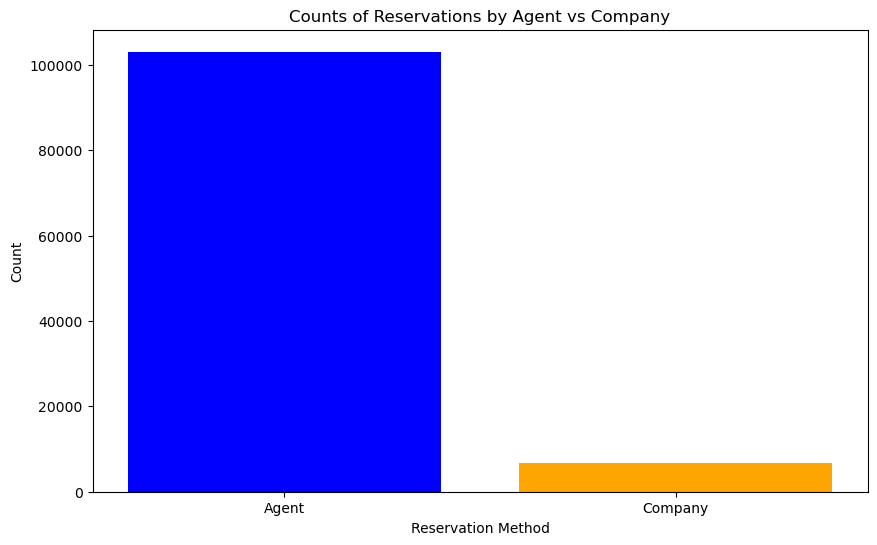

In [4]:
#Reservation Method
# Count the number of non-null values in each column
agent_count = new_hotel_data['Agent'].notnull().sum()
company_count = new_hotel_data['Company'].notnull().sum()

# Create a DataFrame with the counts for easier plotting
counts = pd.Series([agent_count, company_count], index=['Agent', 'Company'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel("Reservation Method")
plt.ylabel("Count")
plt.title("Counts of Reservations by Agent vs Company")
plt.xticks(rotation=0)
plt.show()

In [ ]:
You can analyze the reservation method data by comparing the number of bookings made through Agents versus Companies. 
If the agent count is higher, it could suggest that the hotel relies more on intermediaries to secure bookings. 
On the other hand, if company bookings are higher, the hotel might be catering more to corporate clients or direct corporate partnerships.

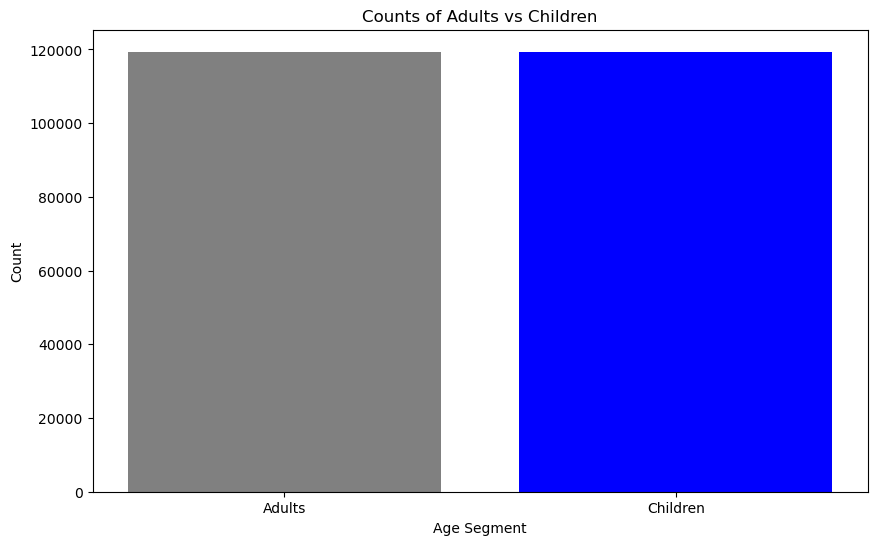

In [5]:
#Age Segments
# Count the number of non-null values in each column
adults_count = new_hotel_data['Adults'].notnull().sum()
children_count = new_hotel_data['Children'].notnull().sum()

# Create a DataFrame with the counts for easier plotting
counts = pd.Series([adults_count, children_count], index=['Adults', 'Children'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=['grey', 'blue'])
plt.xlabel("Age Segment")
plt.ylabel("Count")
plt.title("Counts of Adults vs Children")
plt.xticks(rotation=0)
plt.show()

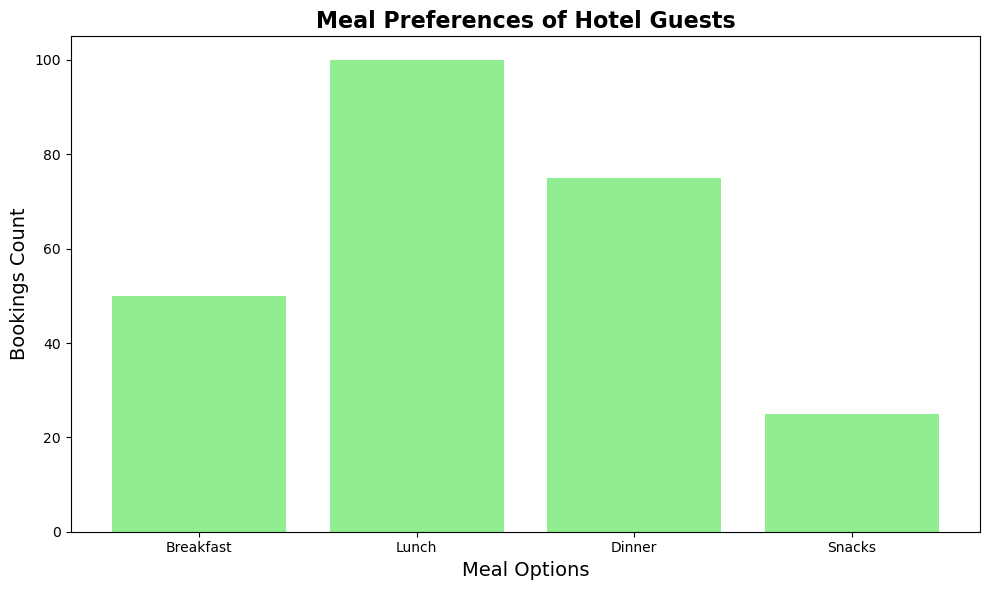

In [6]:
#Preferences in type of food
# Define the output directory and file path
output_dir = 'C:\\Users\\Mrod9\\output_data'
output_file = os.path.join(output_dir, 'Meal_Preferences_Bar_Chart.png')

# Check if the output directory exists, and create it if it doesn't
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your plotting code here (example plot)
# This is where you add your actual plot code, below is an example bar plot
meal_counts = [50, 100, 75, 25]  # Sample data for illustration
meal_labels = ['Breakfast', 'Lunch', 'Dinner', 'Snacks']

plt.figure(figsize=(10, 6))
plt.bar(meal_labels, meal_counts, color='lightgreen')

# Add title and labels
plt.title('Meal Preferences of Hotel Guests', fontsize=16, fontweight='bold')
plt.xlabel('Meal Options', fontsize=14)
plt.ylabel('Bookings Count', fontsize=14)

# Save the plot as a PNG image
plt.tight_layout()
plt.savefig(output_file)

# Display the plot
plt.show()

In [ ]:
This chart gives insight into which meals are more popular with guests, which could 
be useful for the hotel to adjust its meal offerings or better understand guest needs.

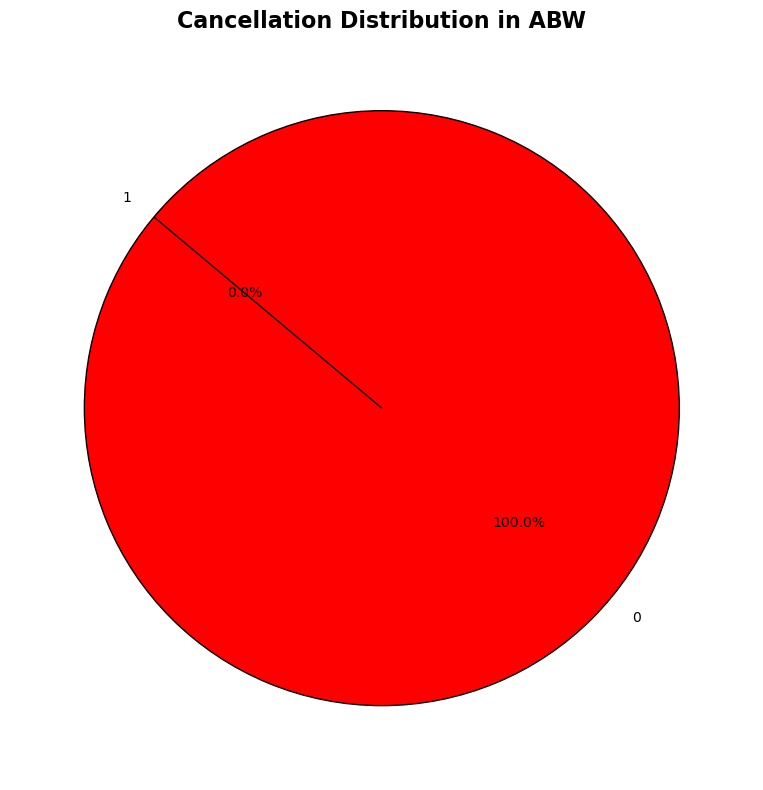

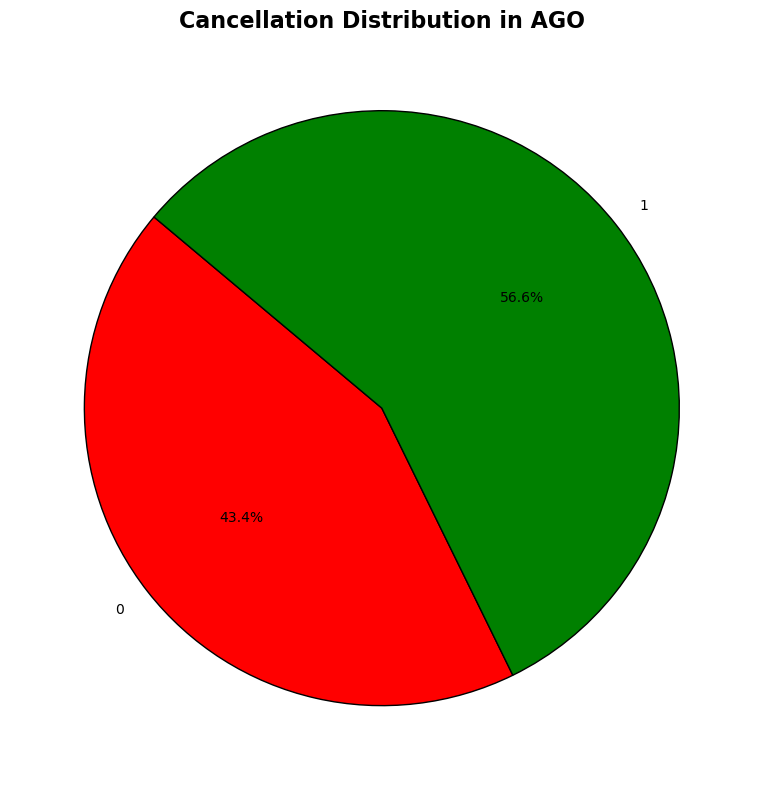

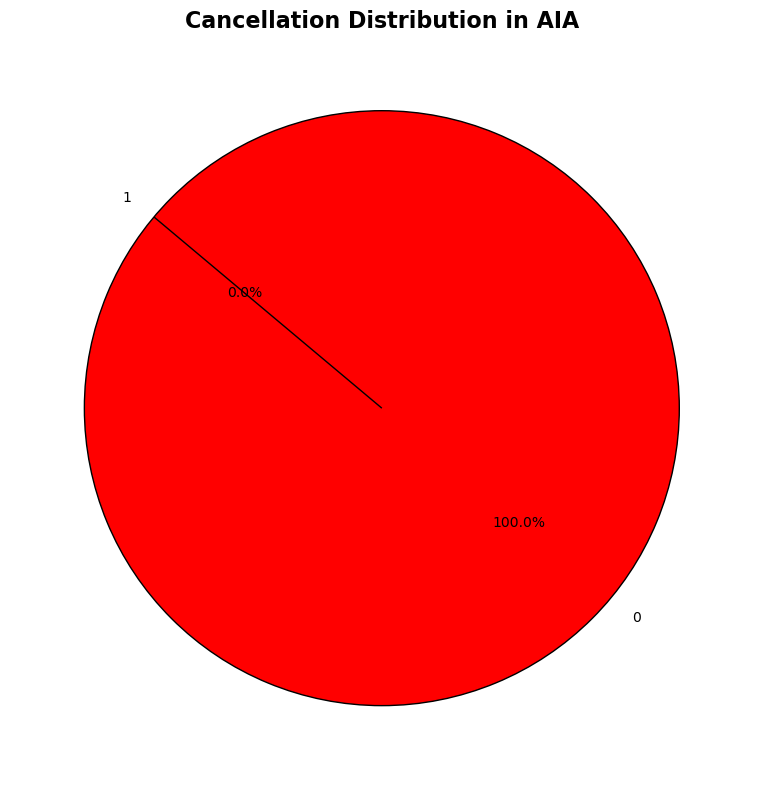

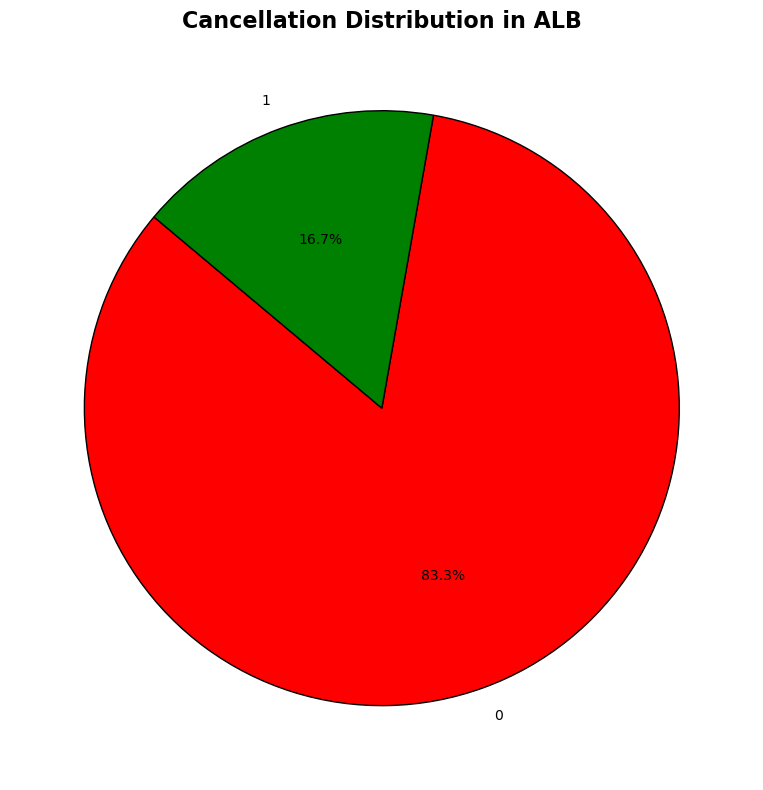

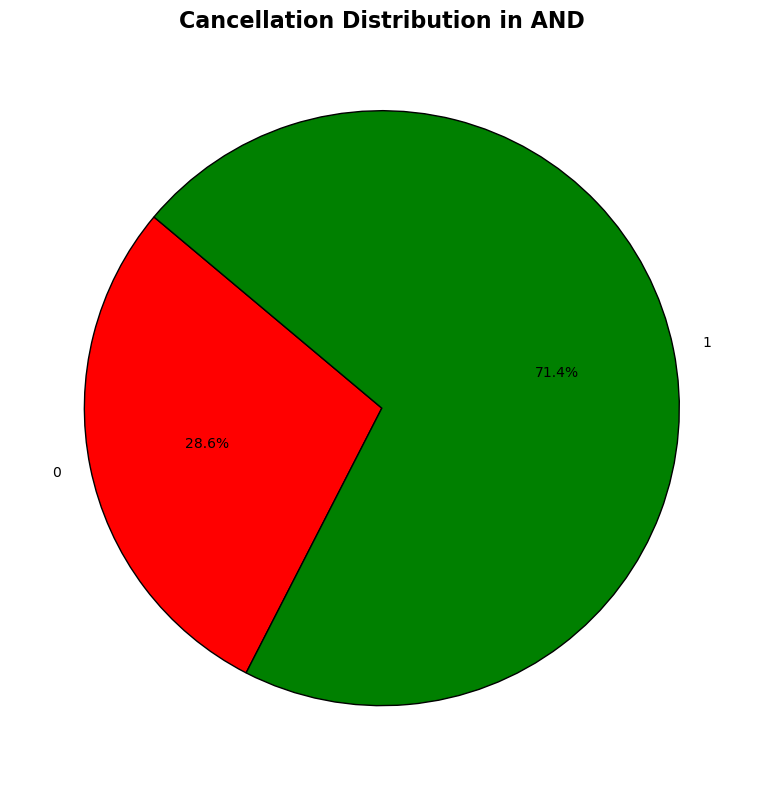

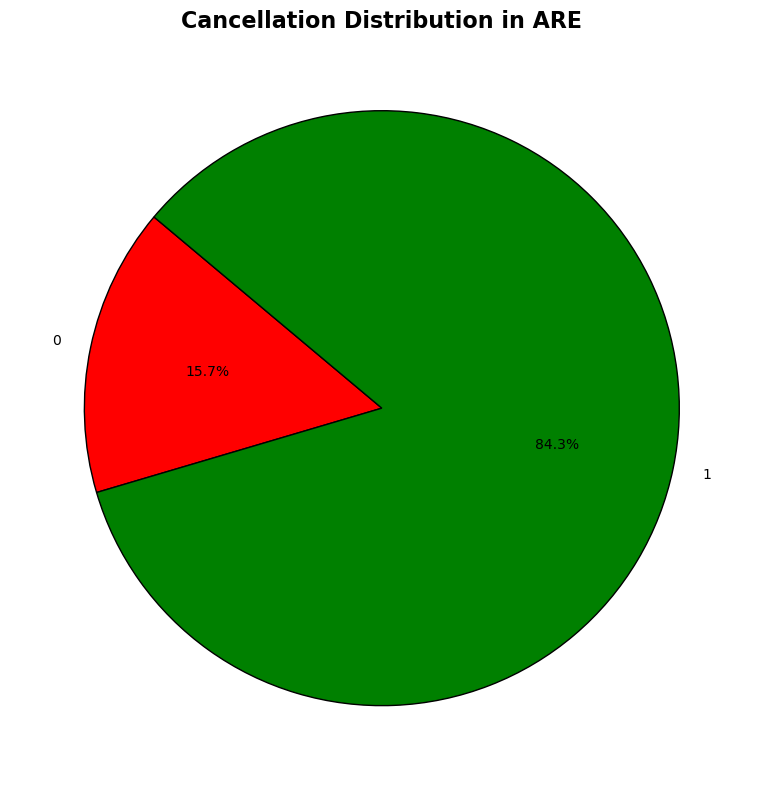

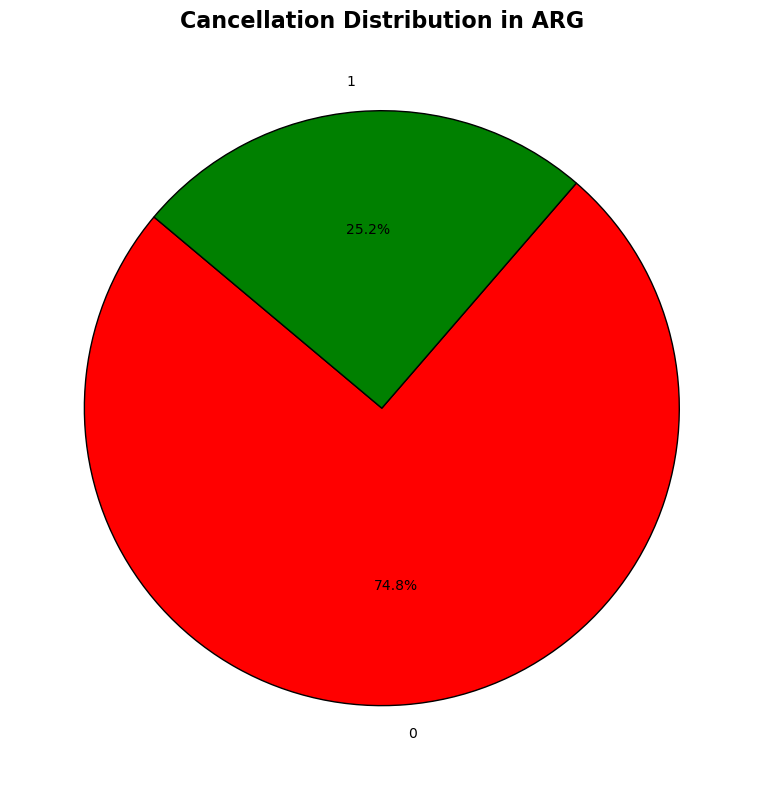

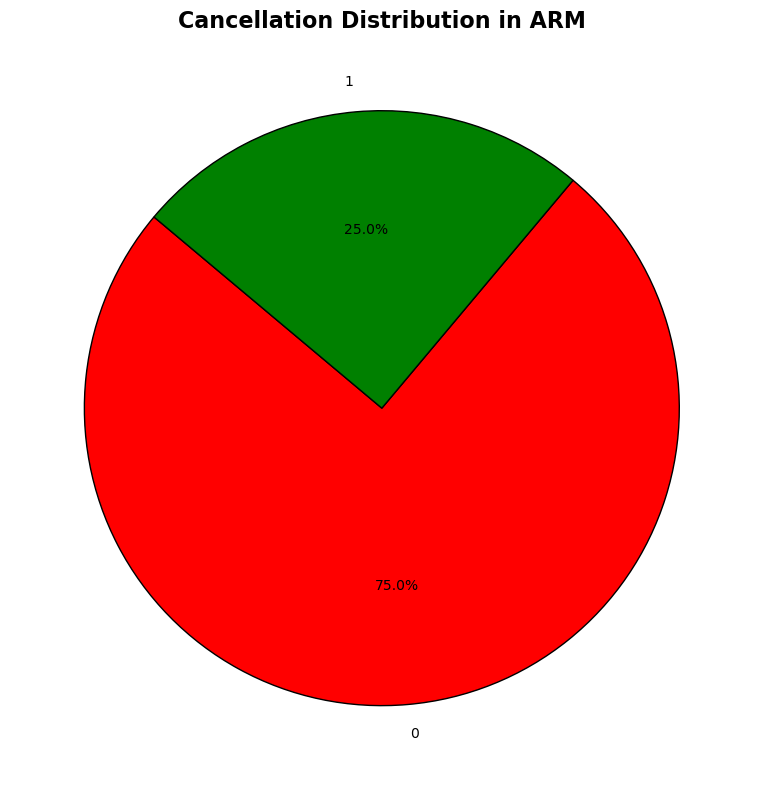

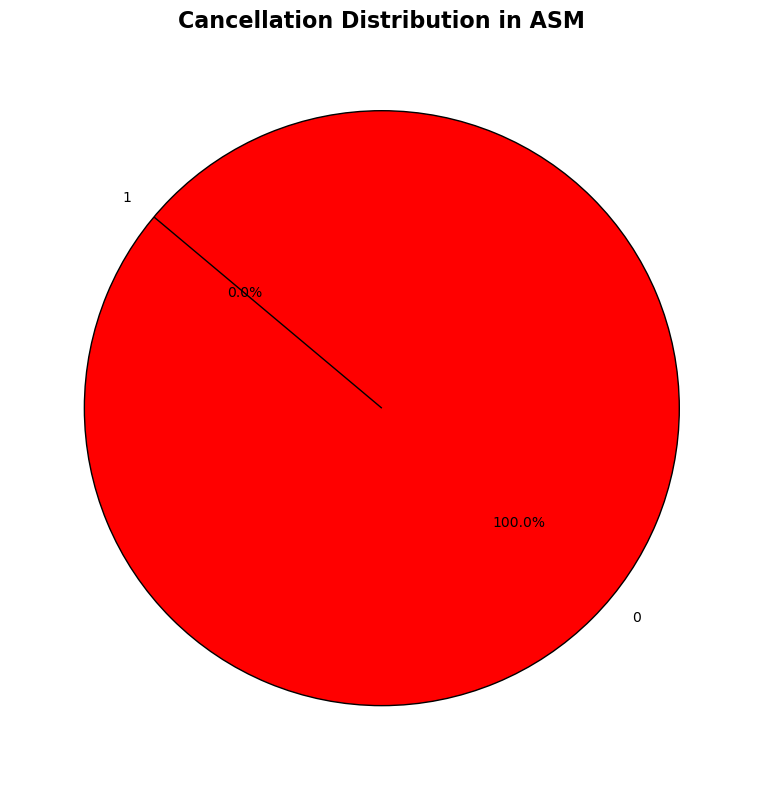

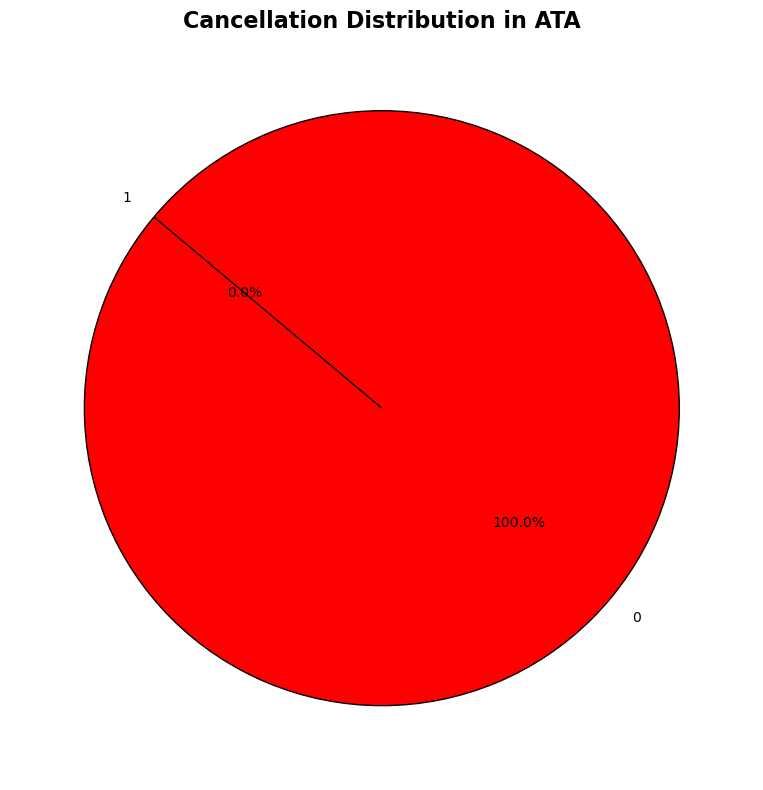

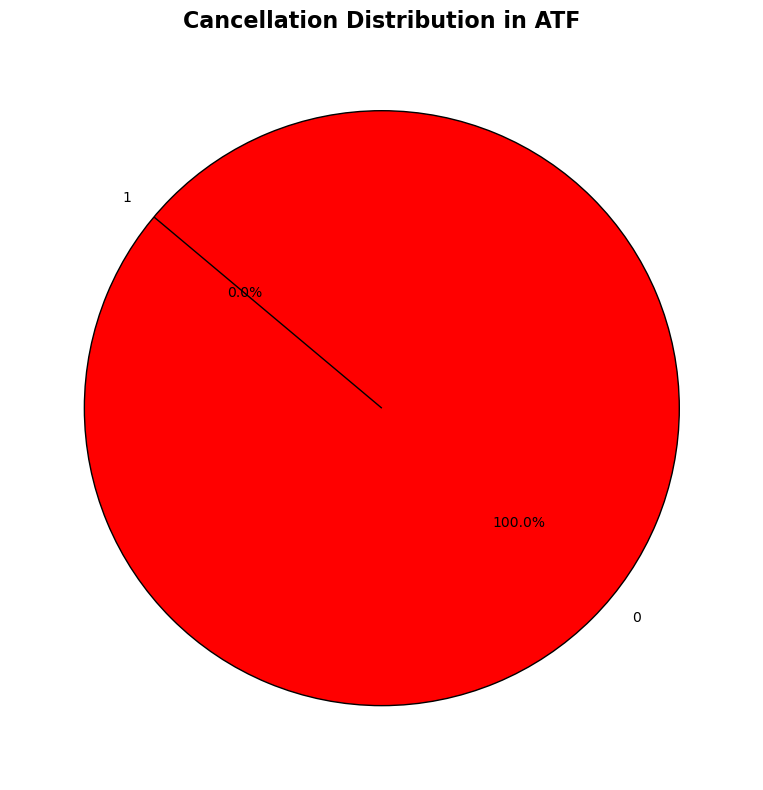

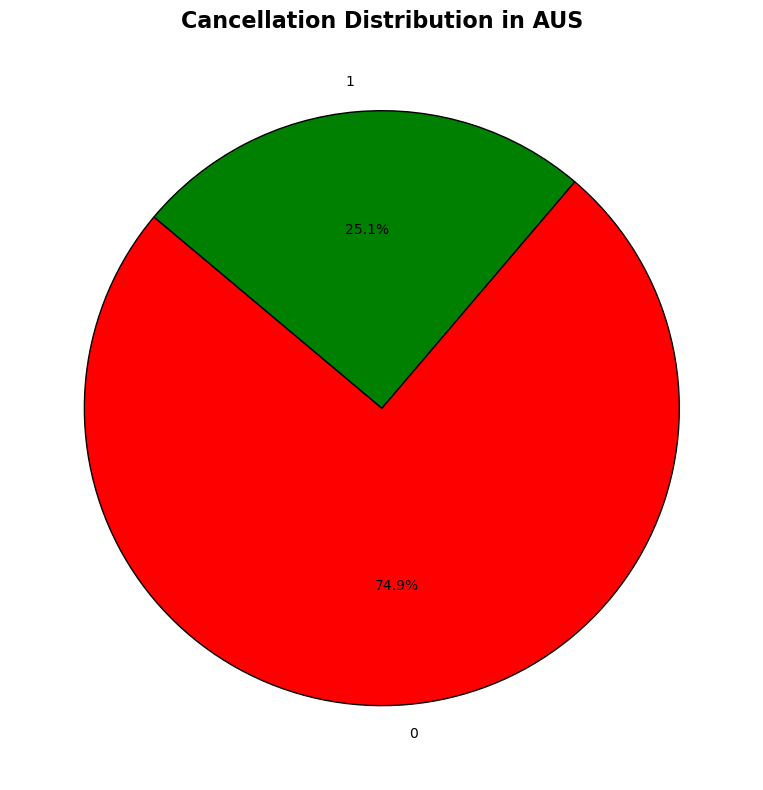

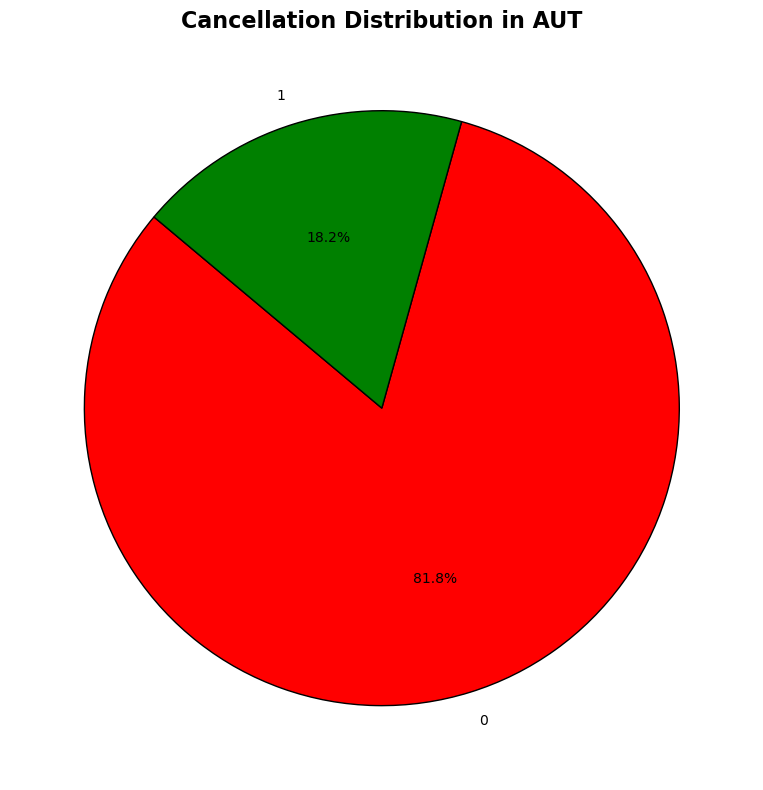

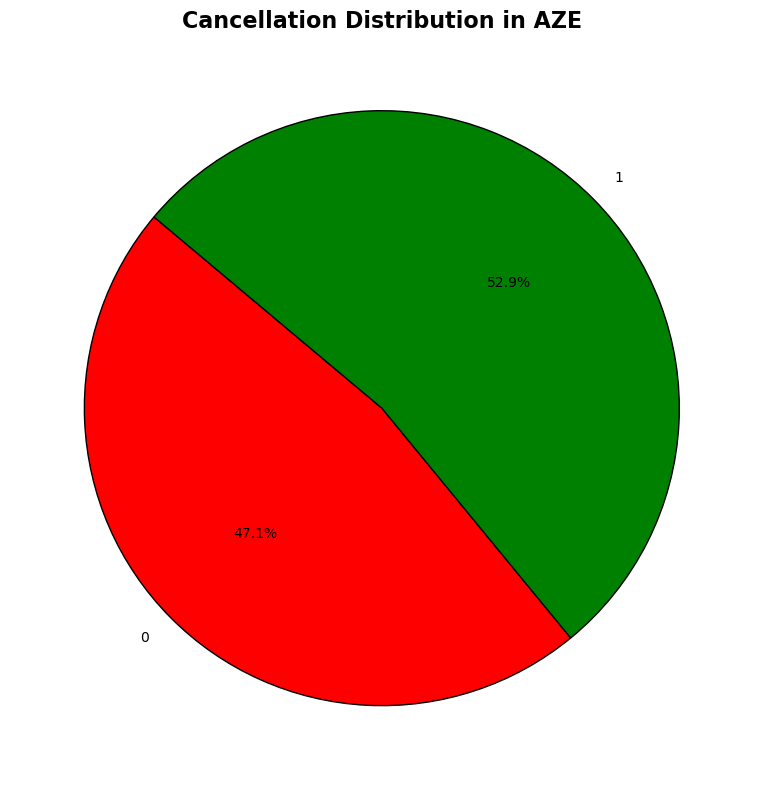

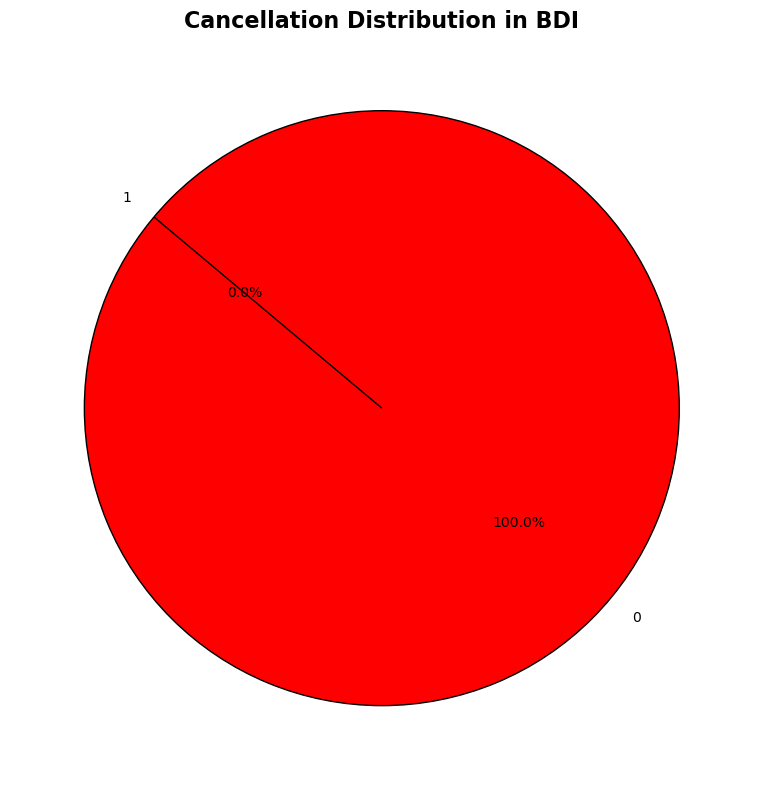

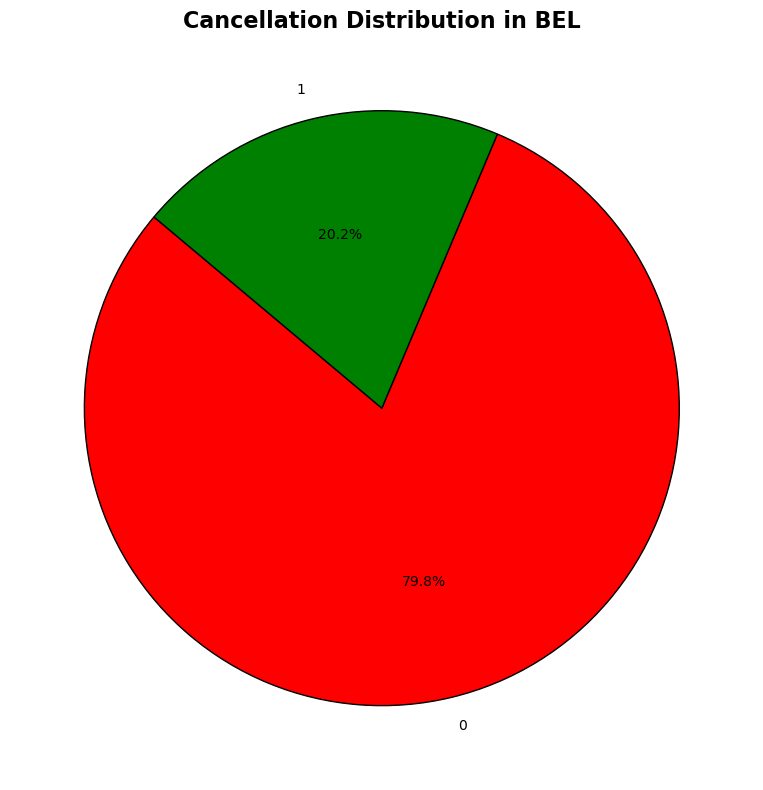

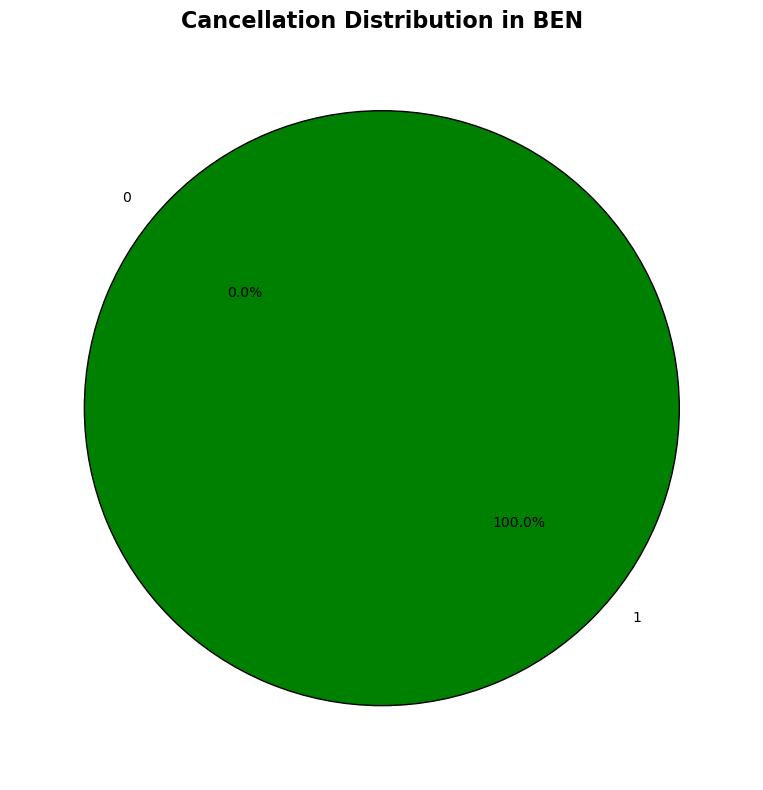

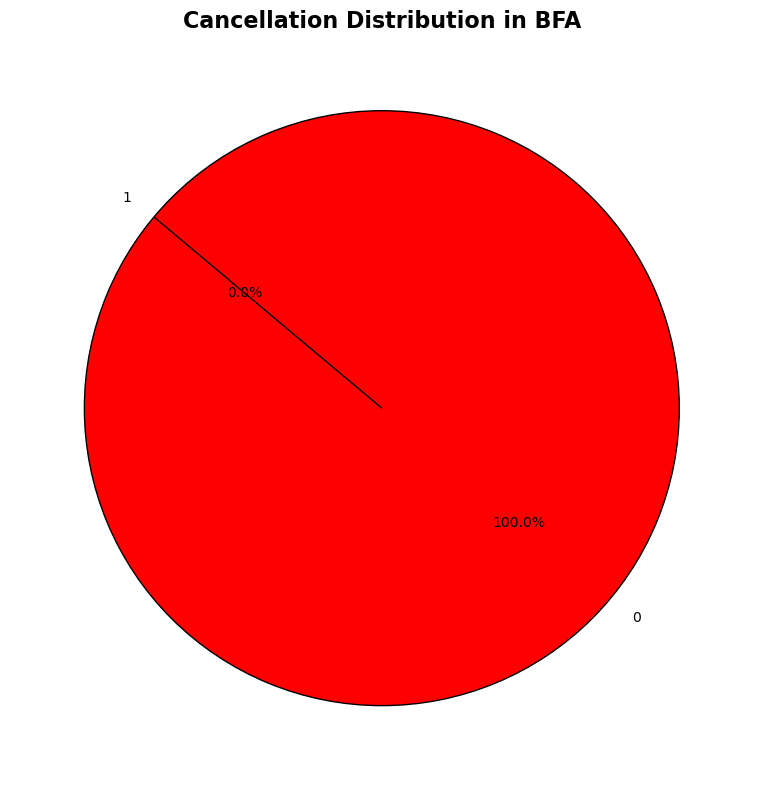

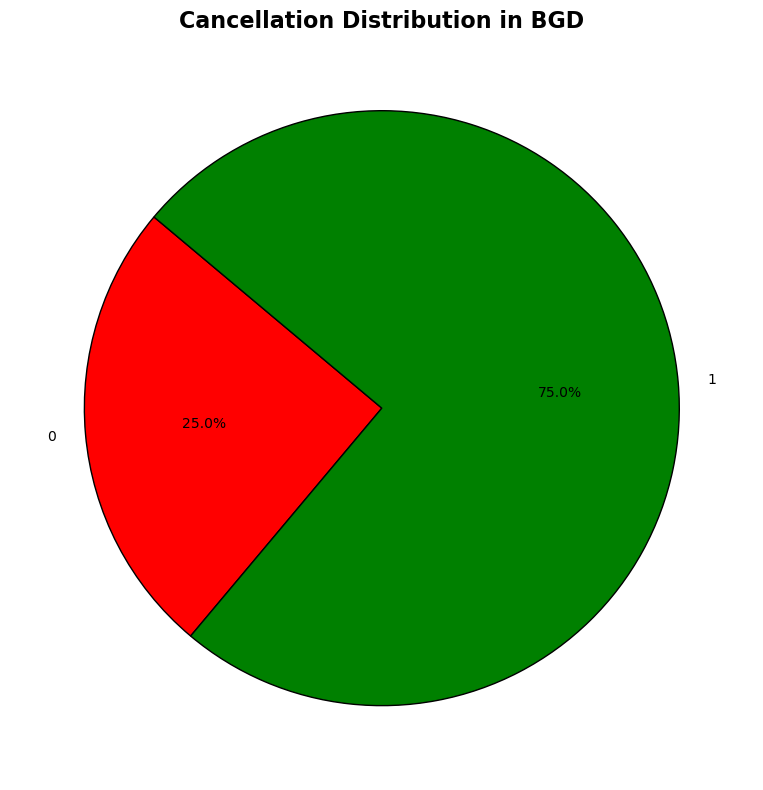

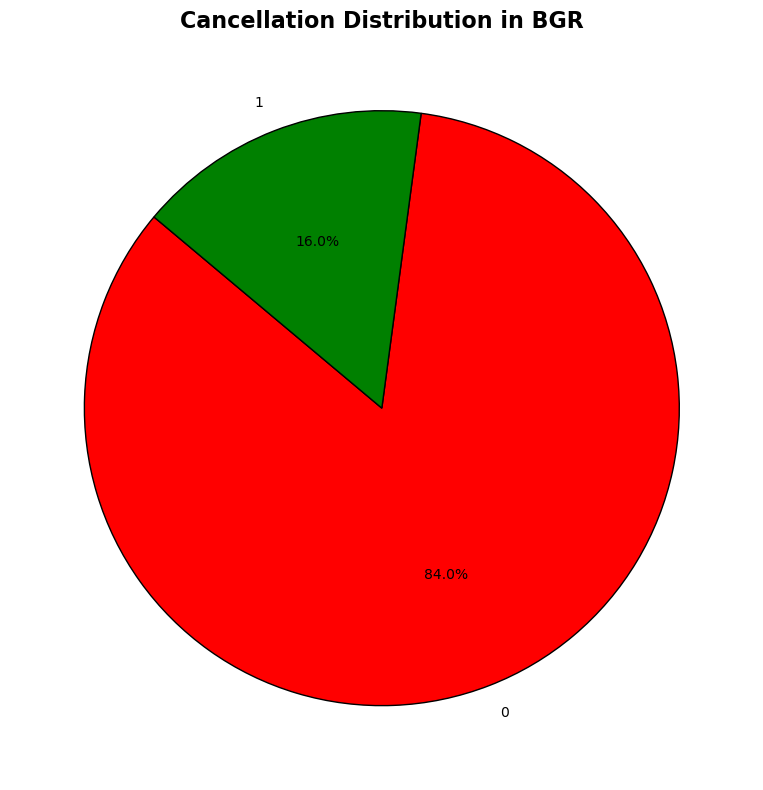

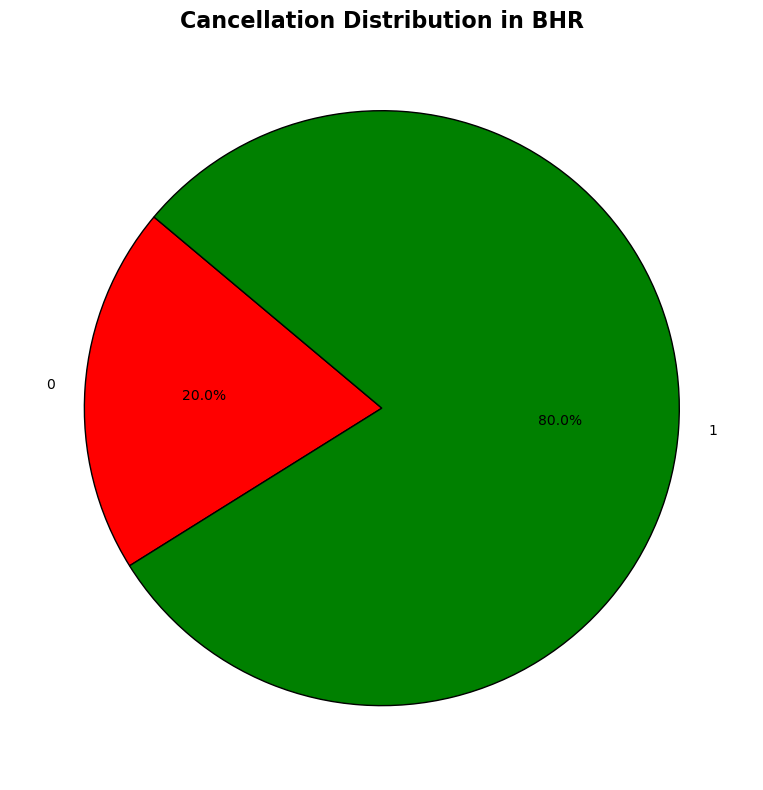

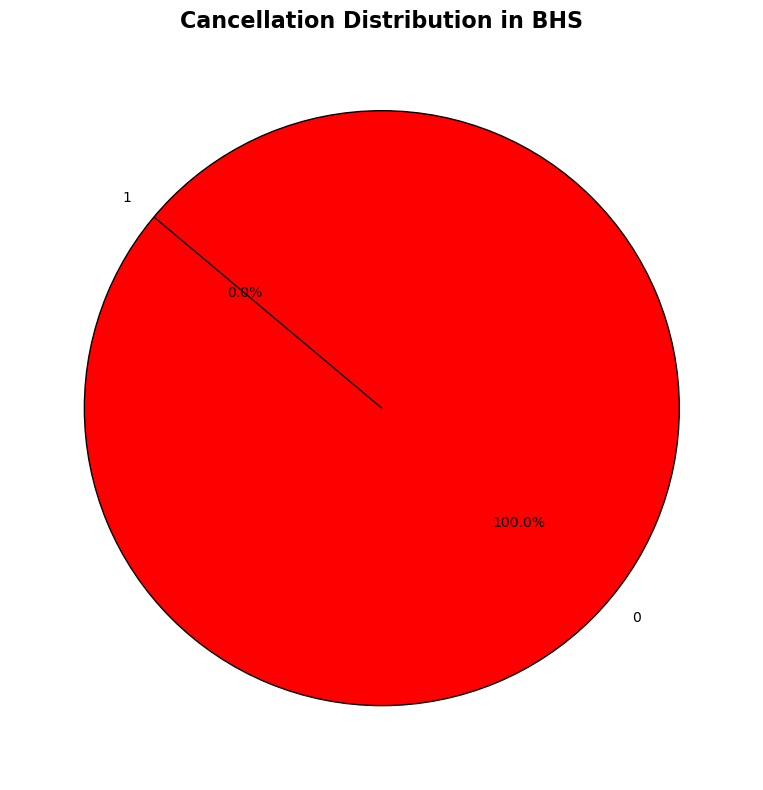

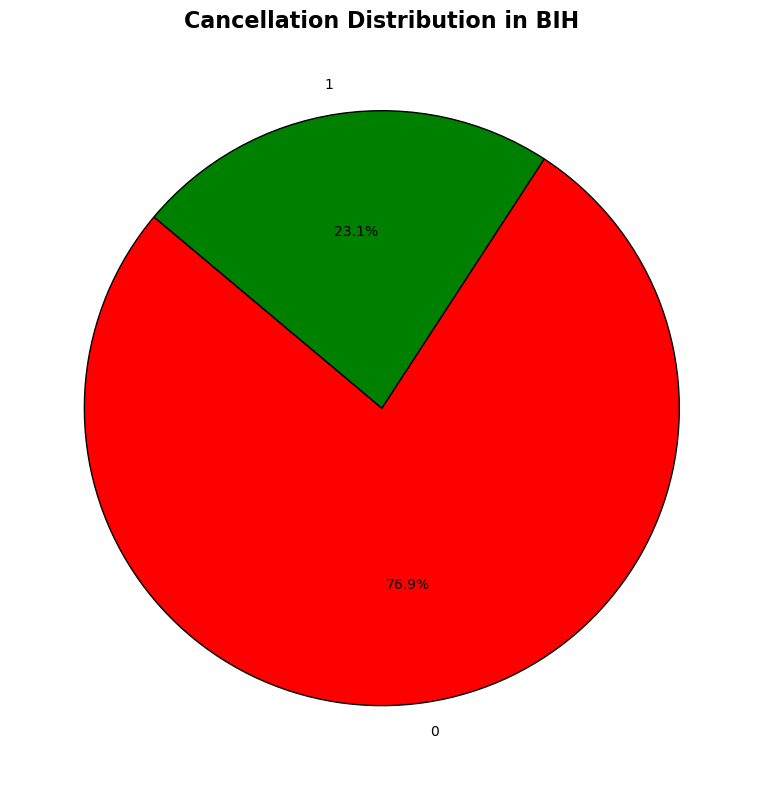

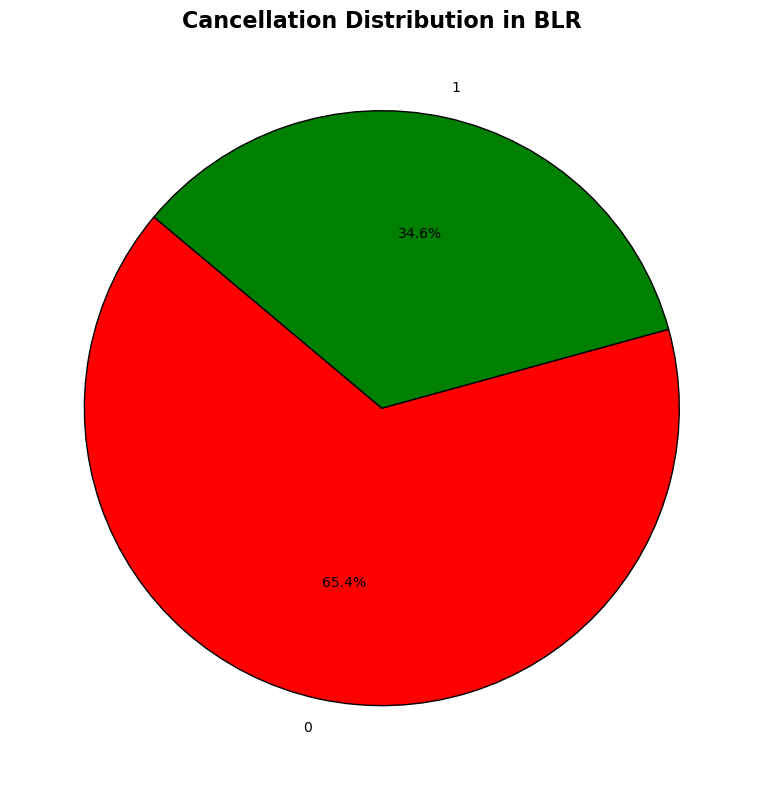

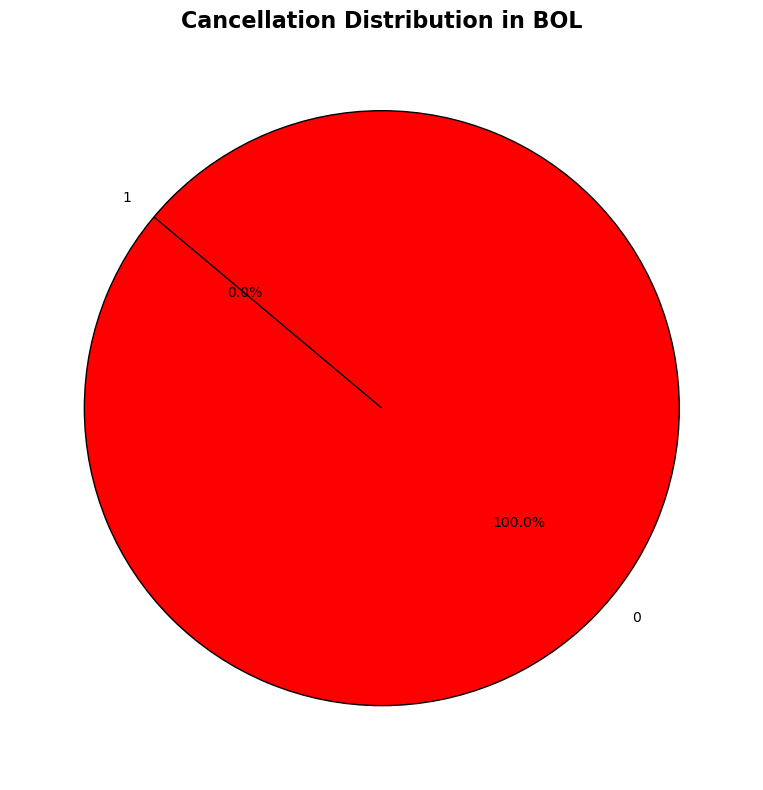

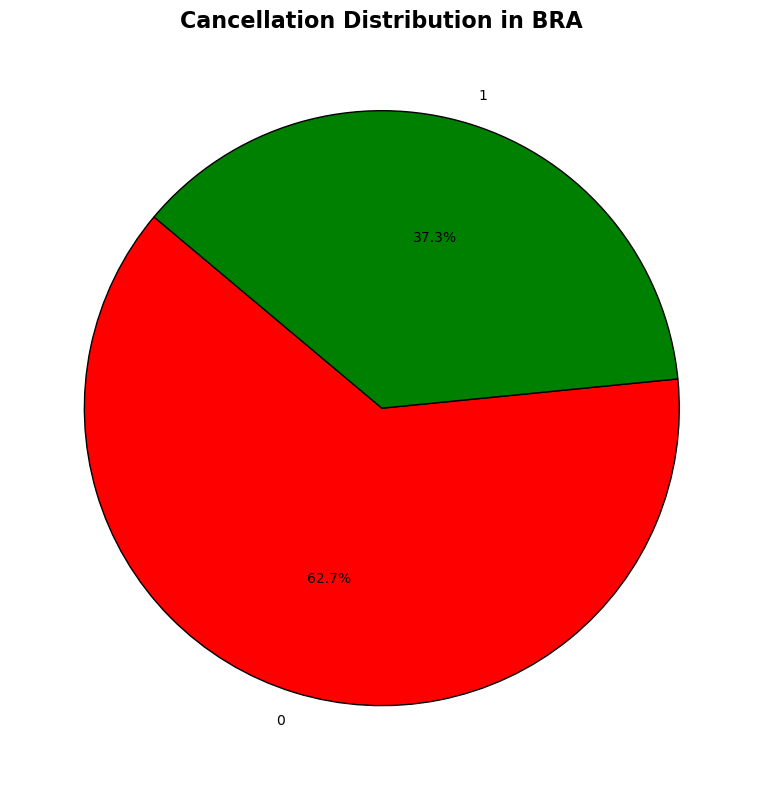

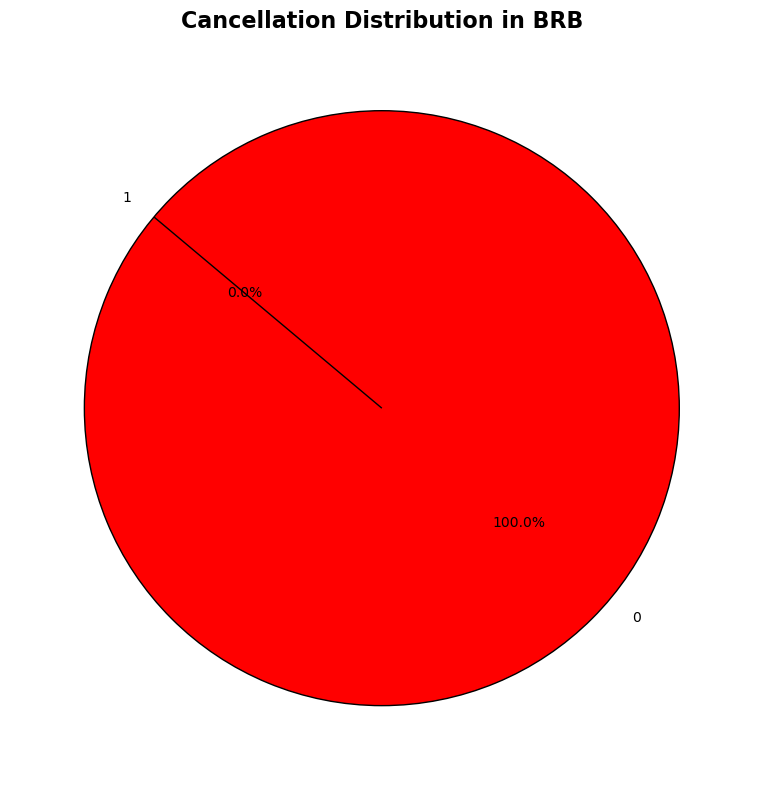

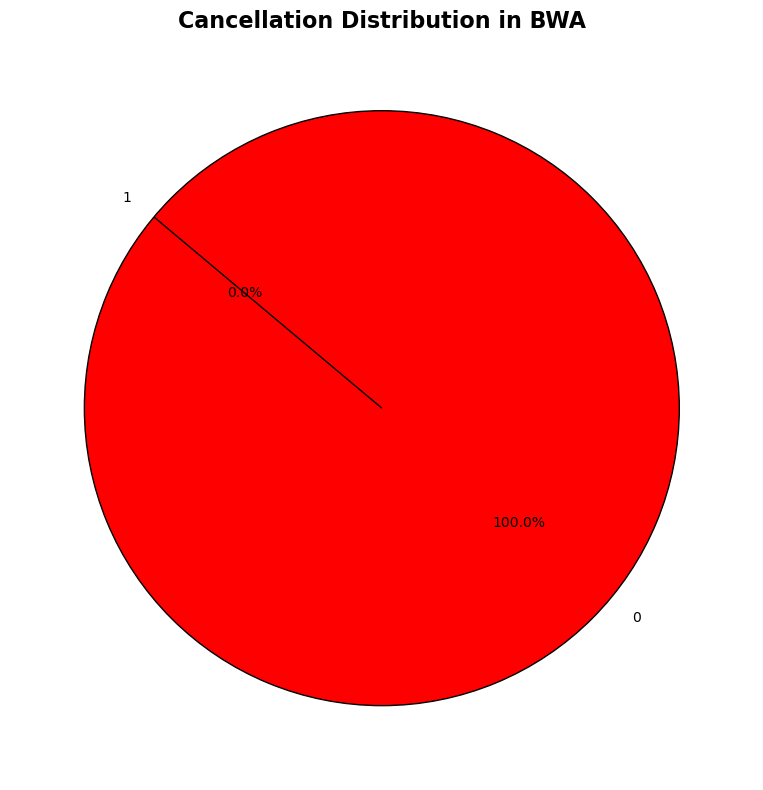

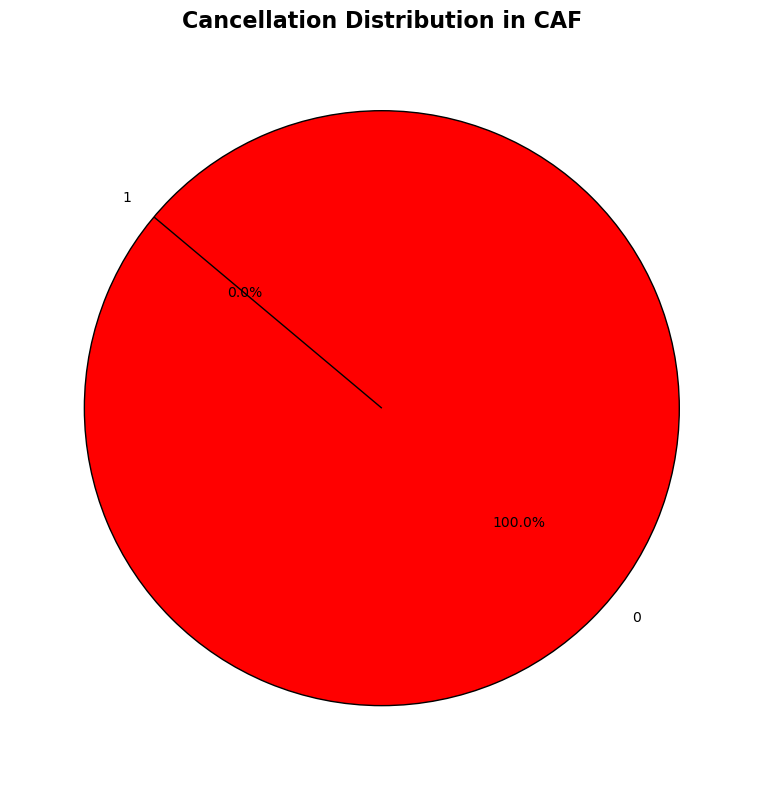

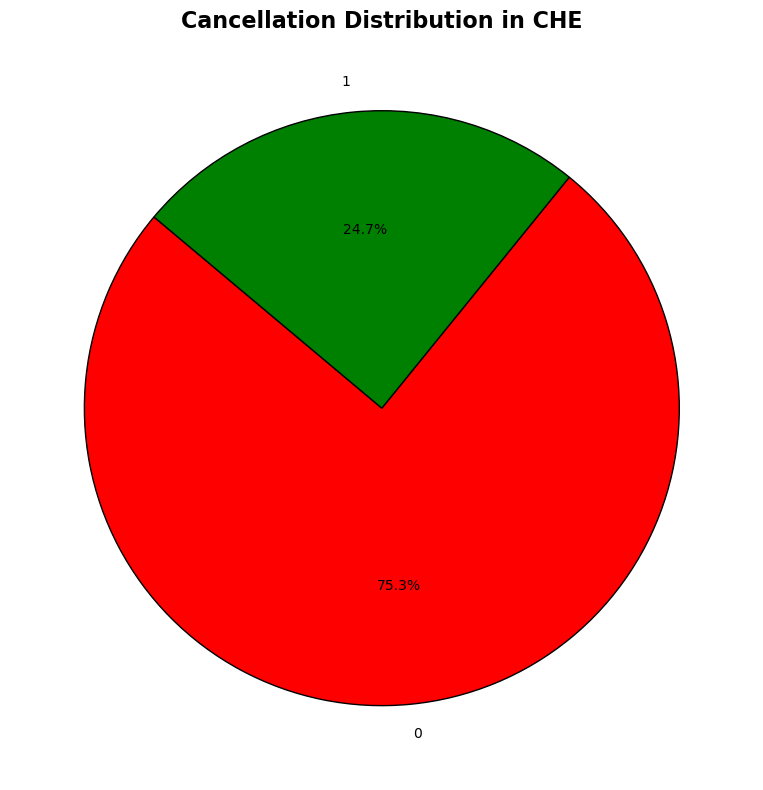

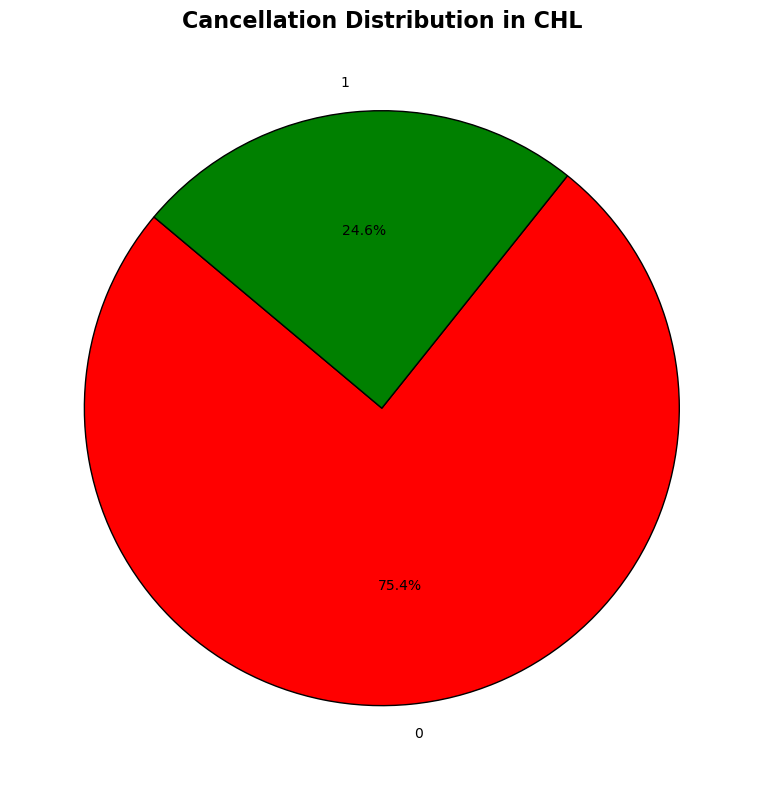

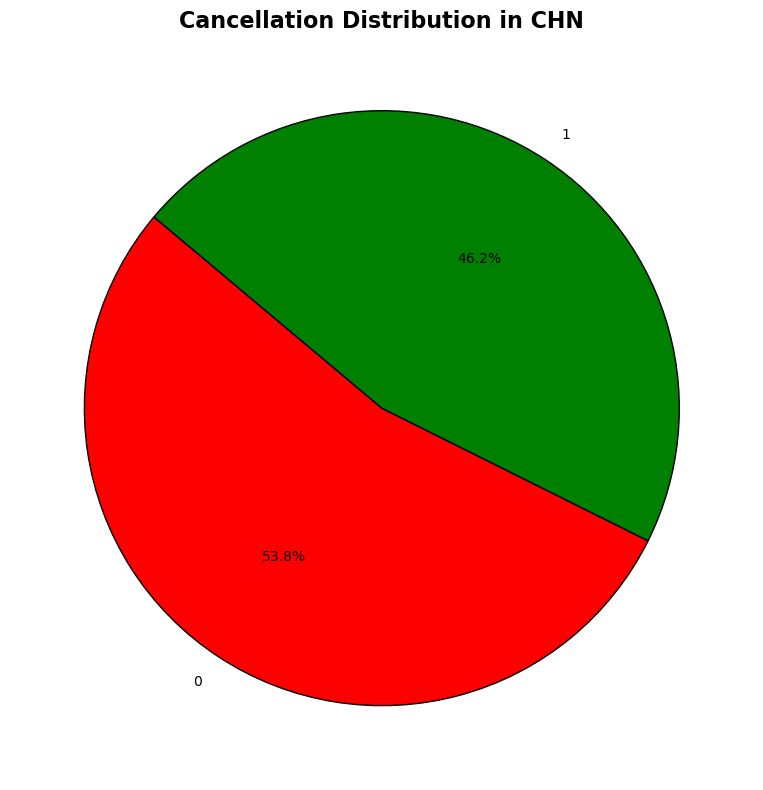

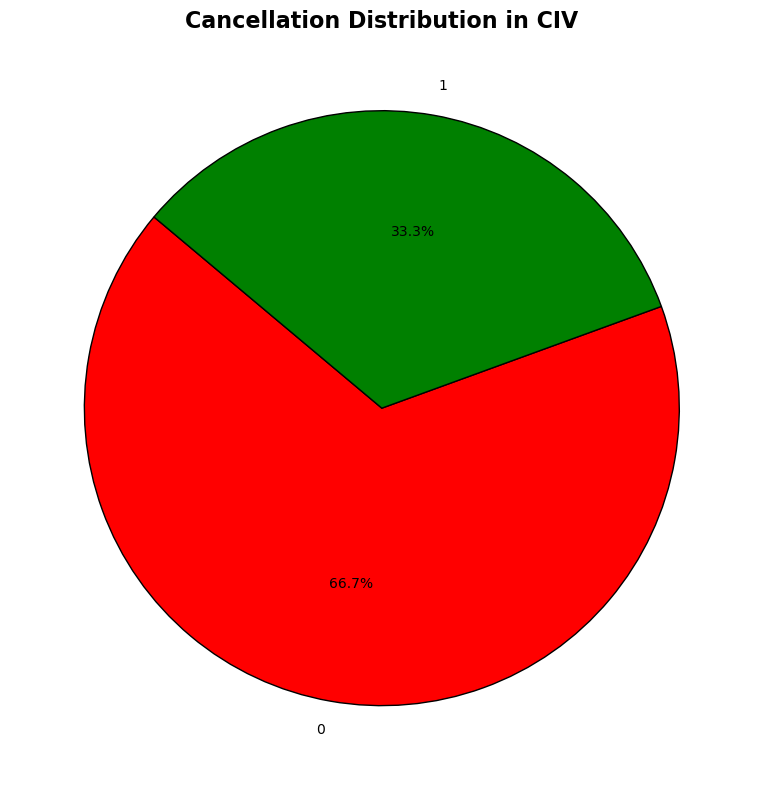

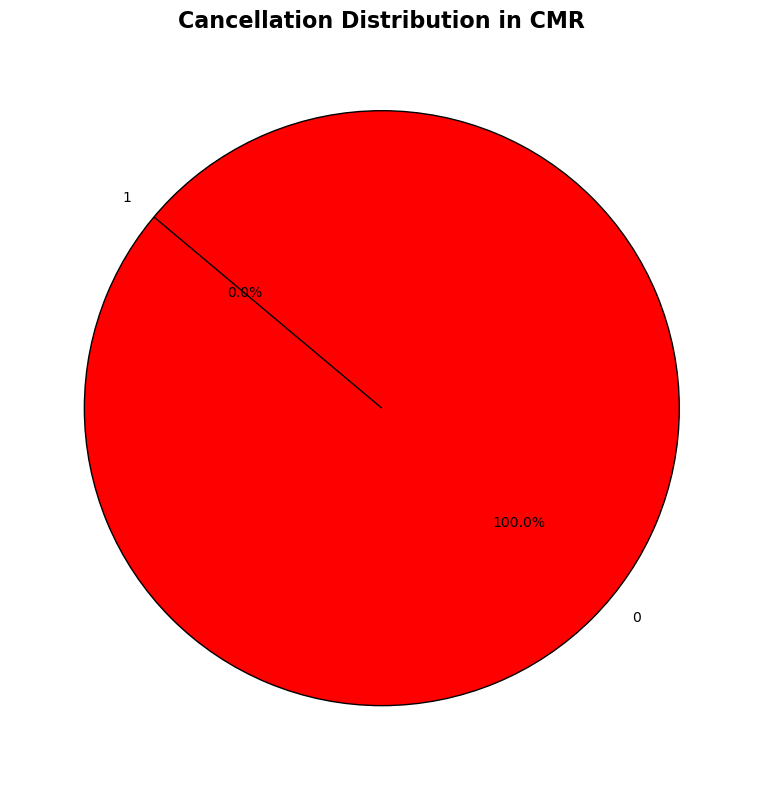

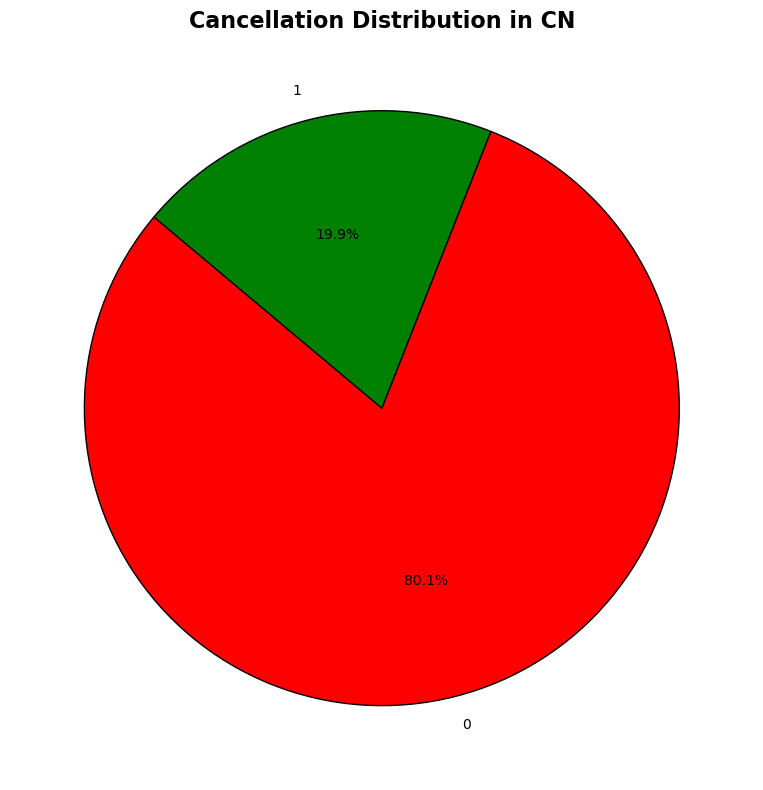

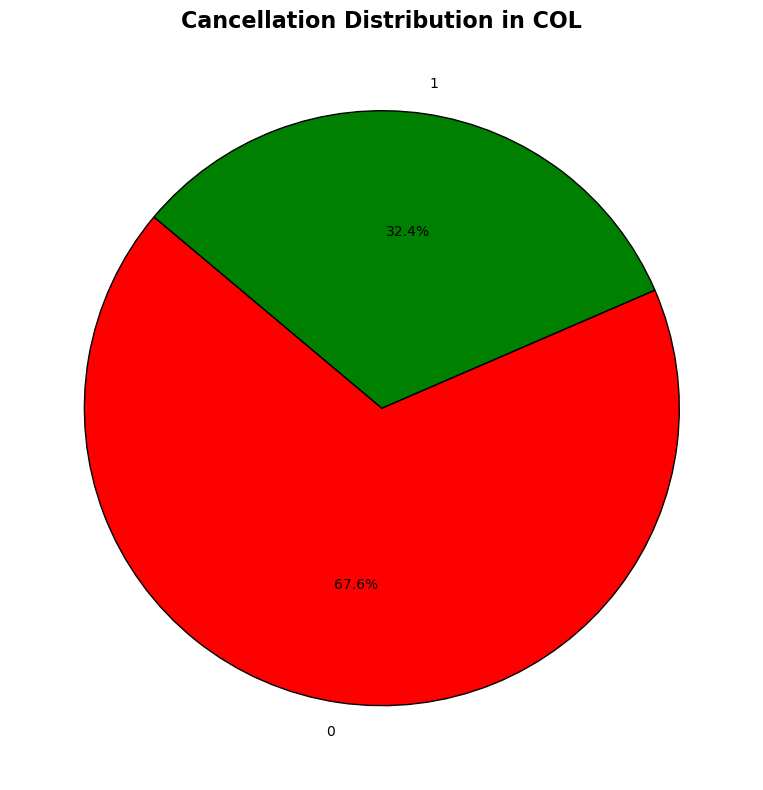

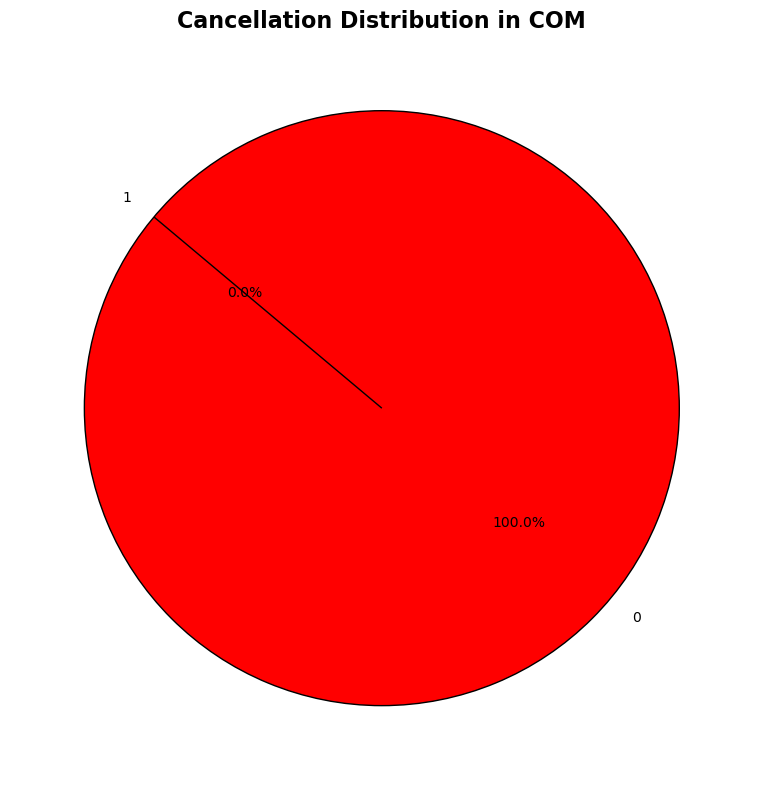

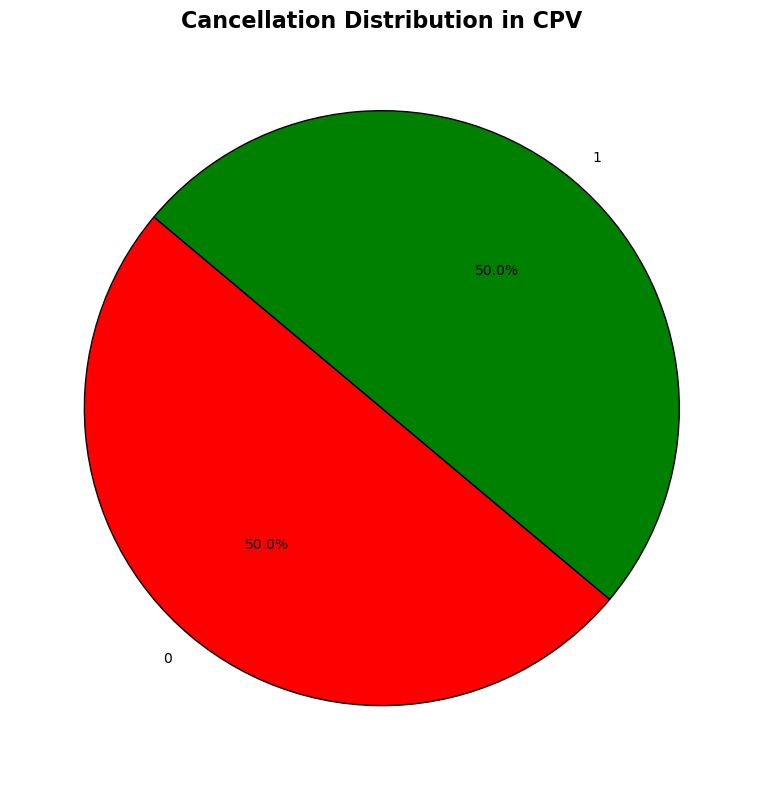

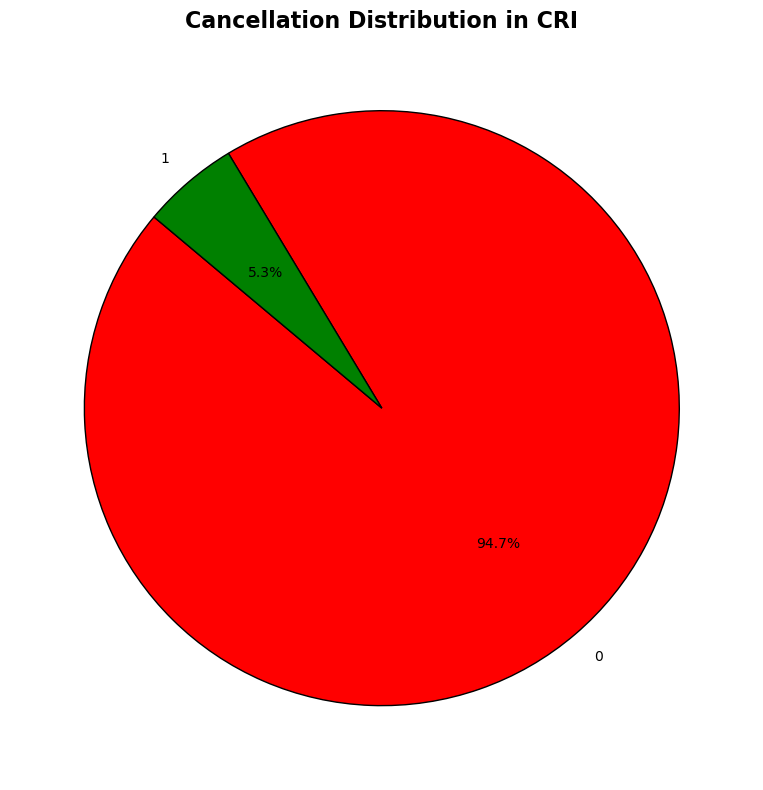

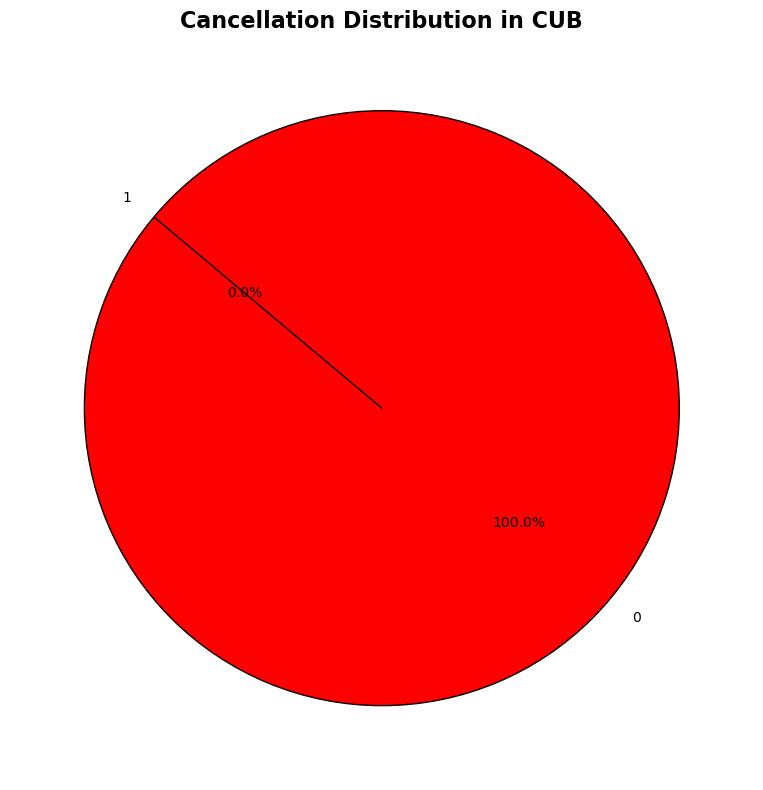

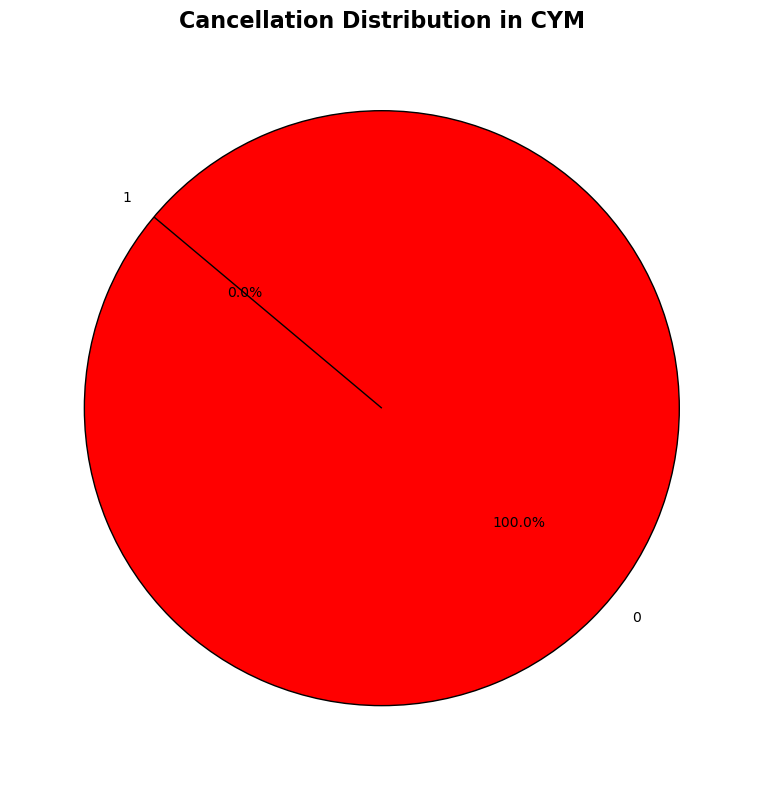

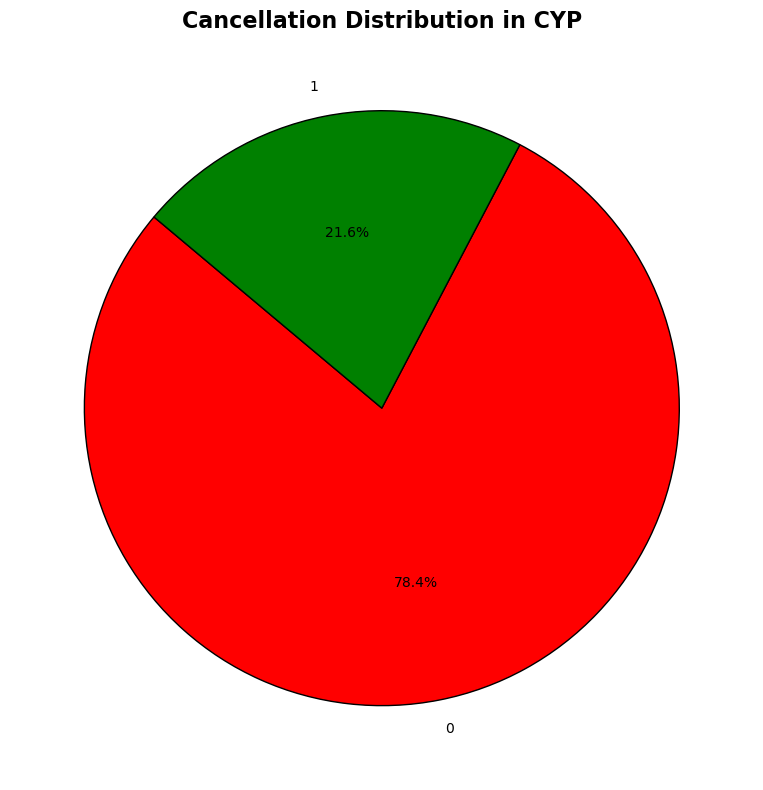

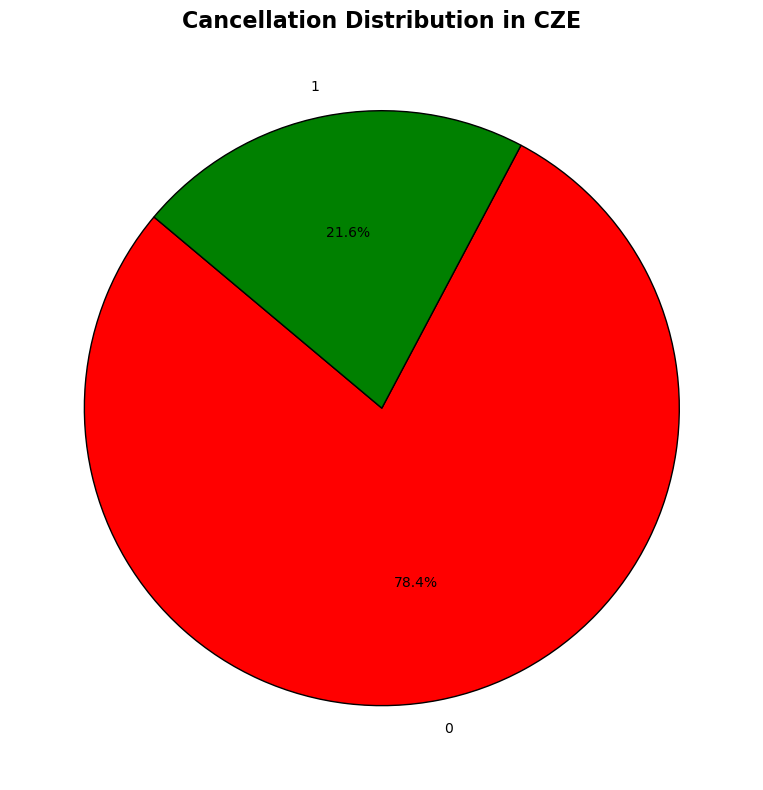

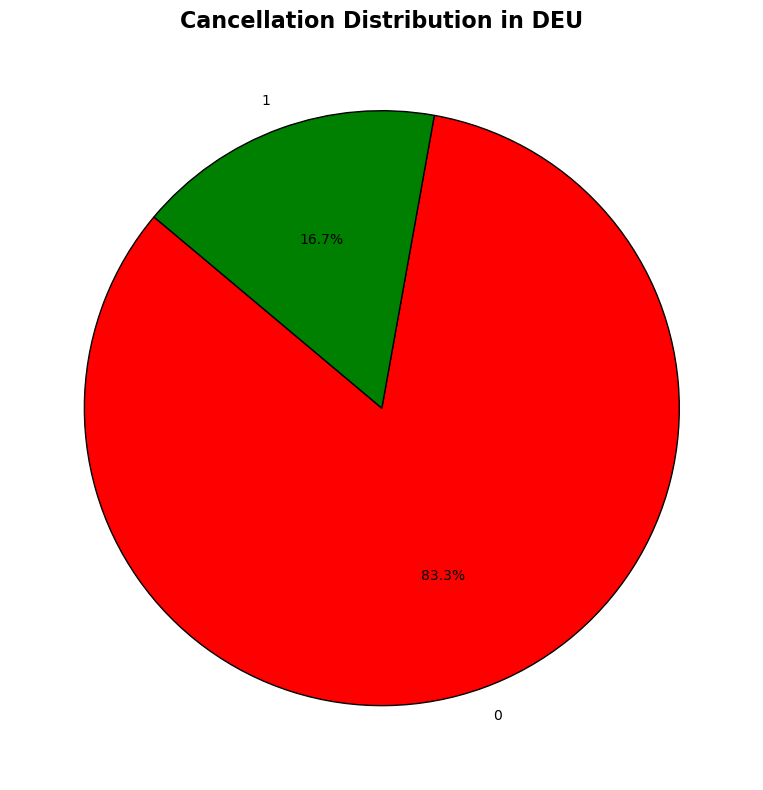

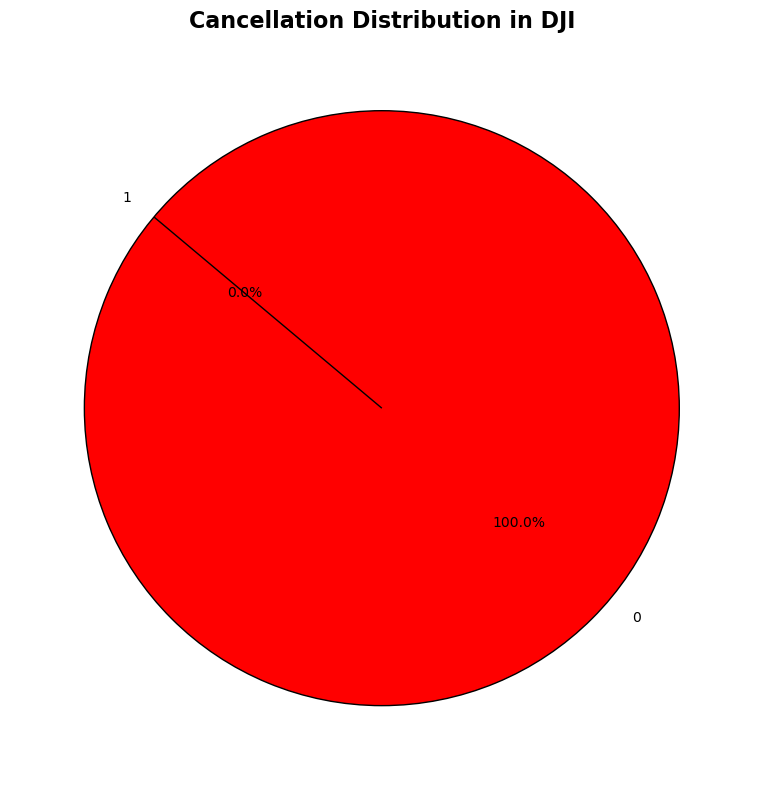

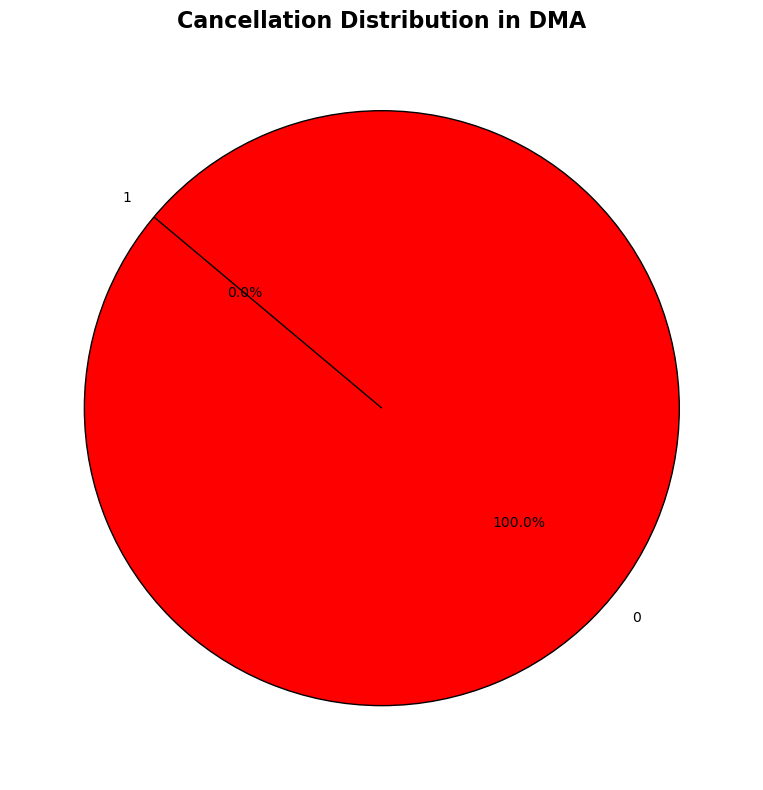

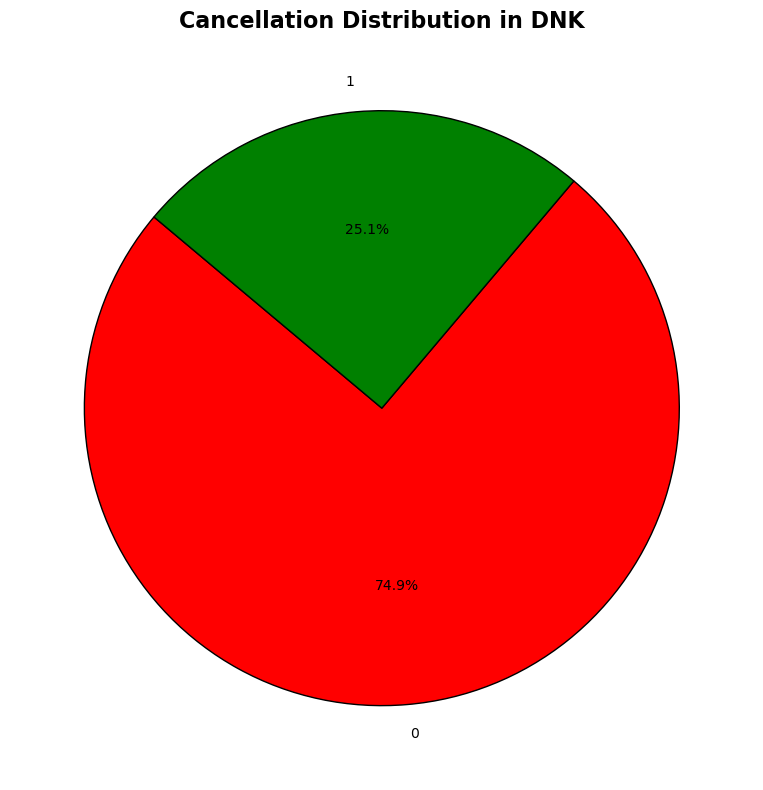

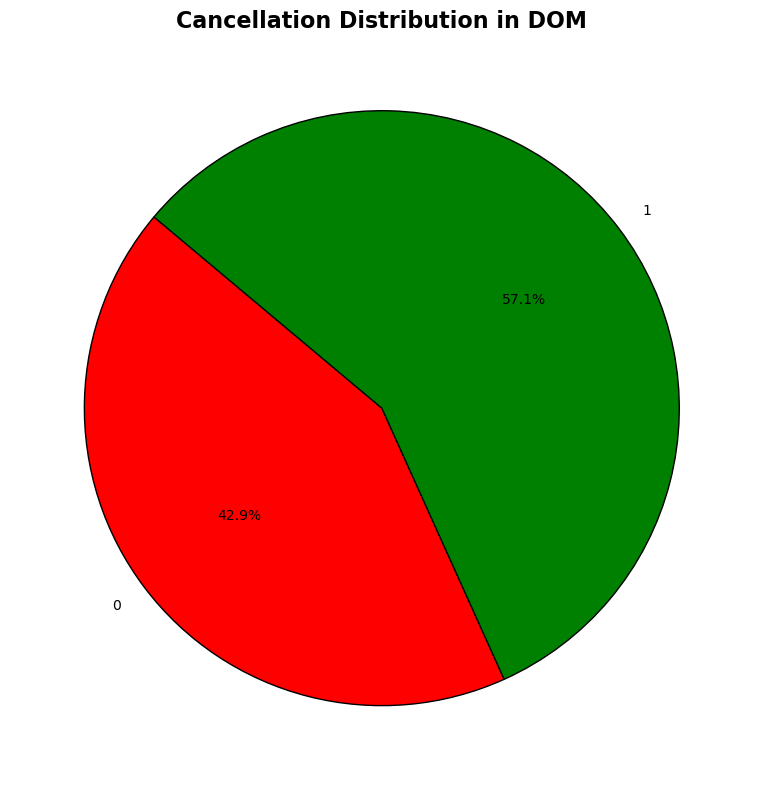

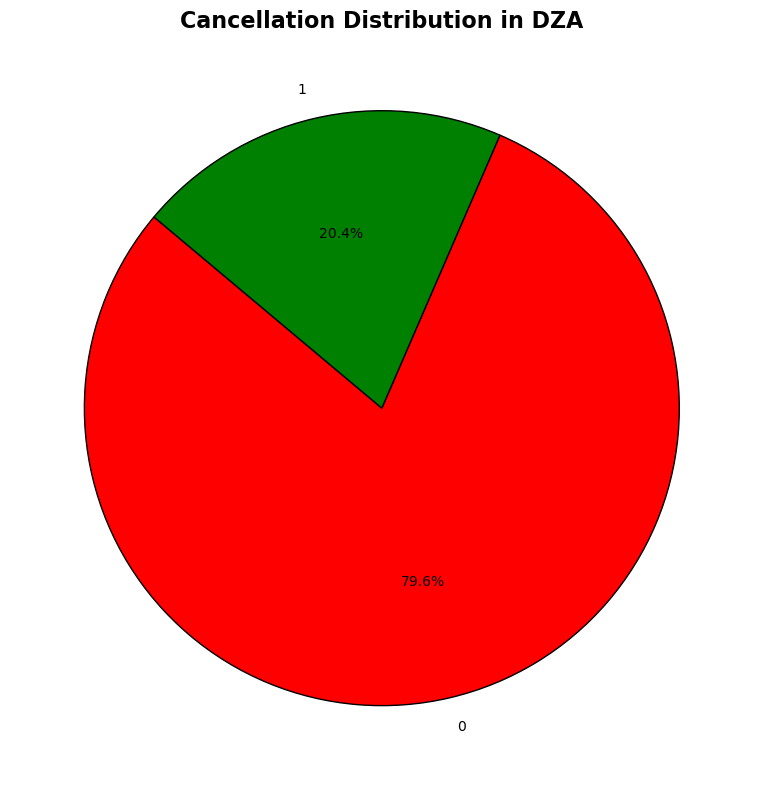

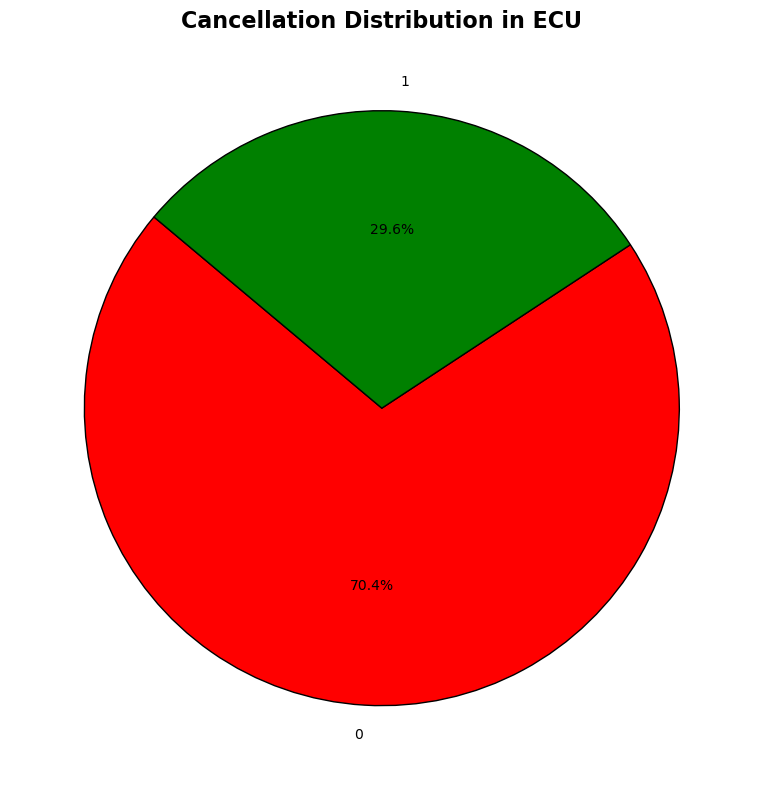

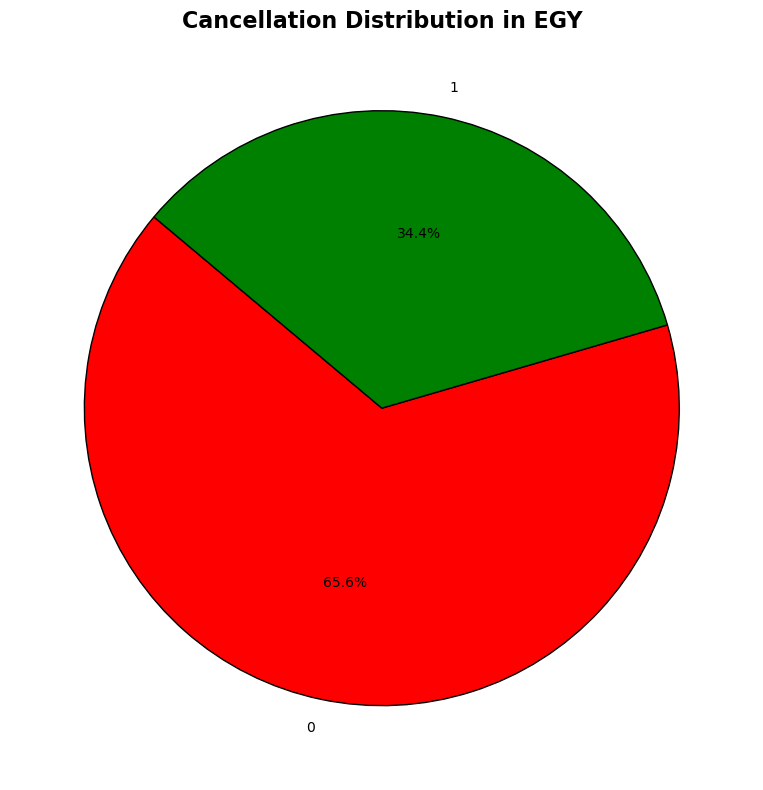

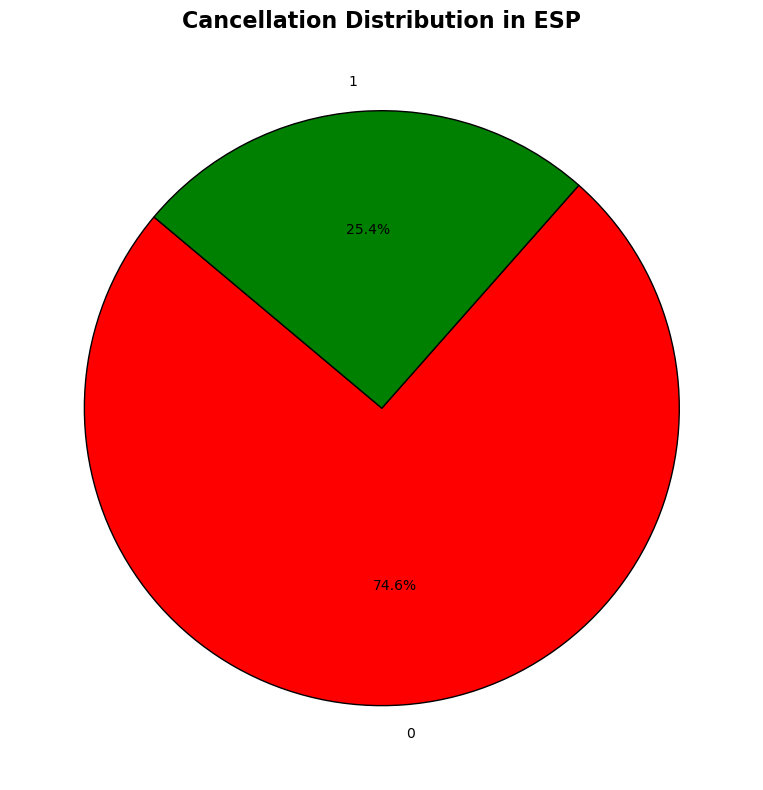

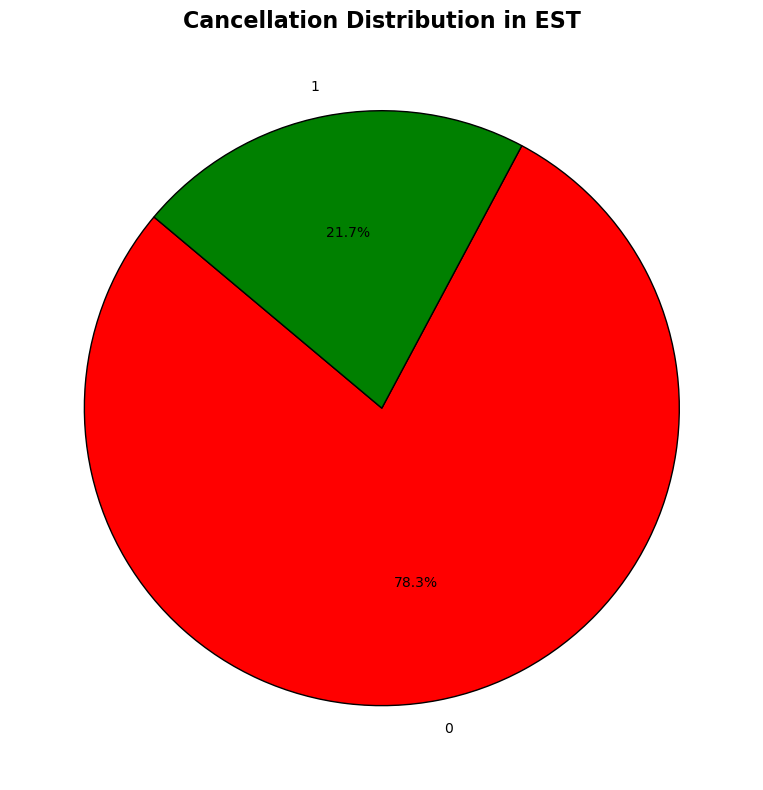

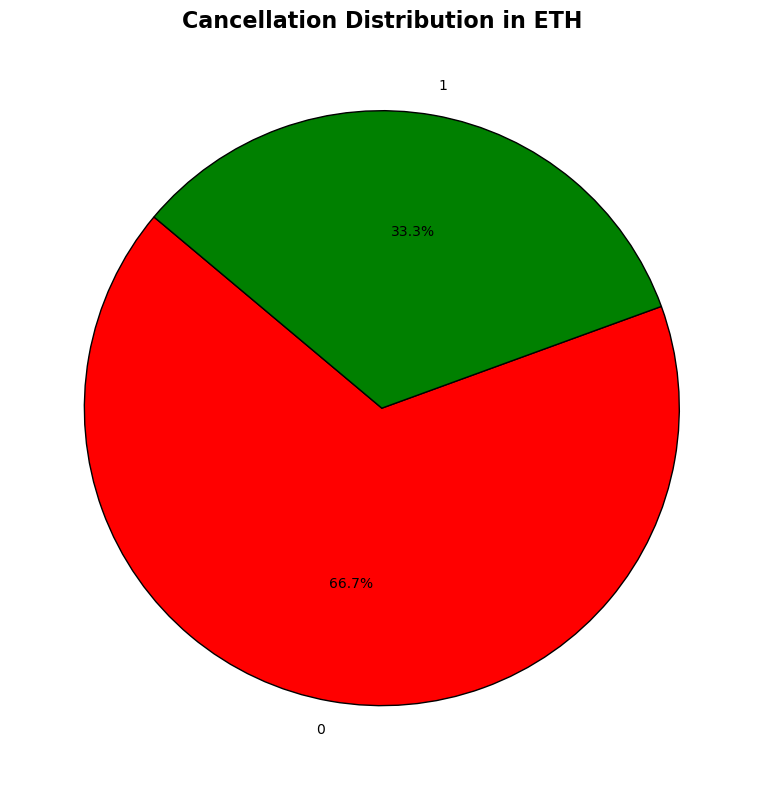

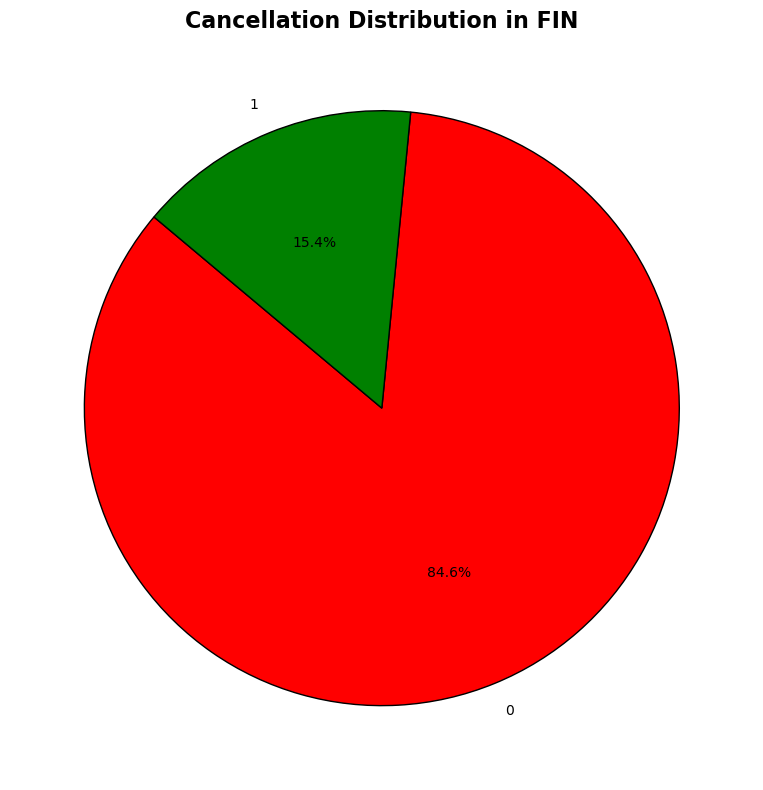

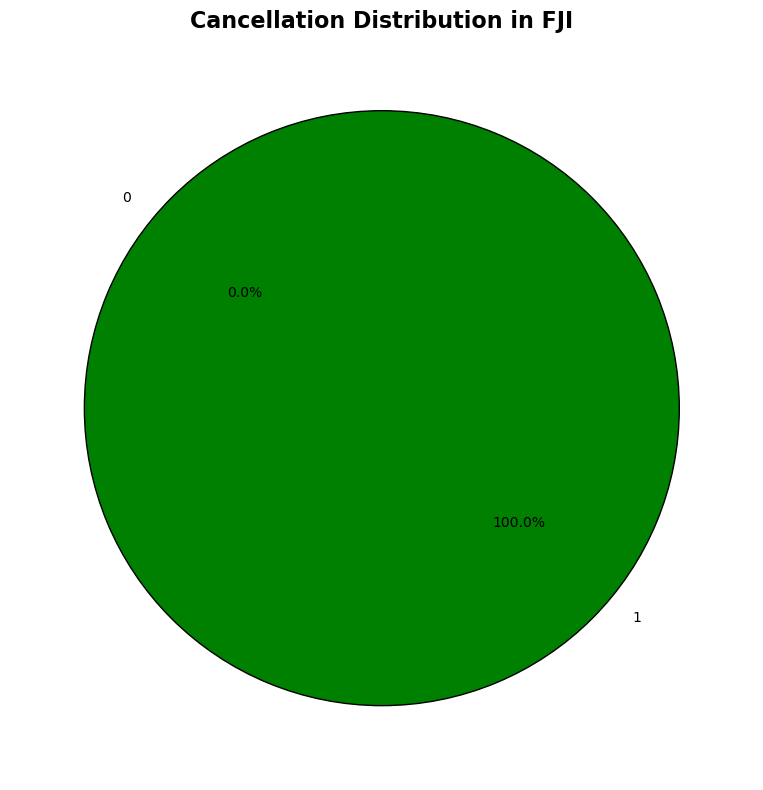

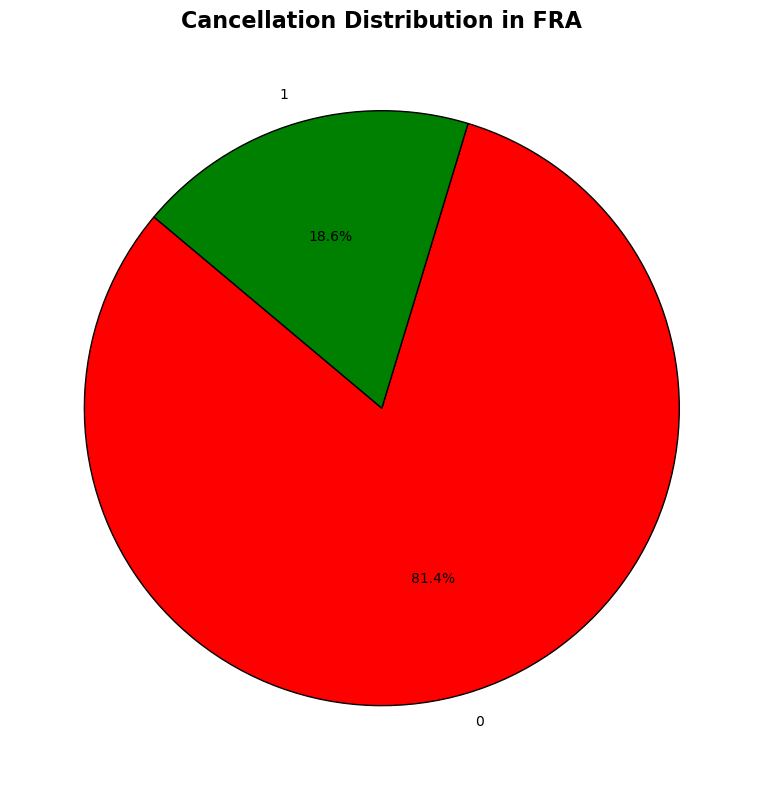

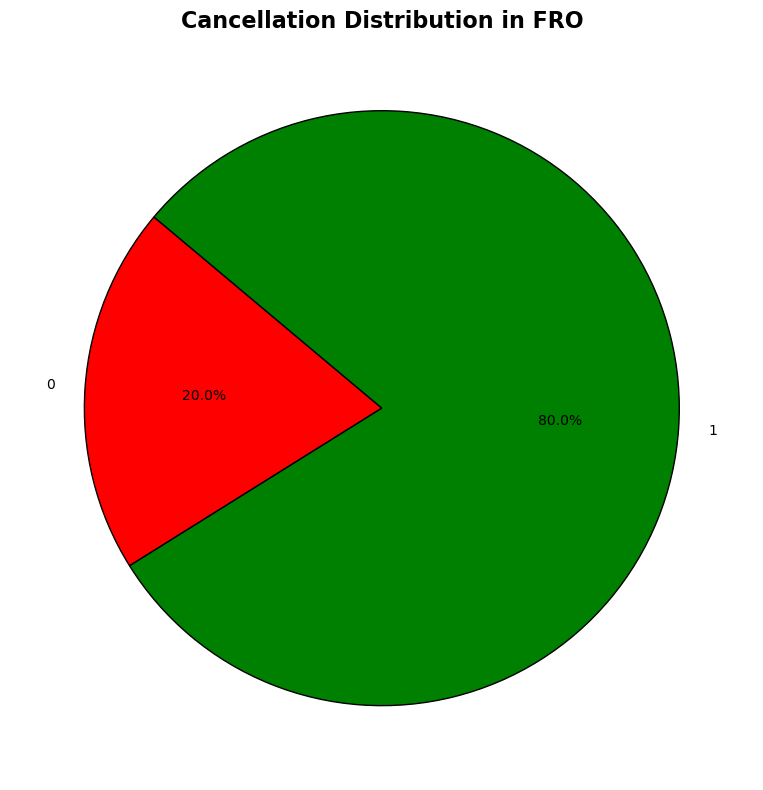

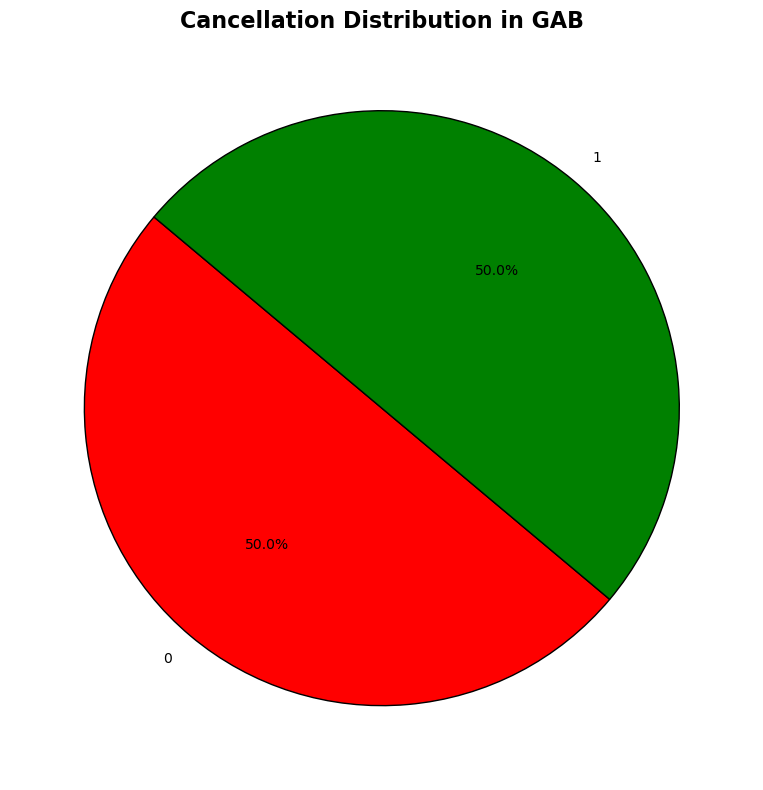

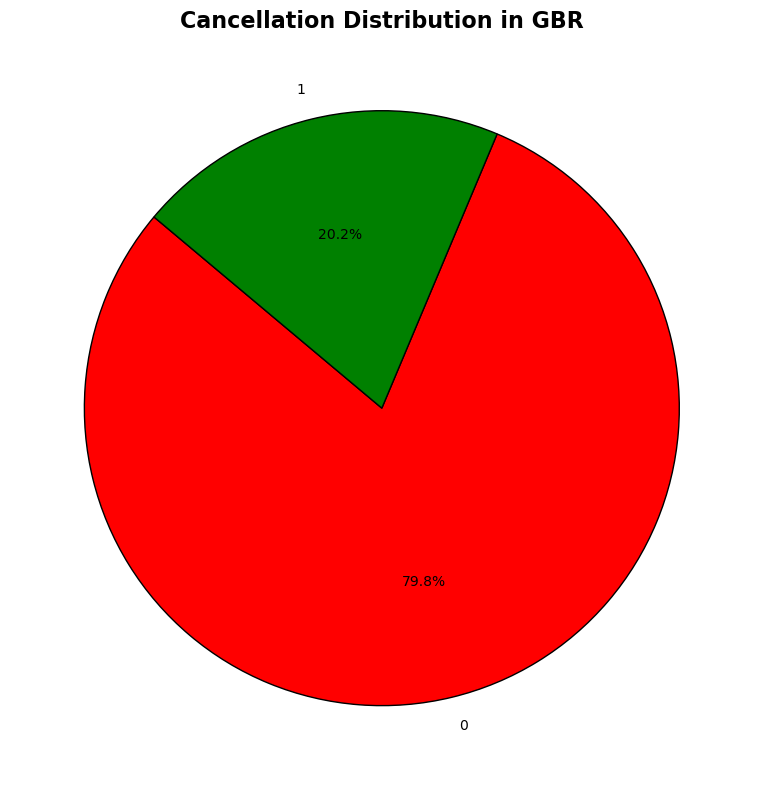

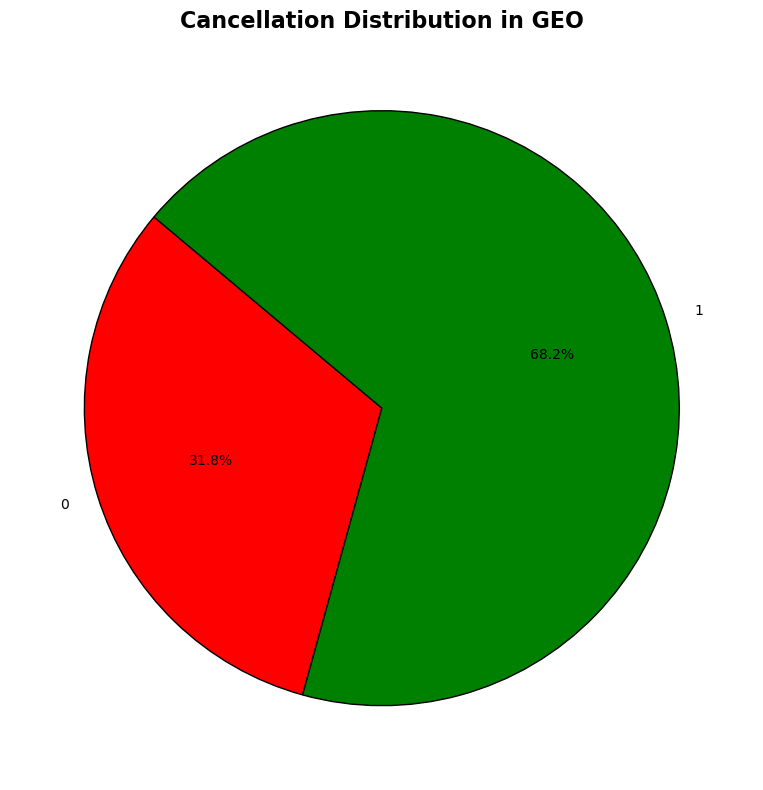

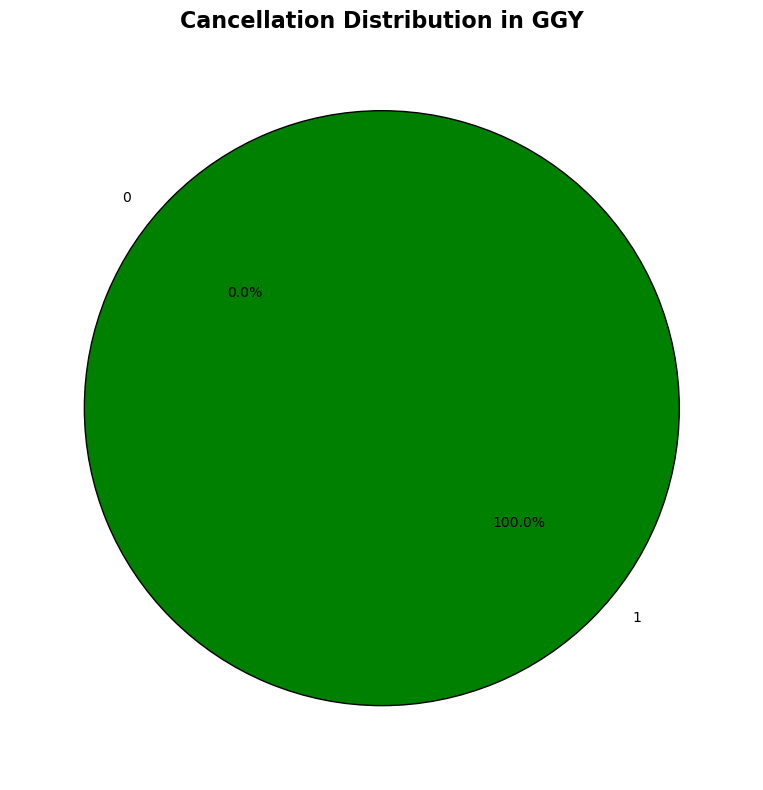

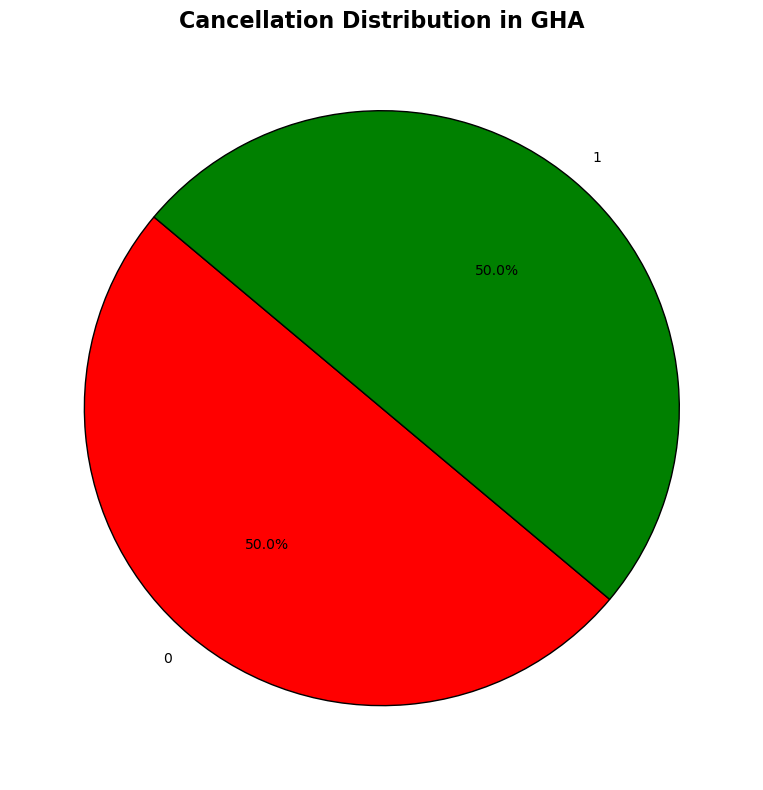

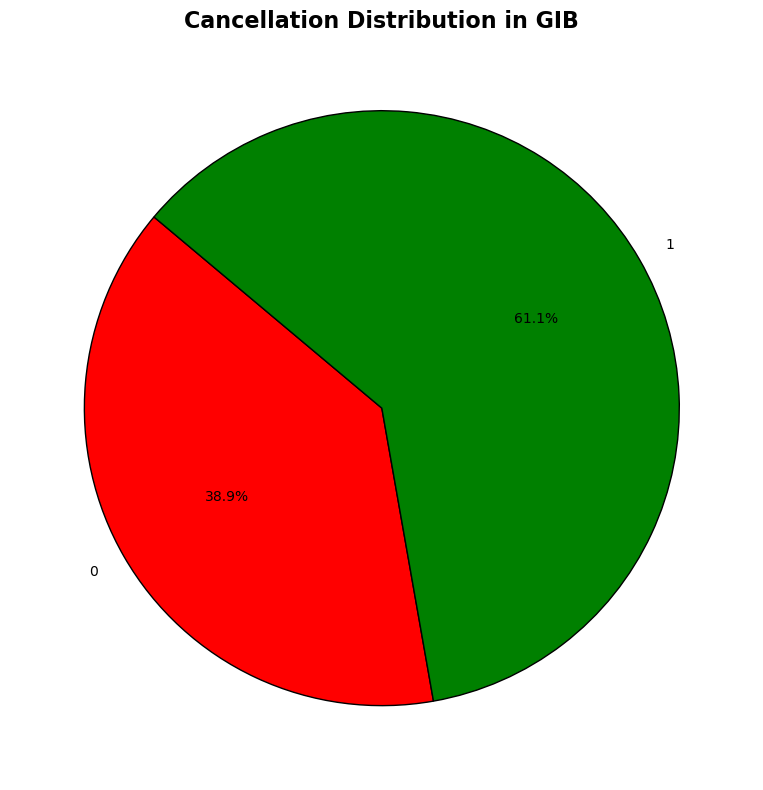

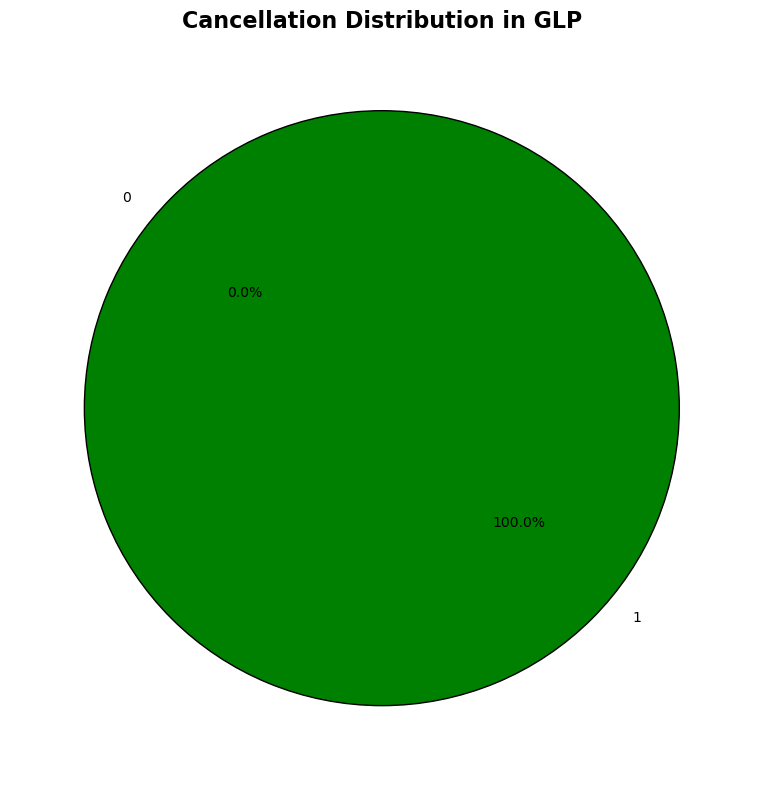

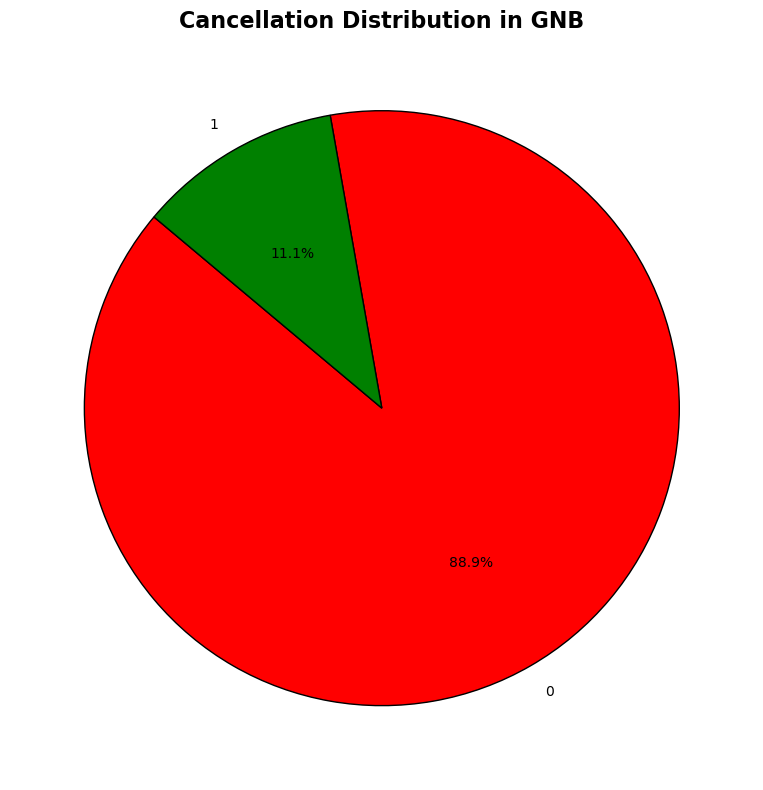

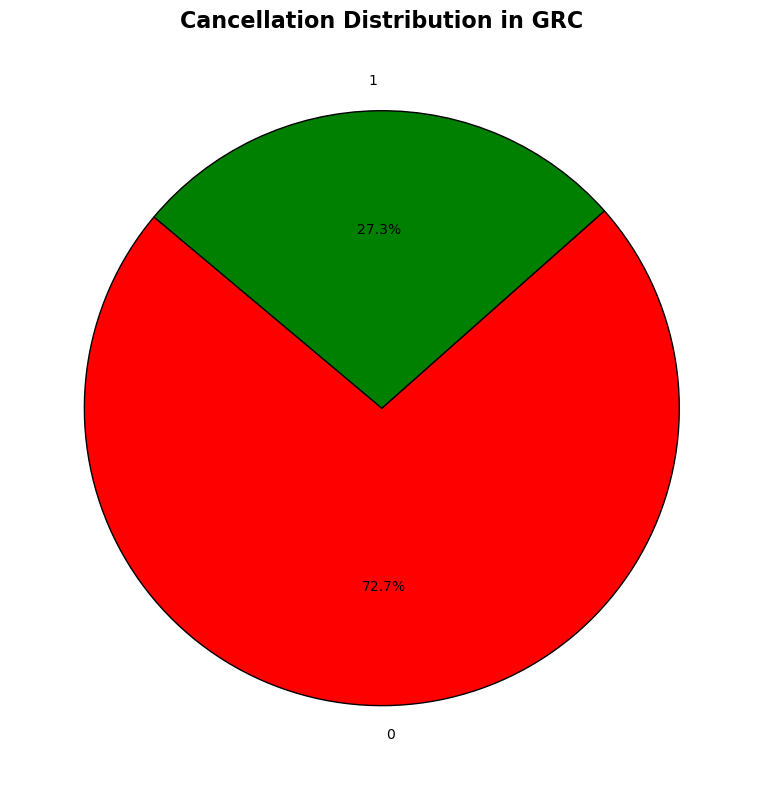

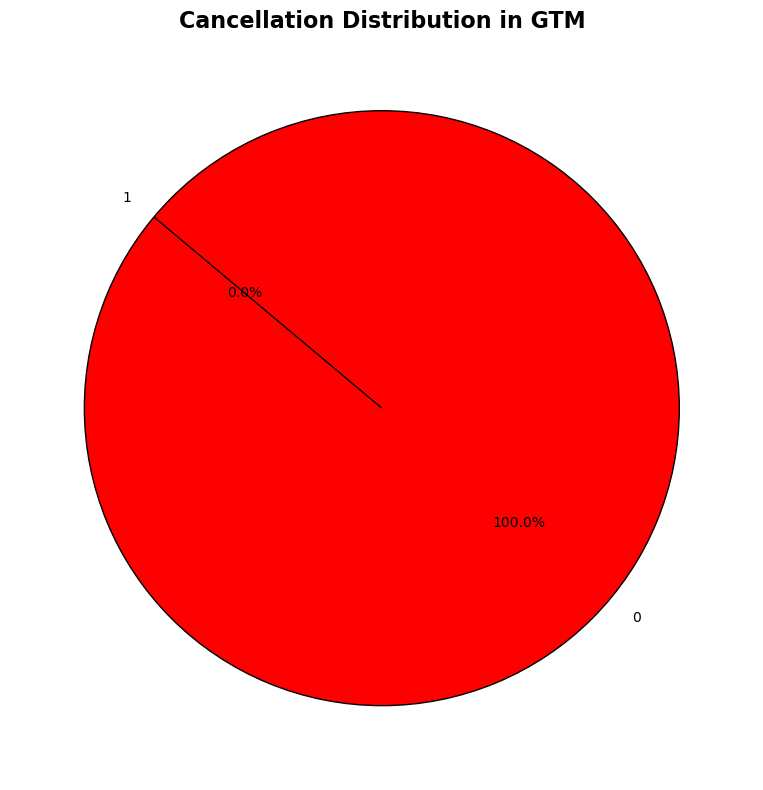

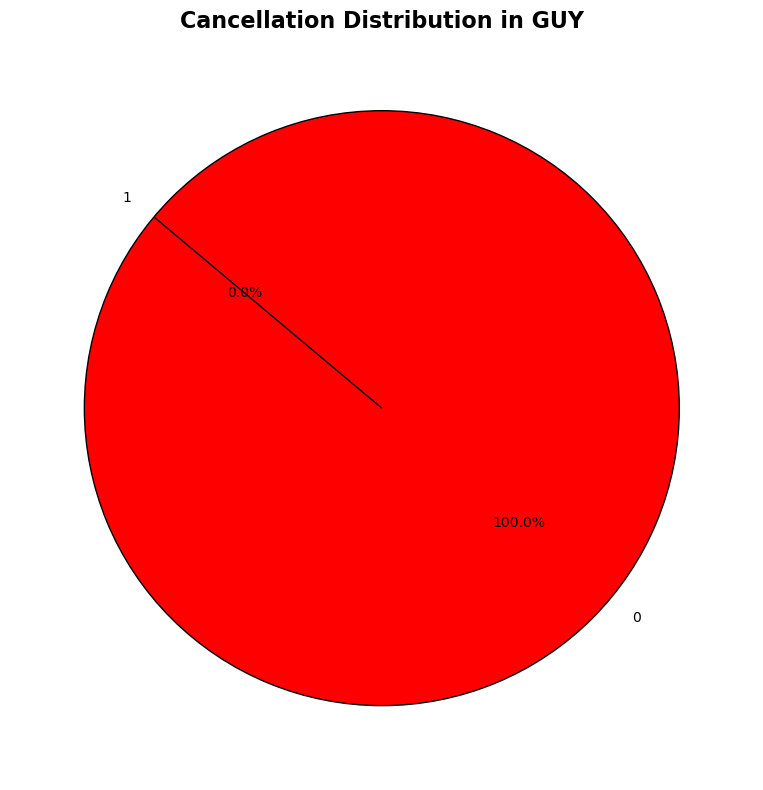

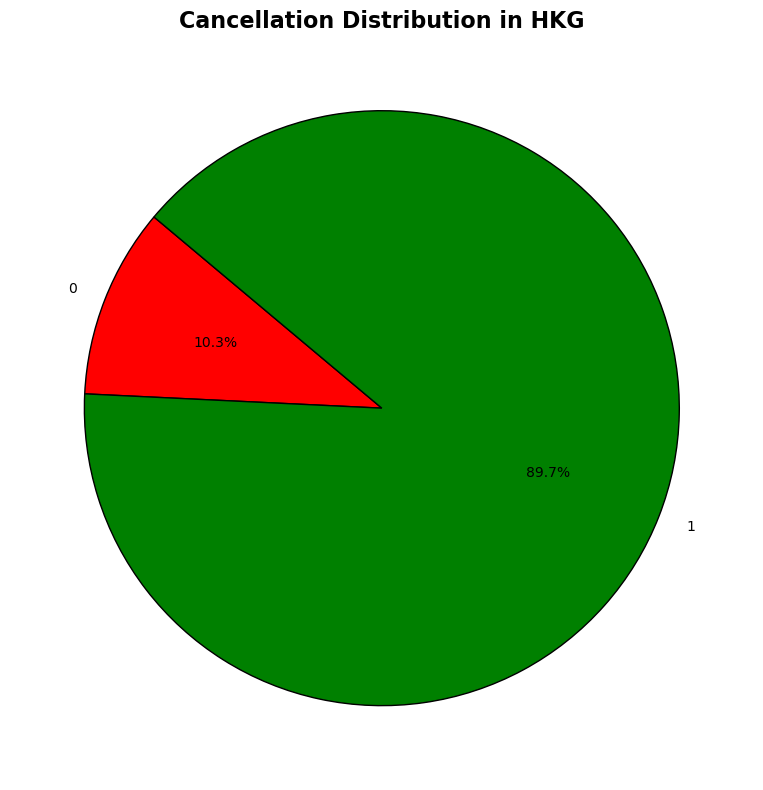

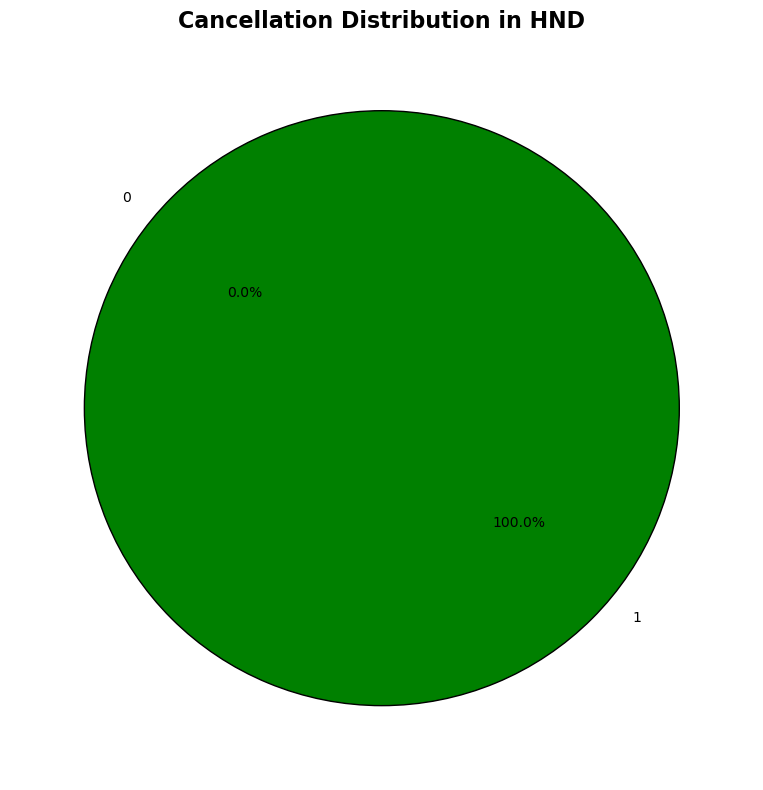

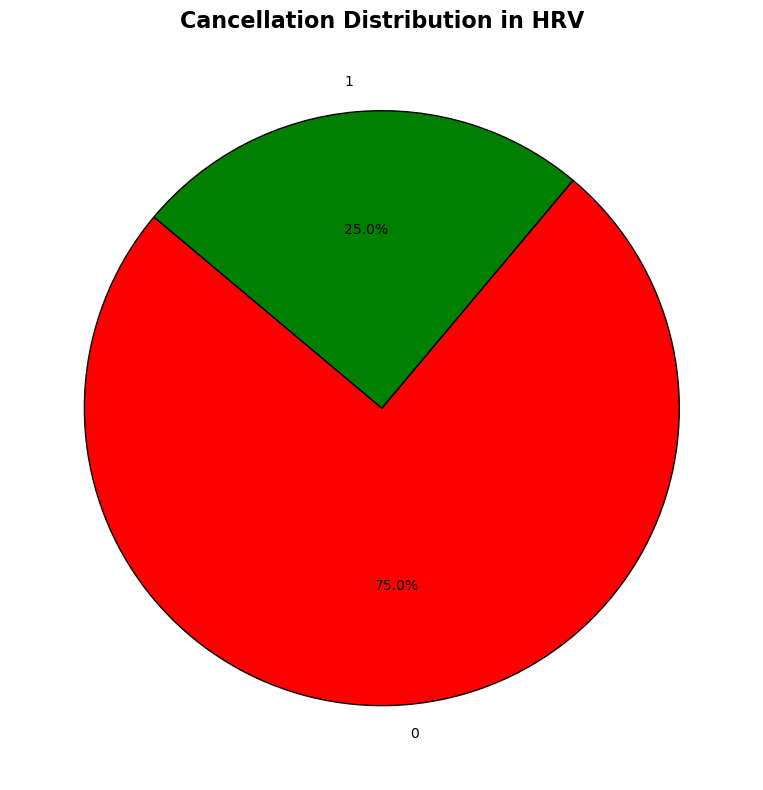

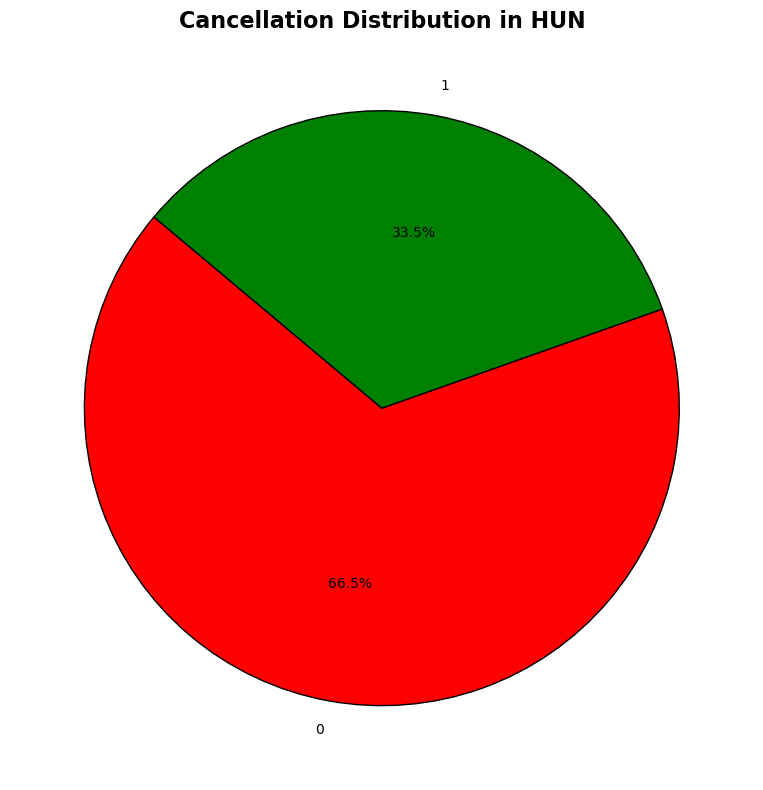

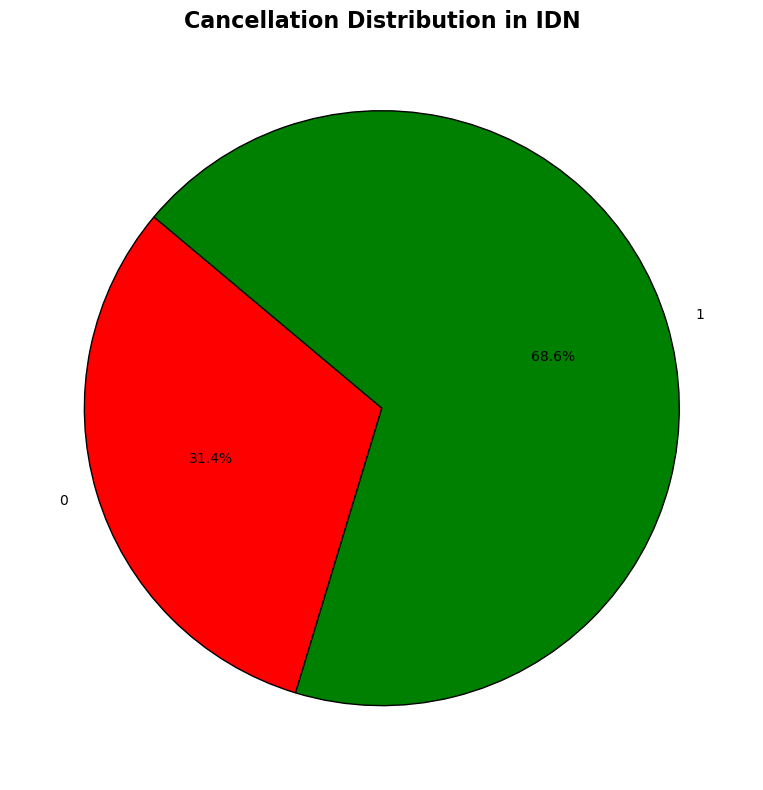

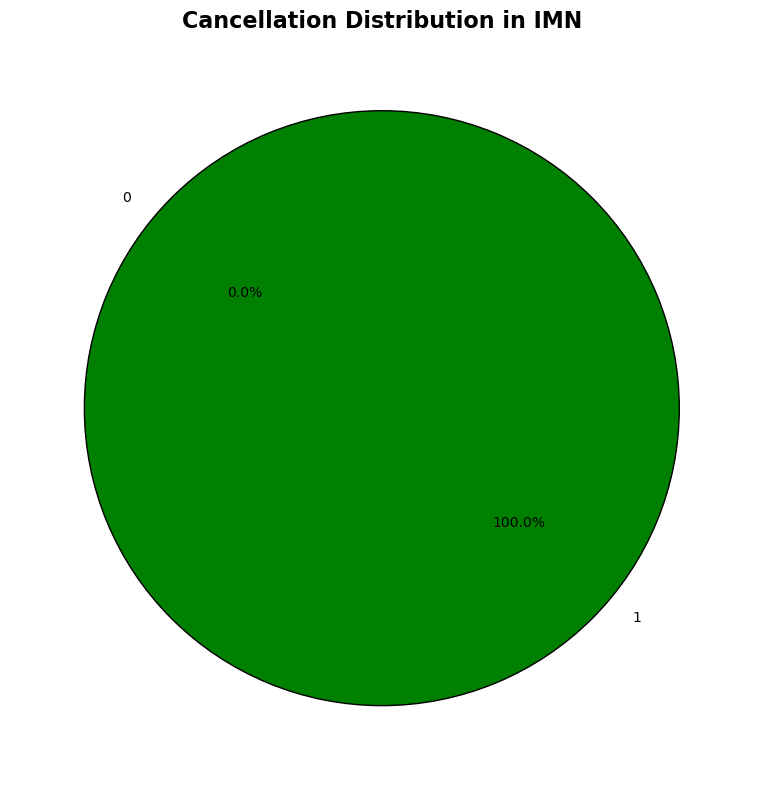

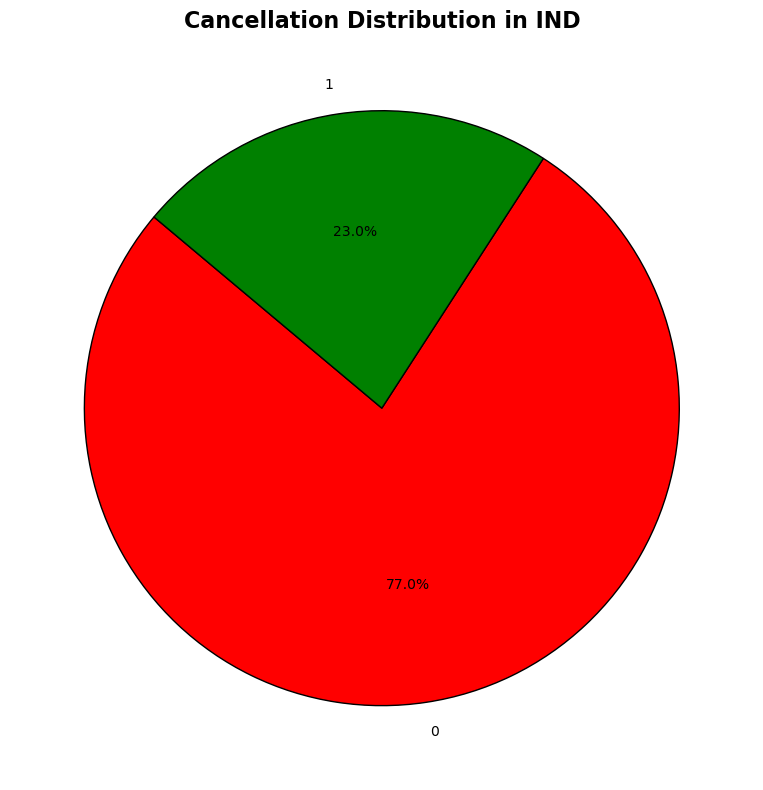

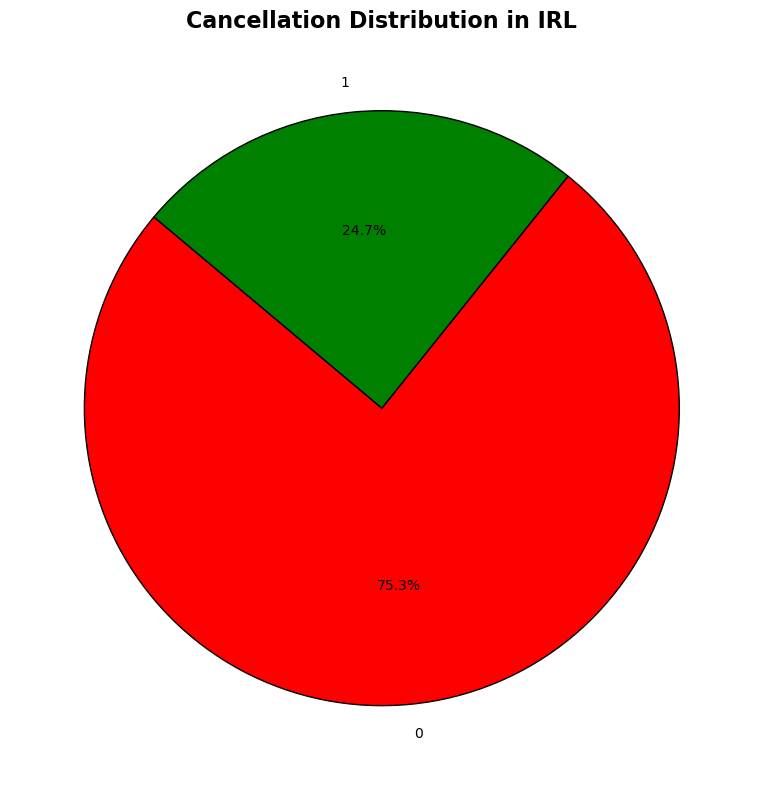

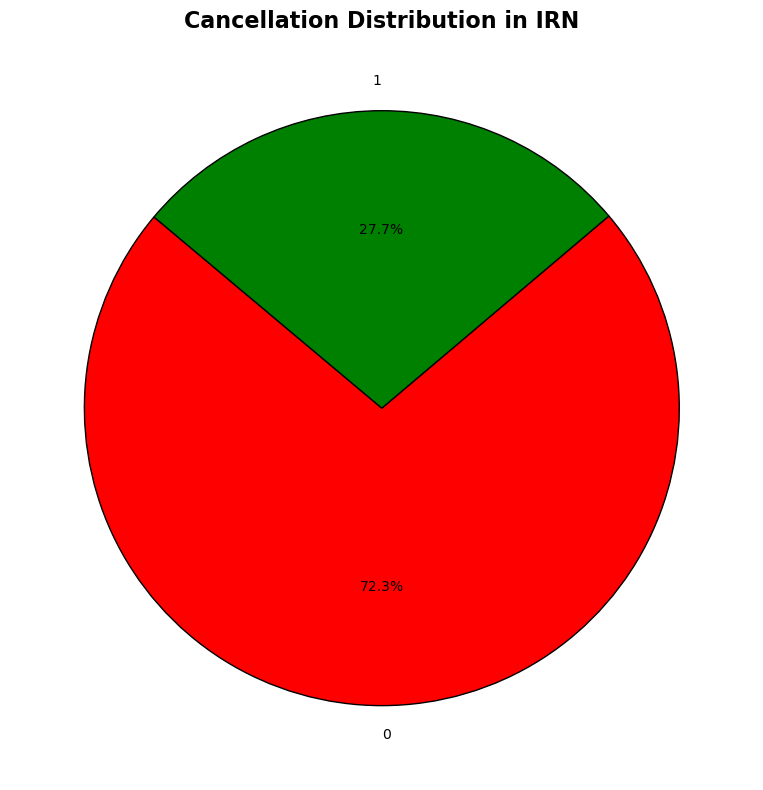

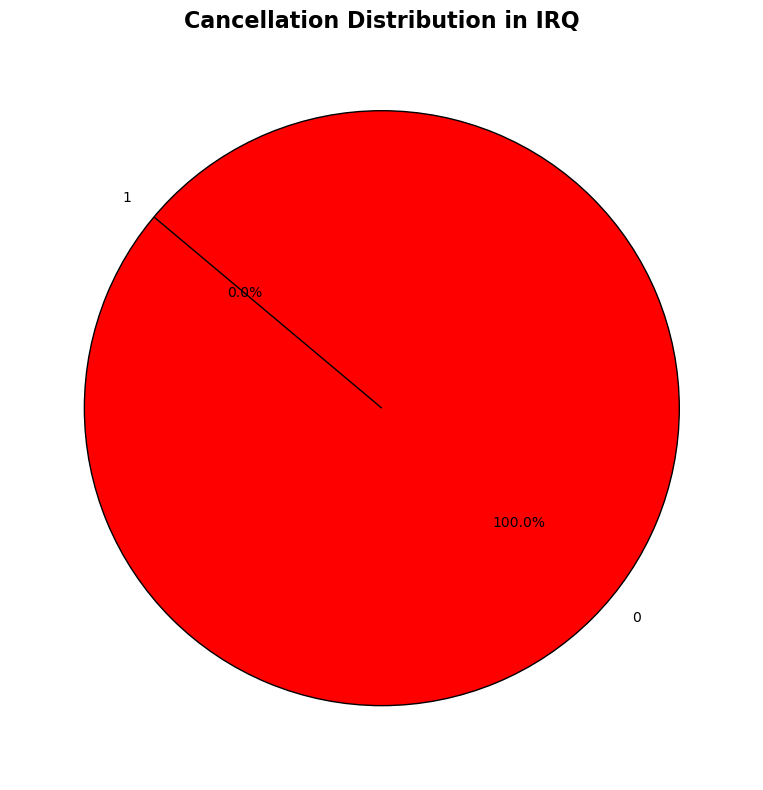

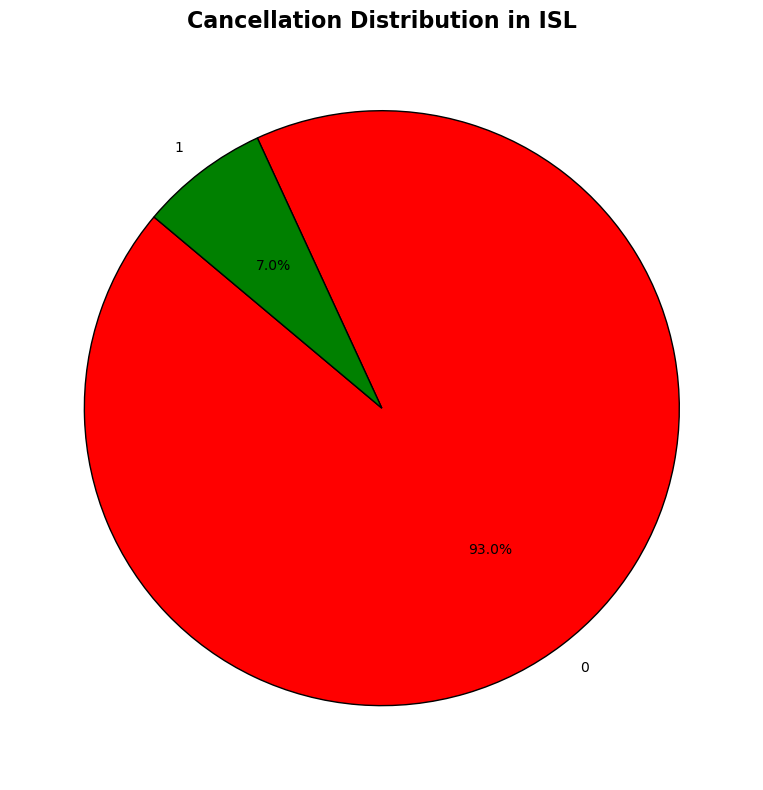

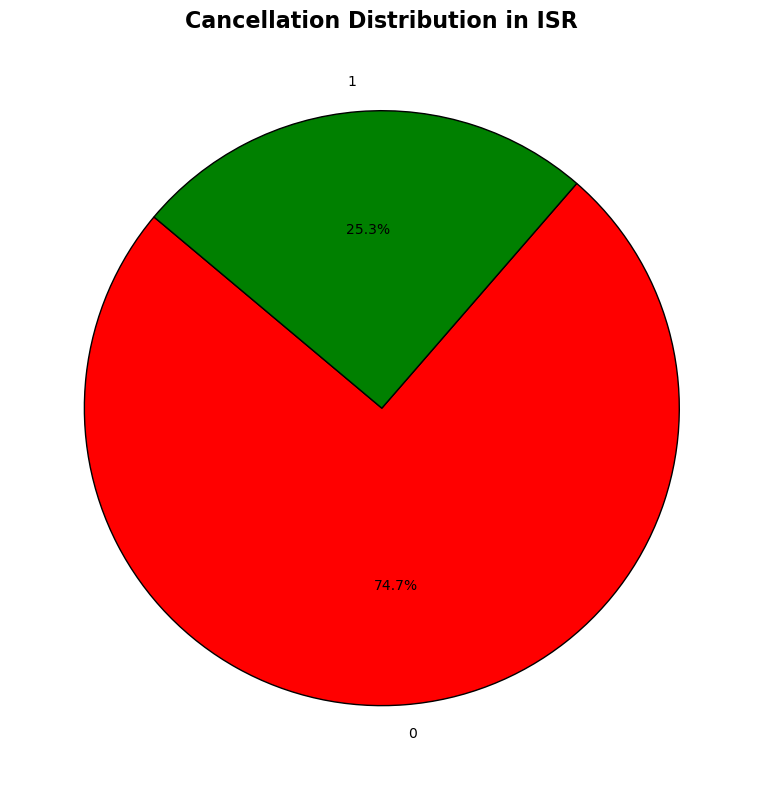

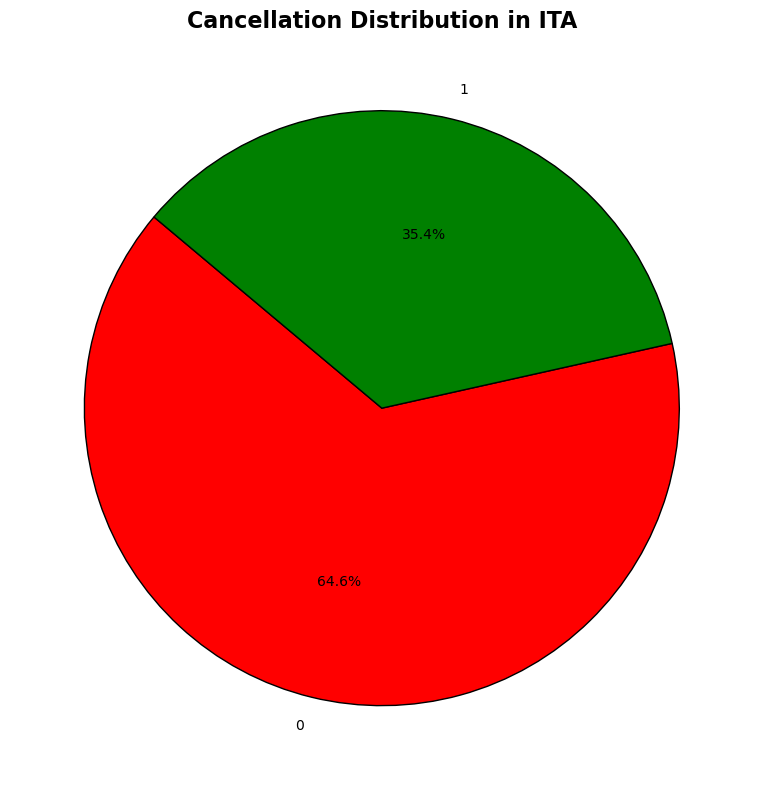

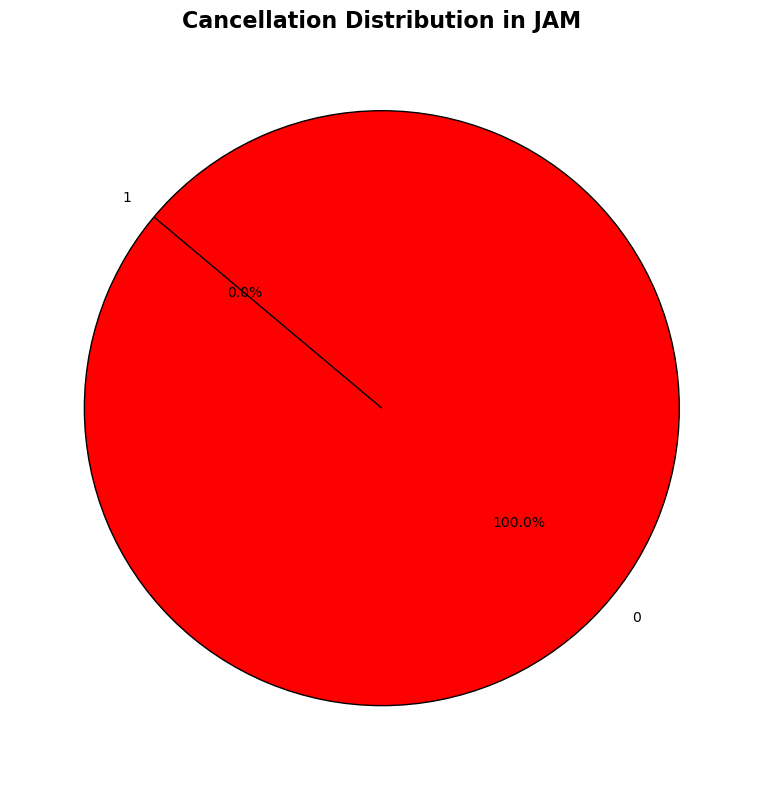

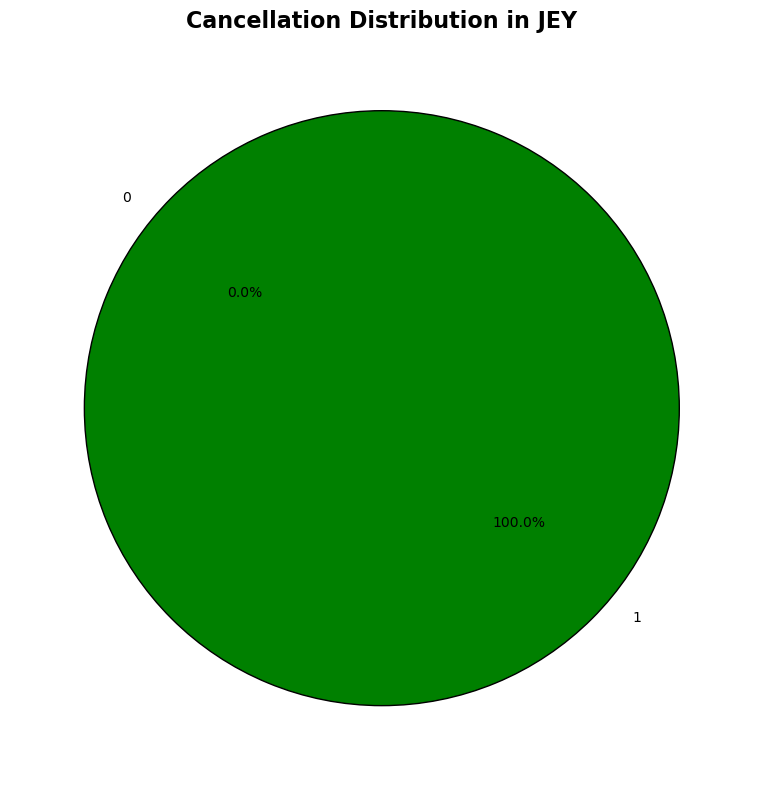

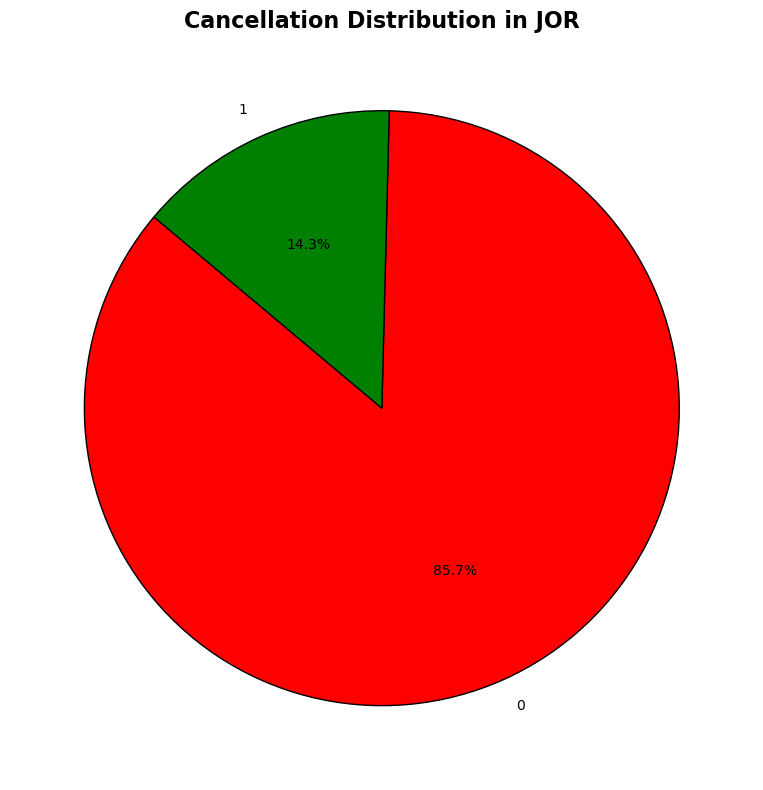

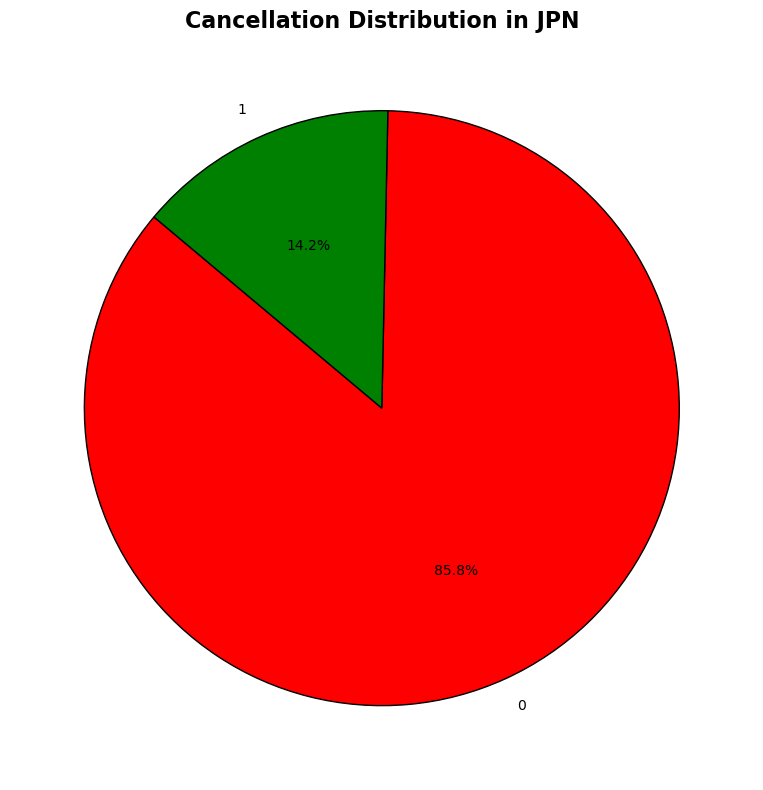

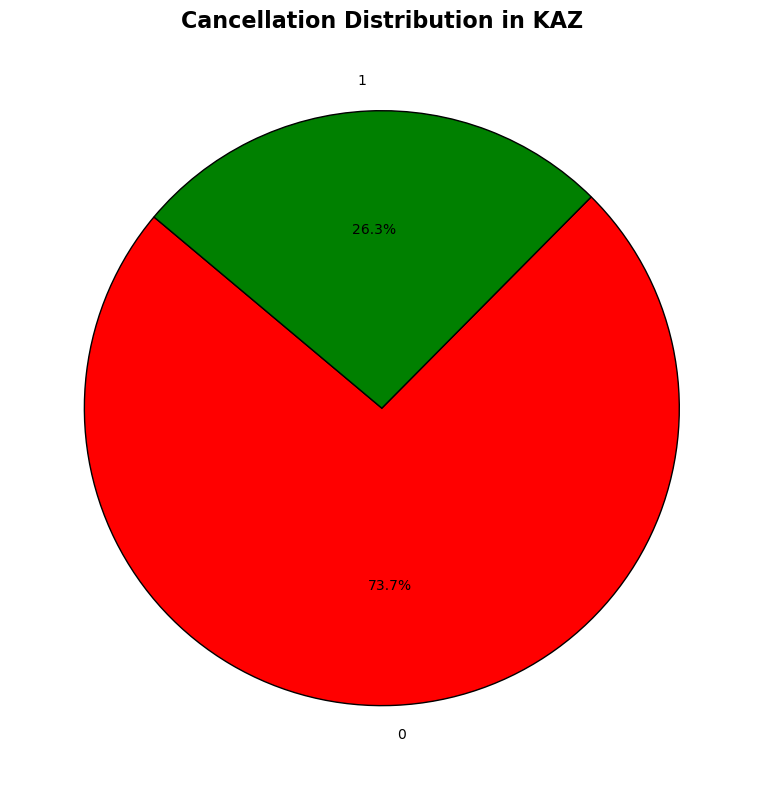

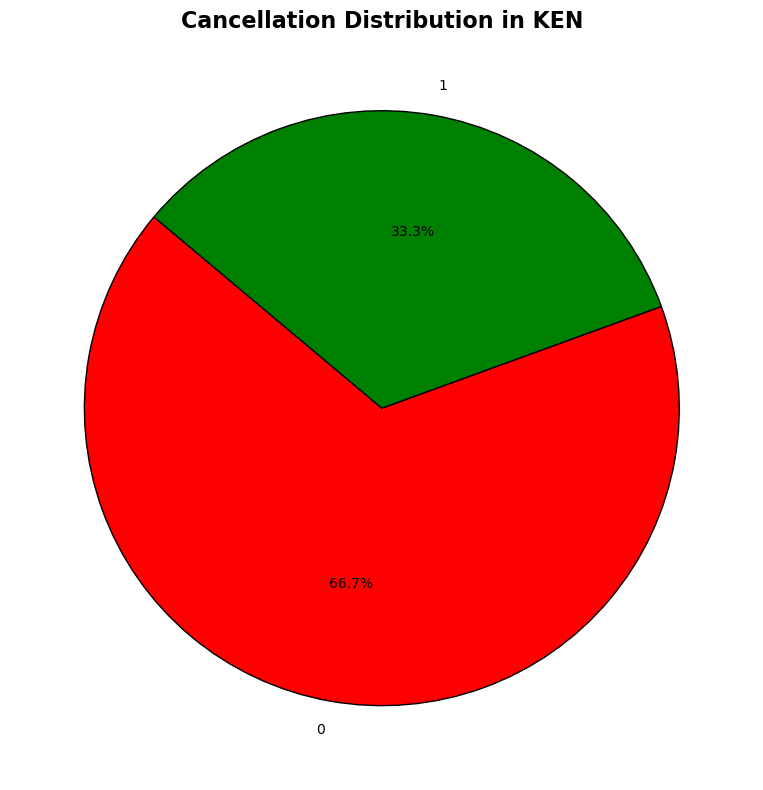

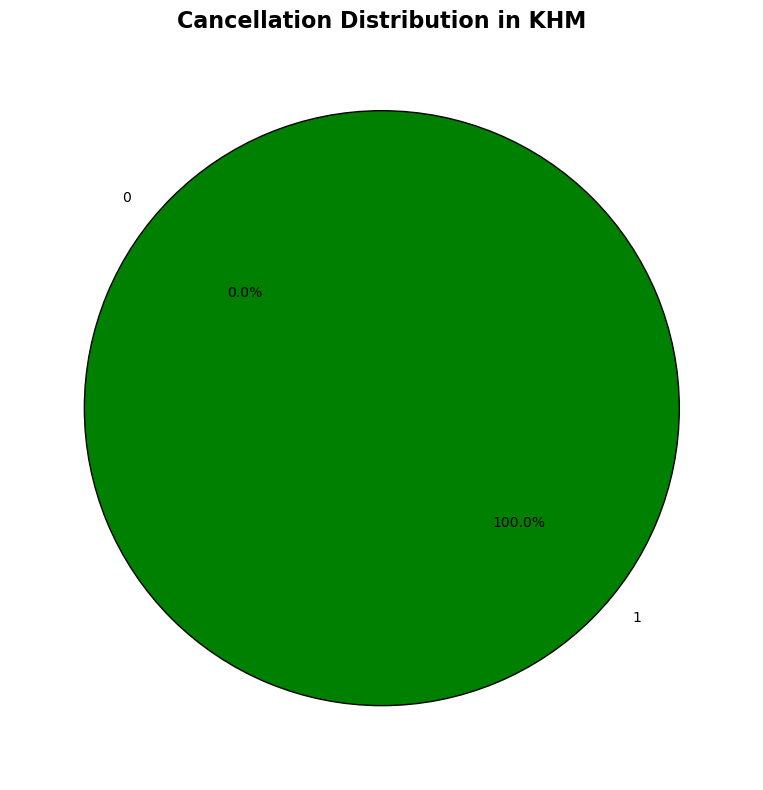

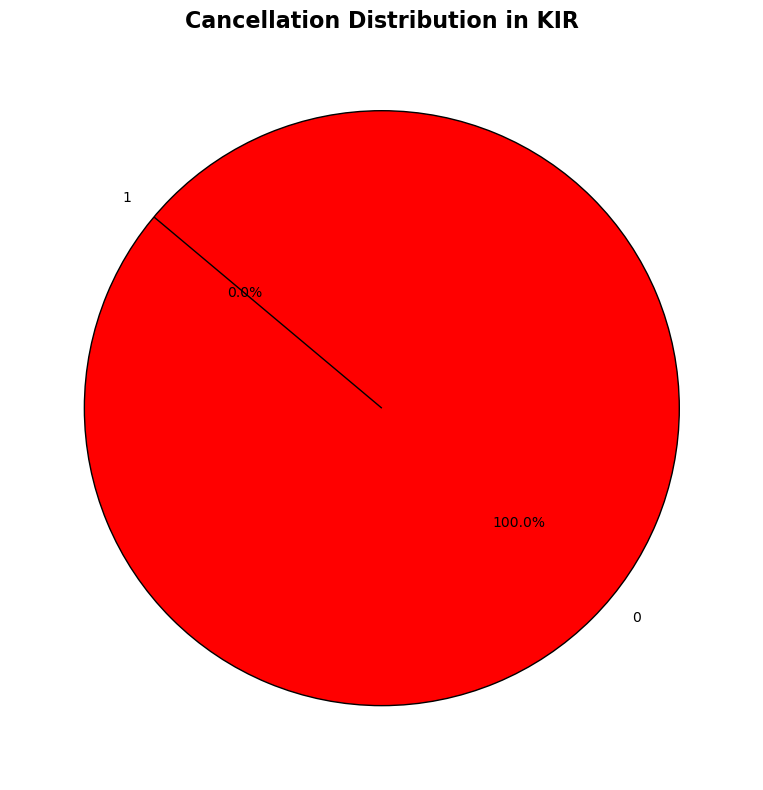

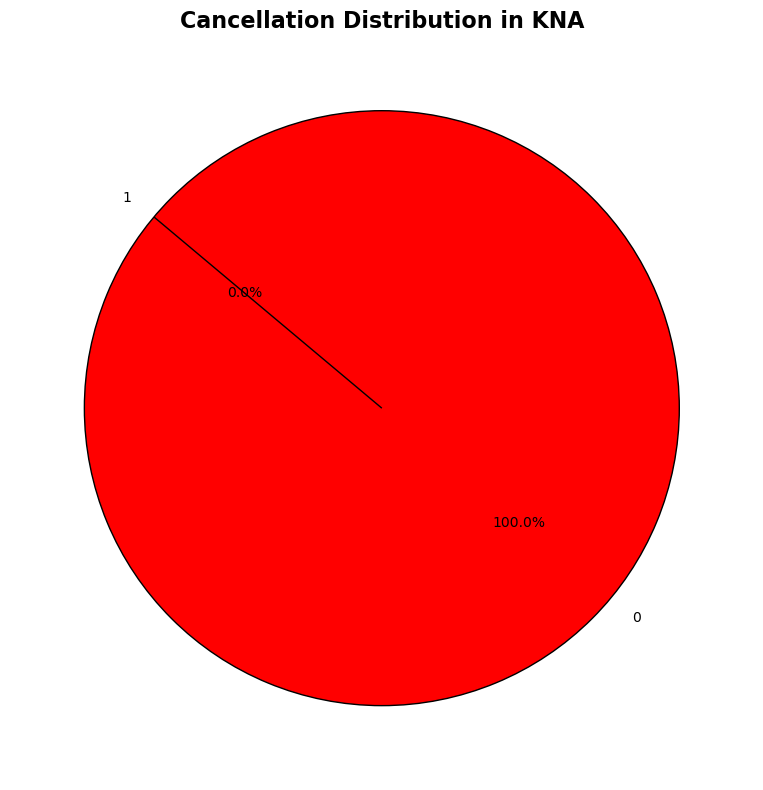

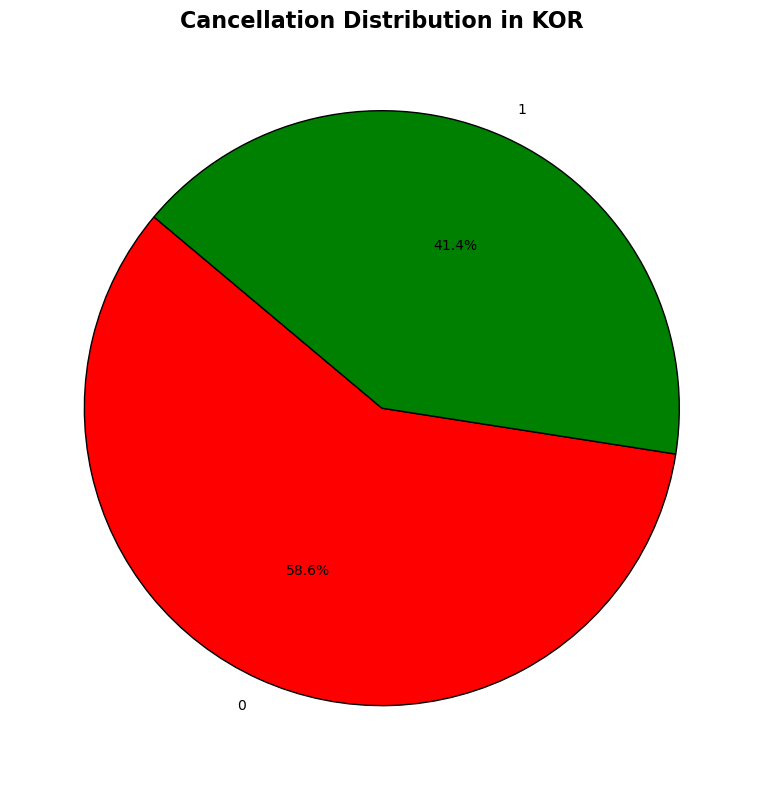

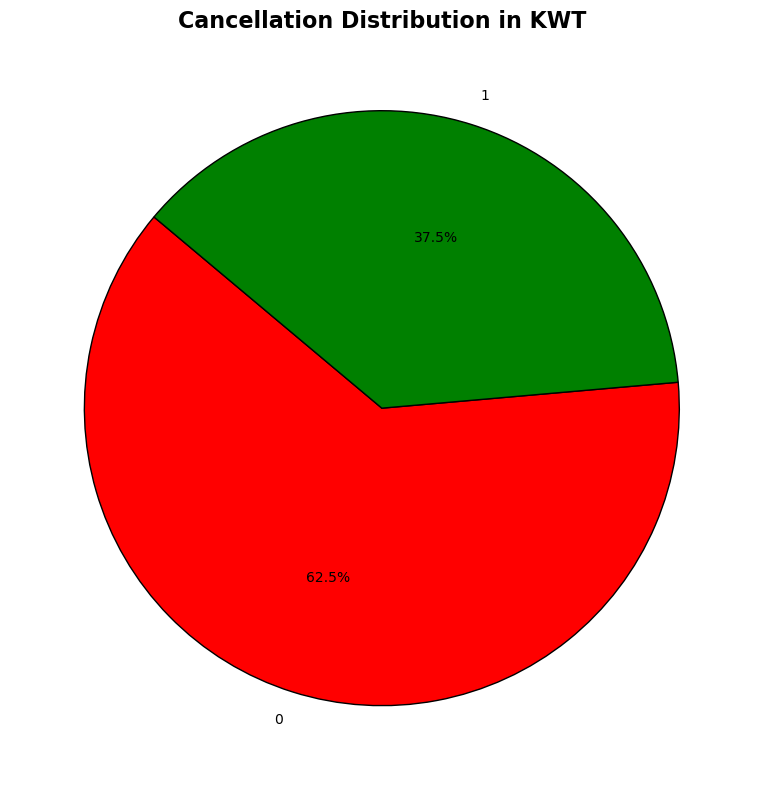

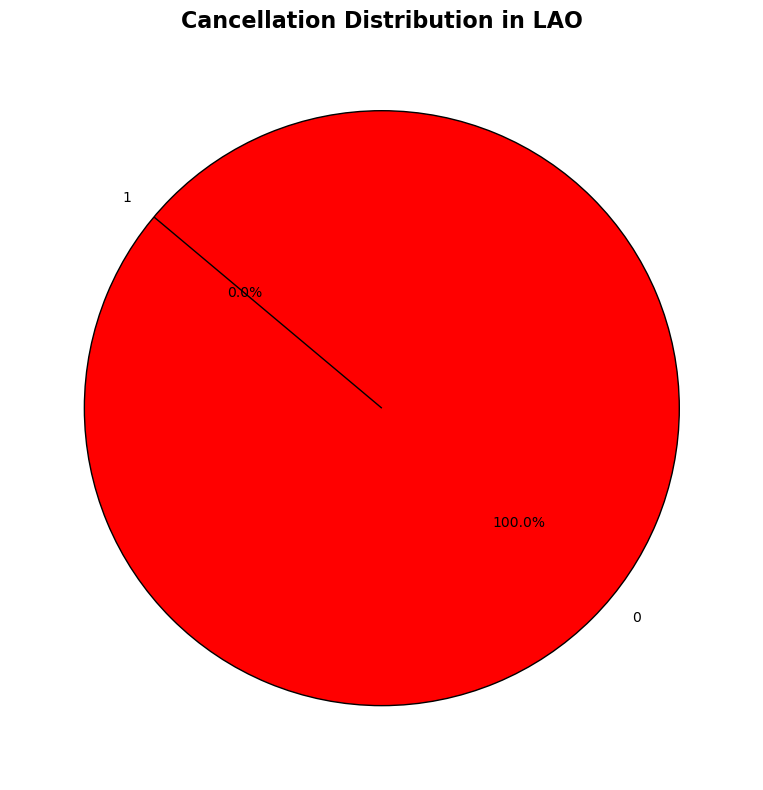

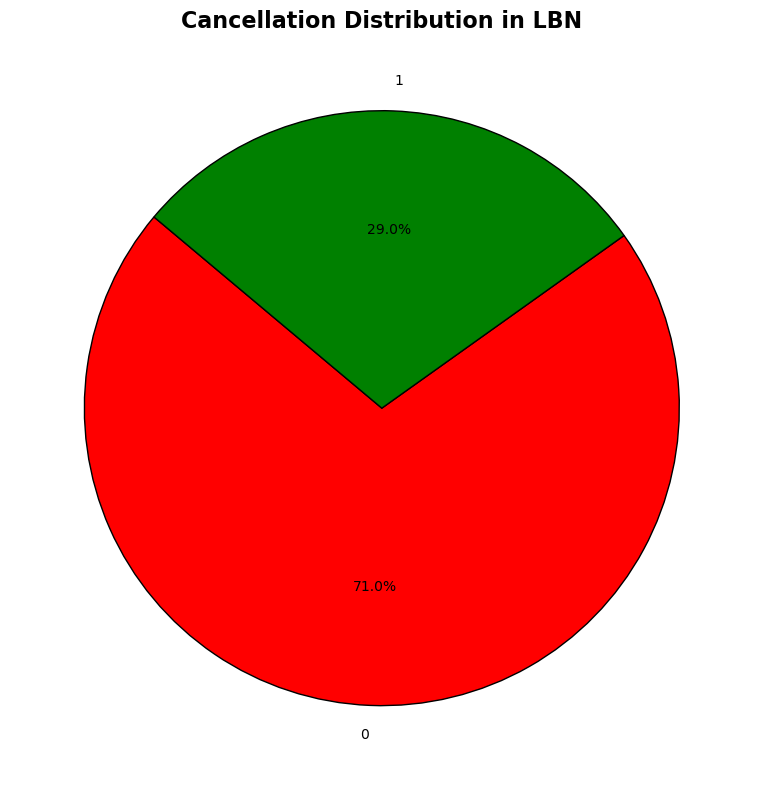

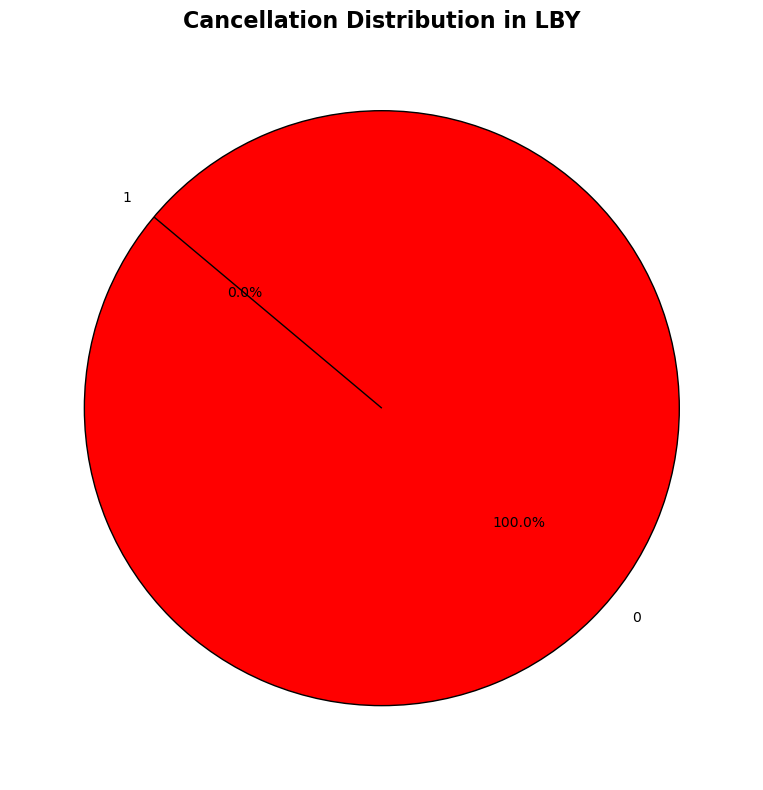

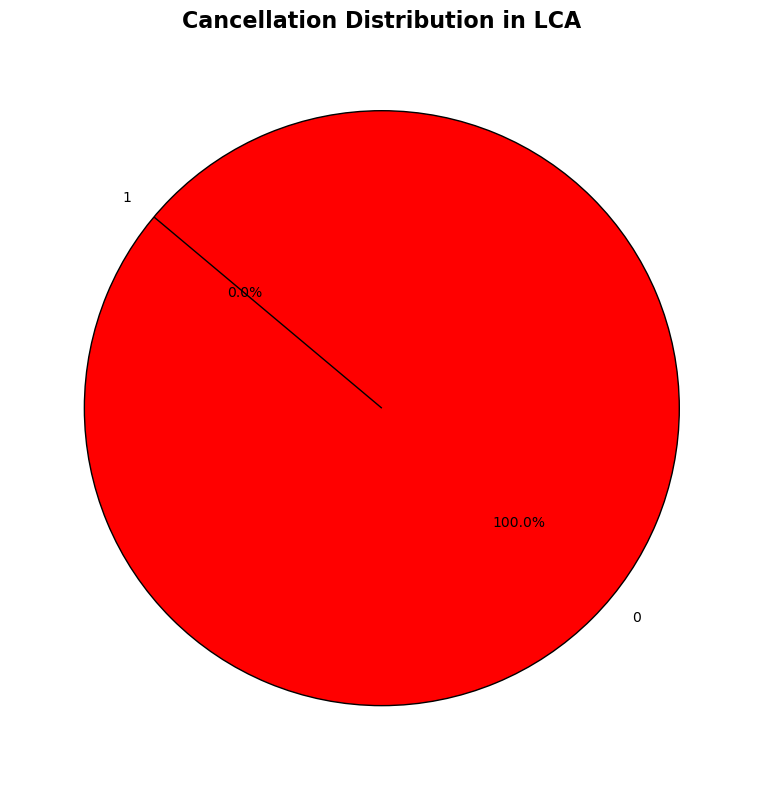

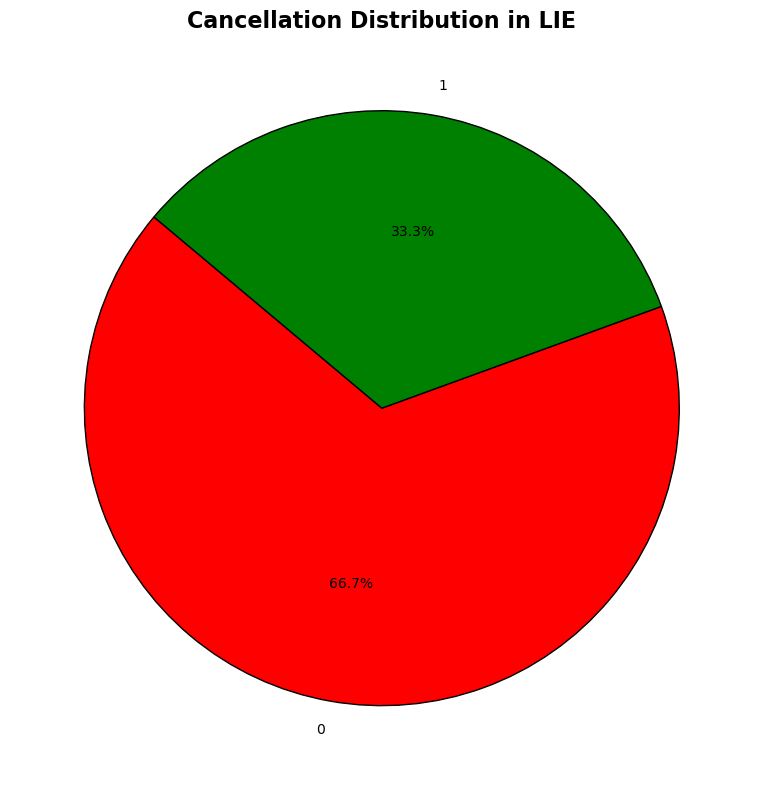

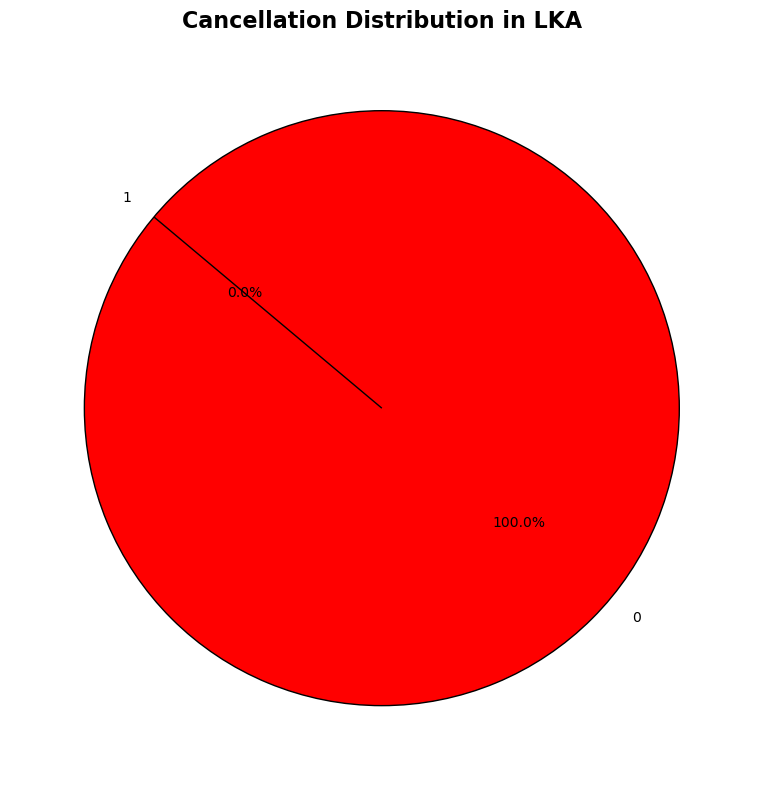

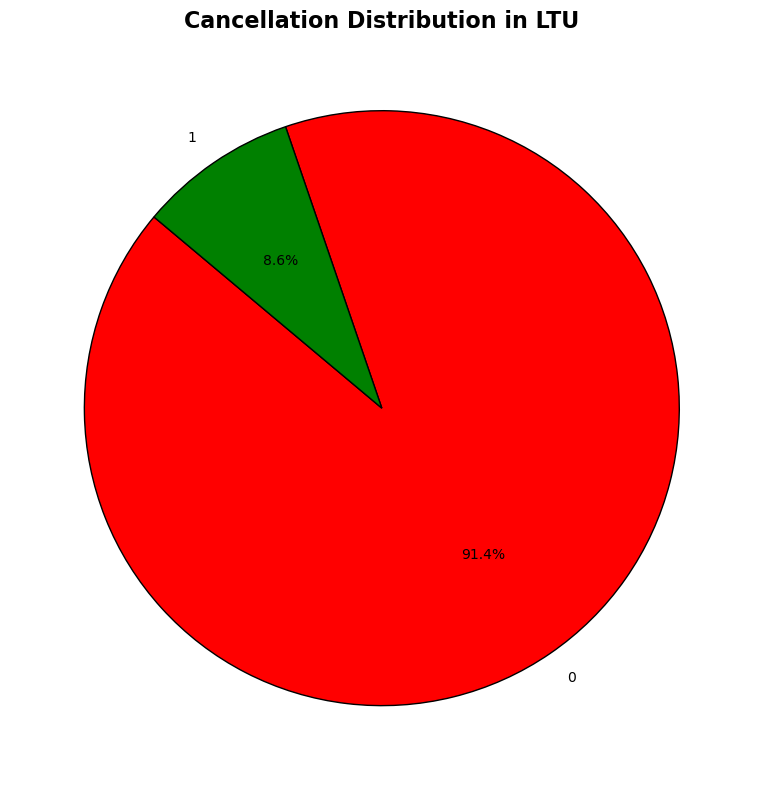

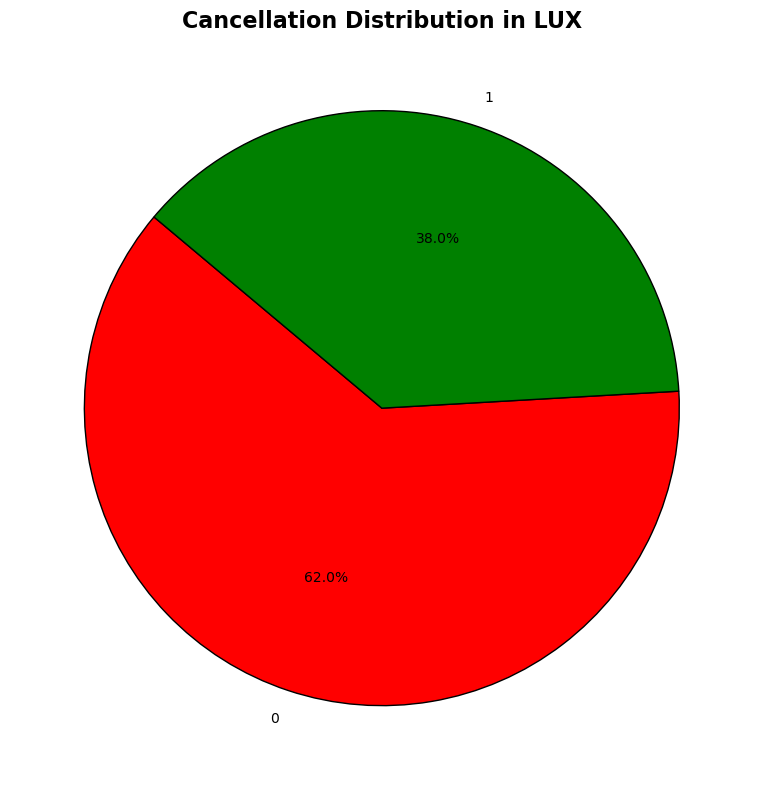

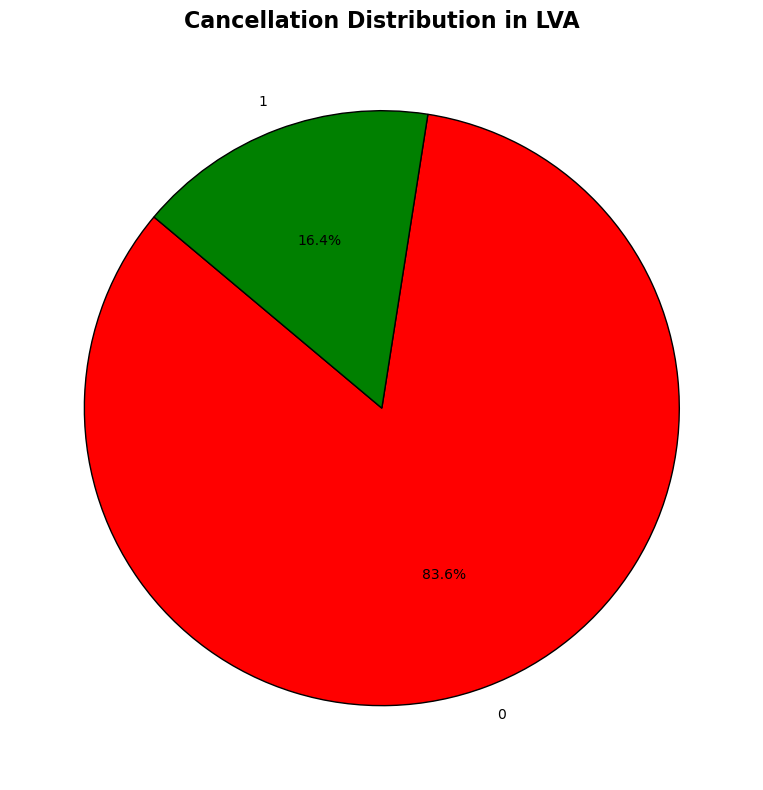

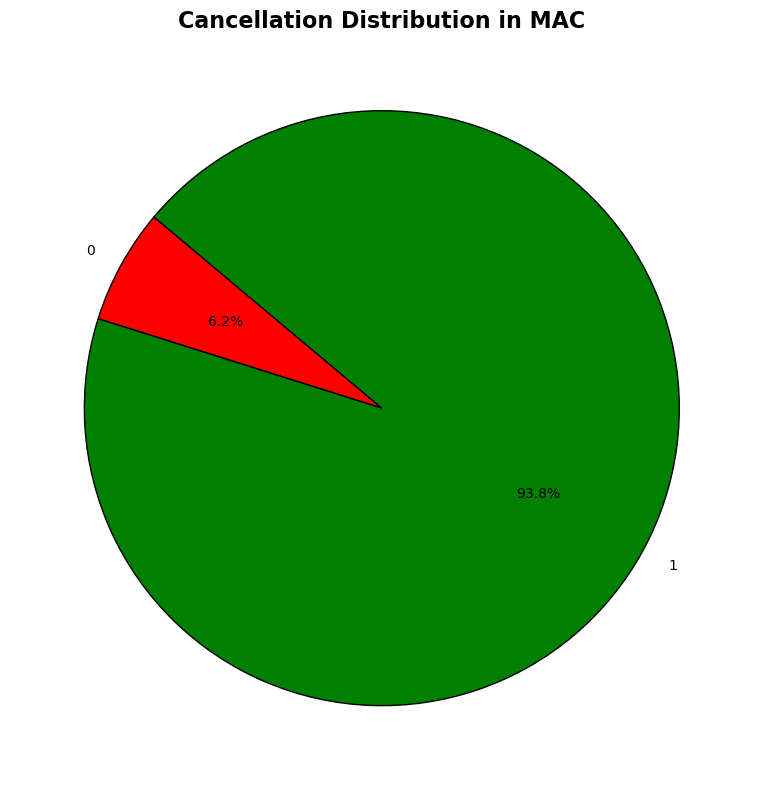

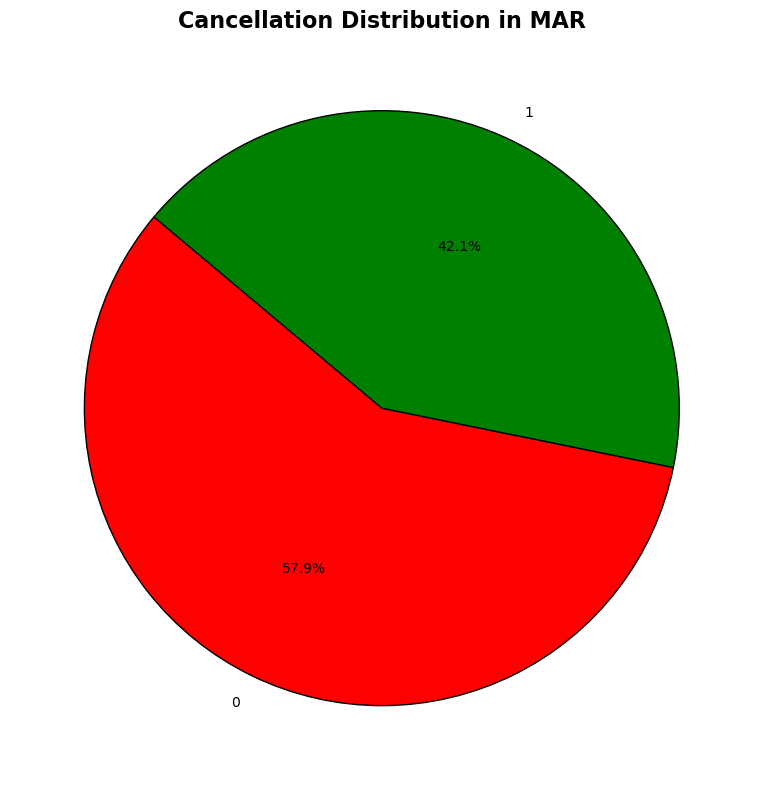

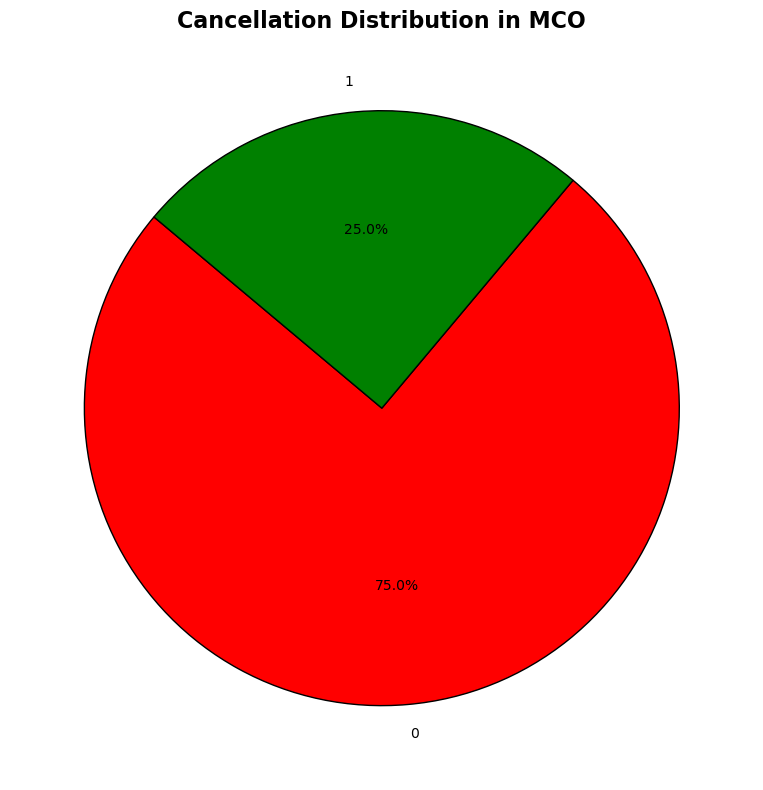

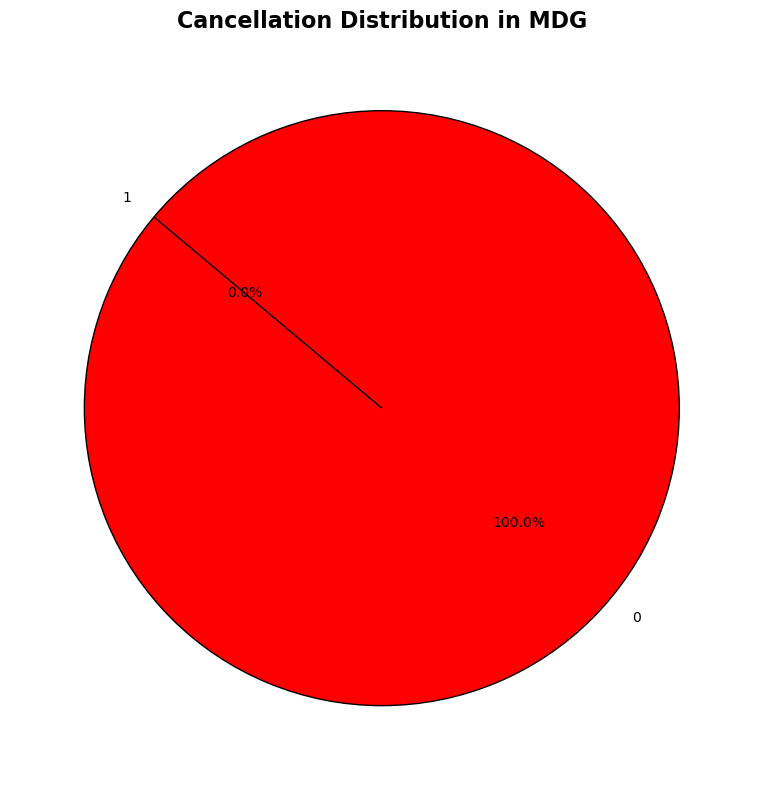

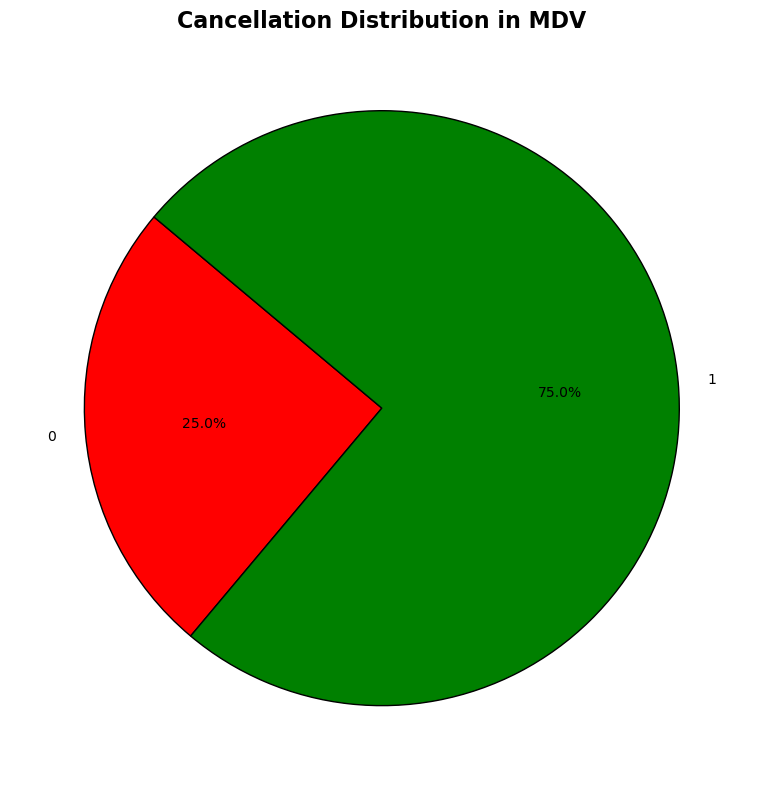

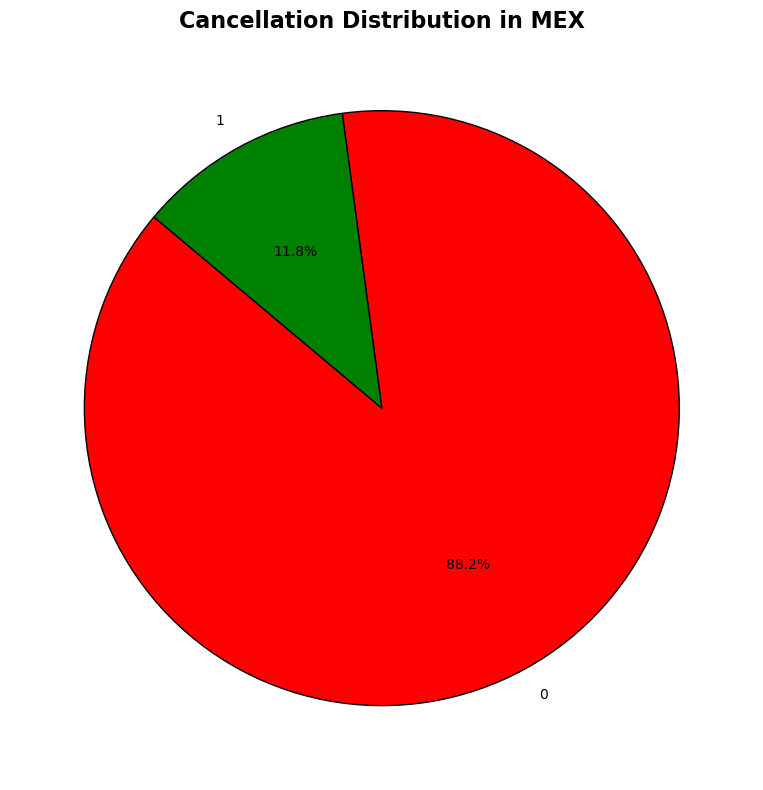

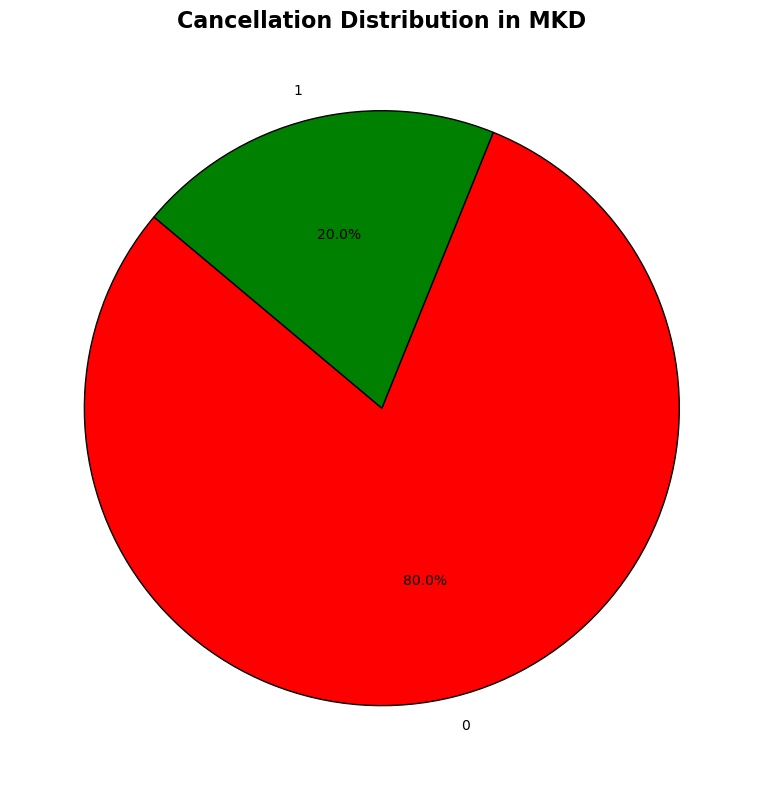

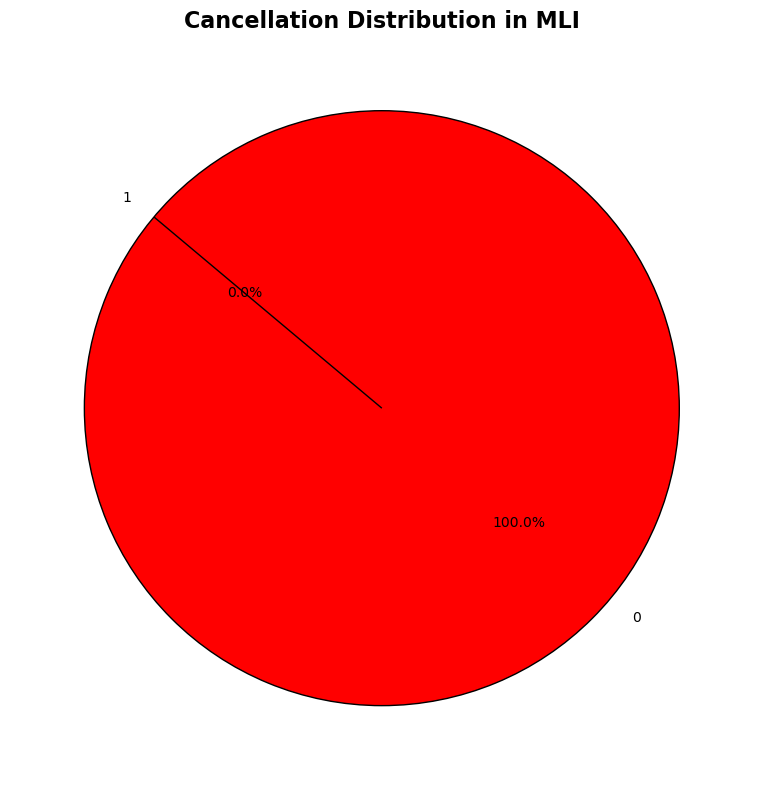

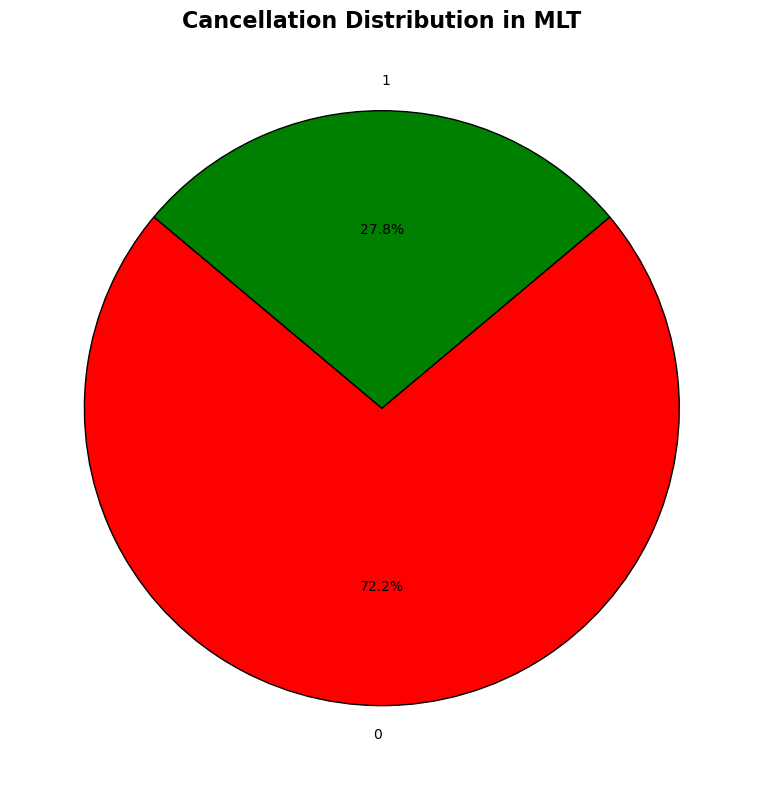

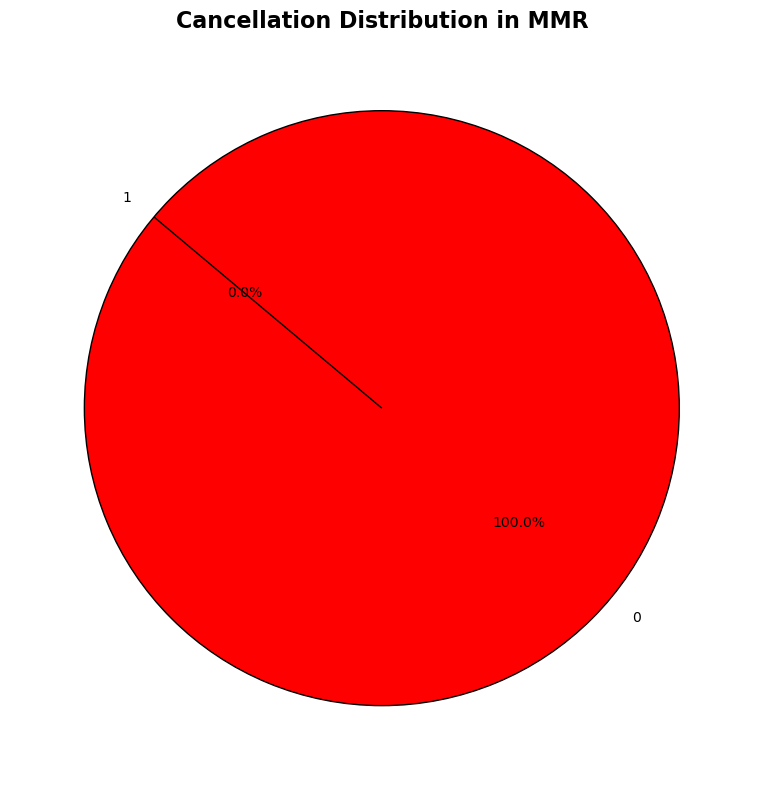

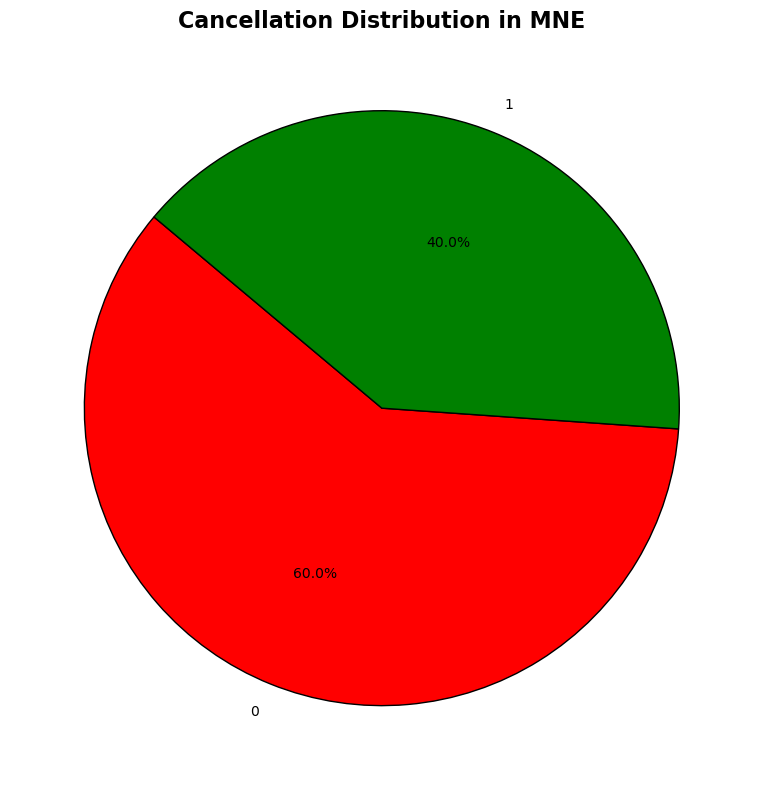

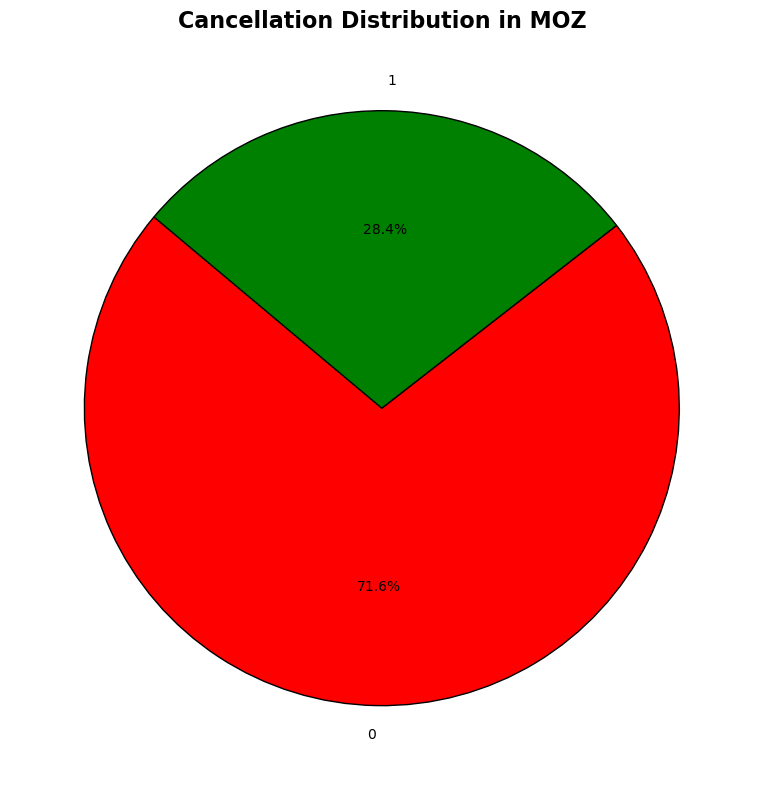

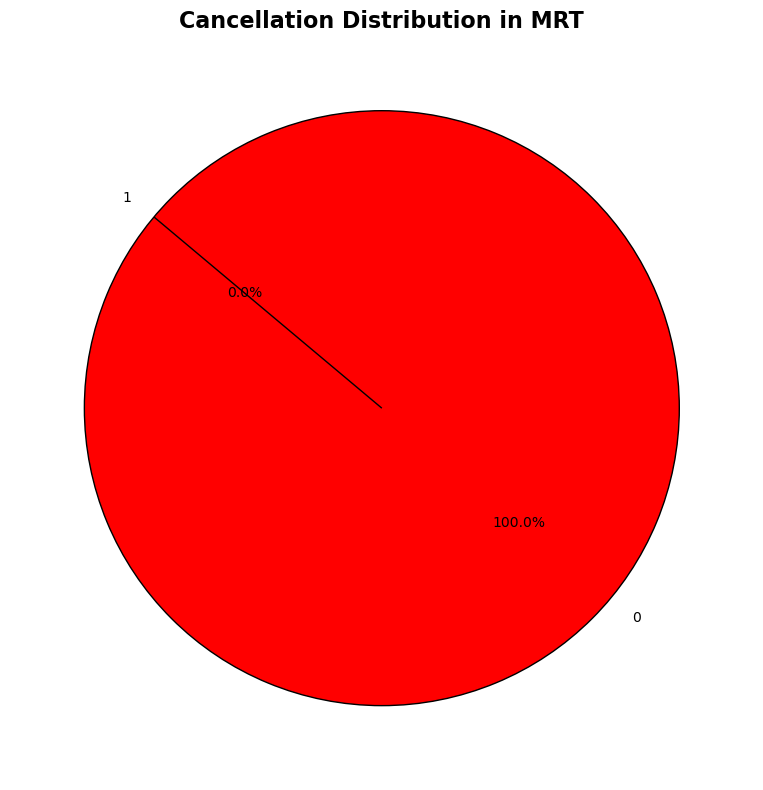

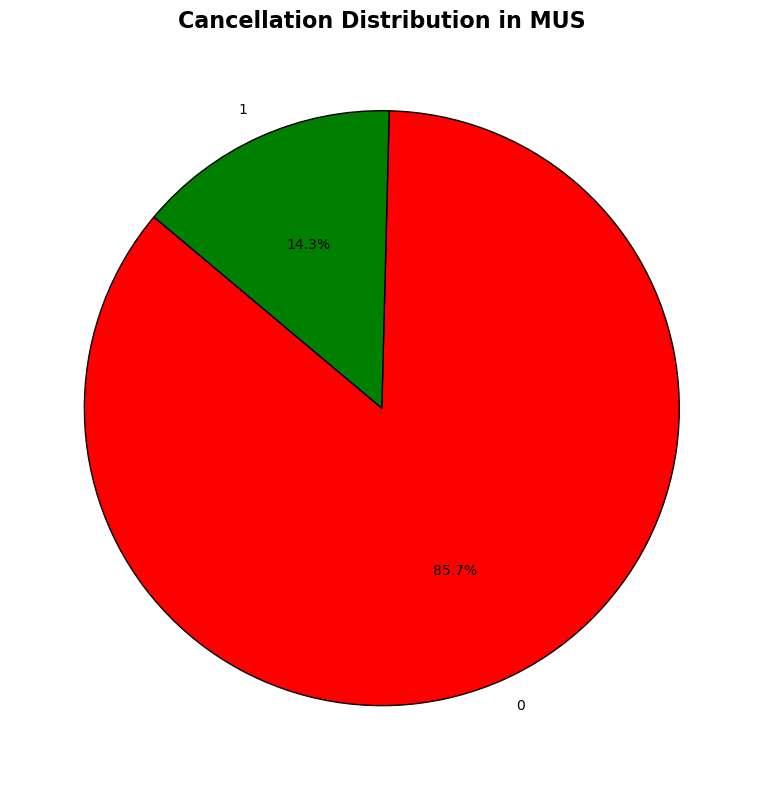

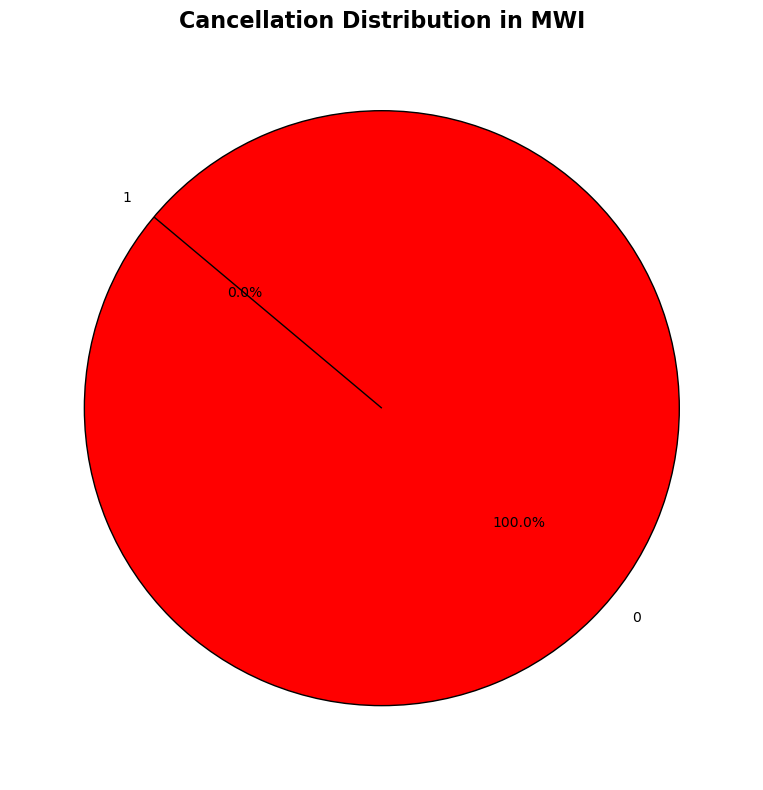

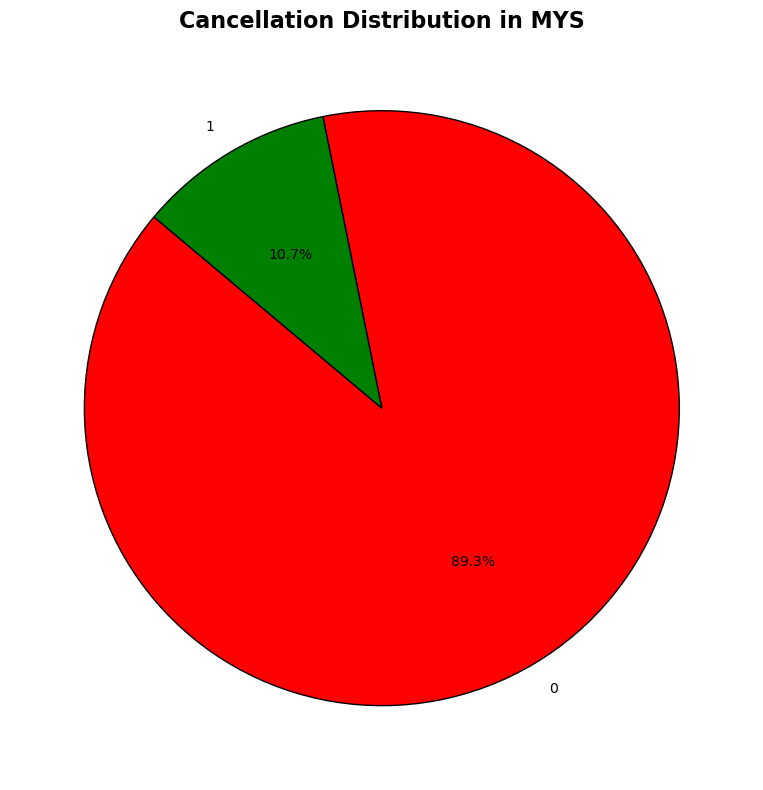

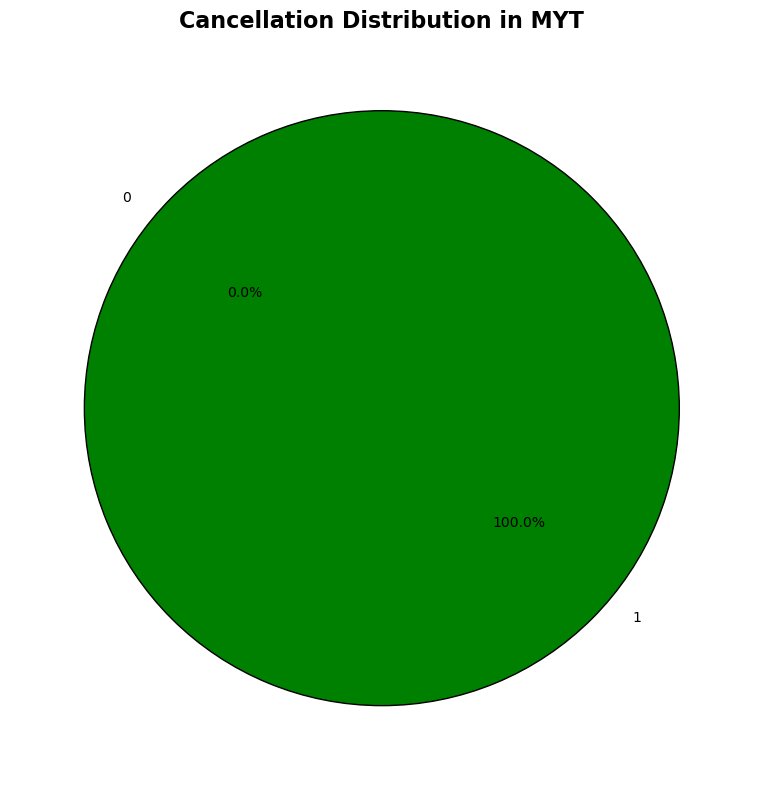

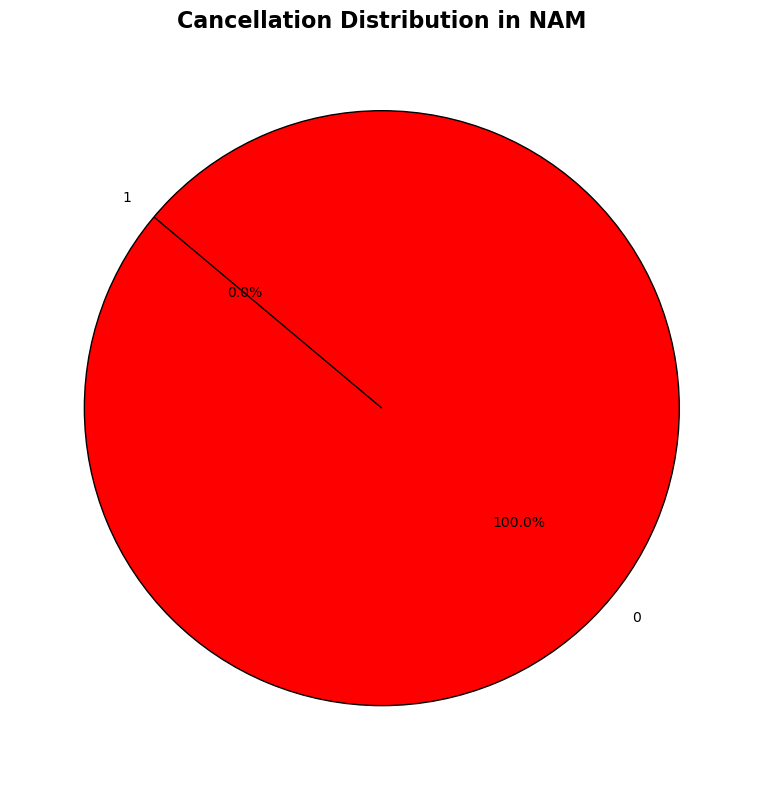

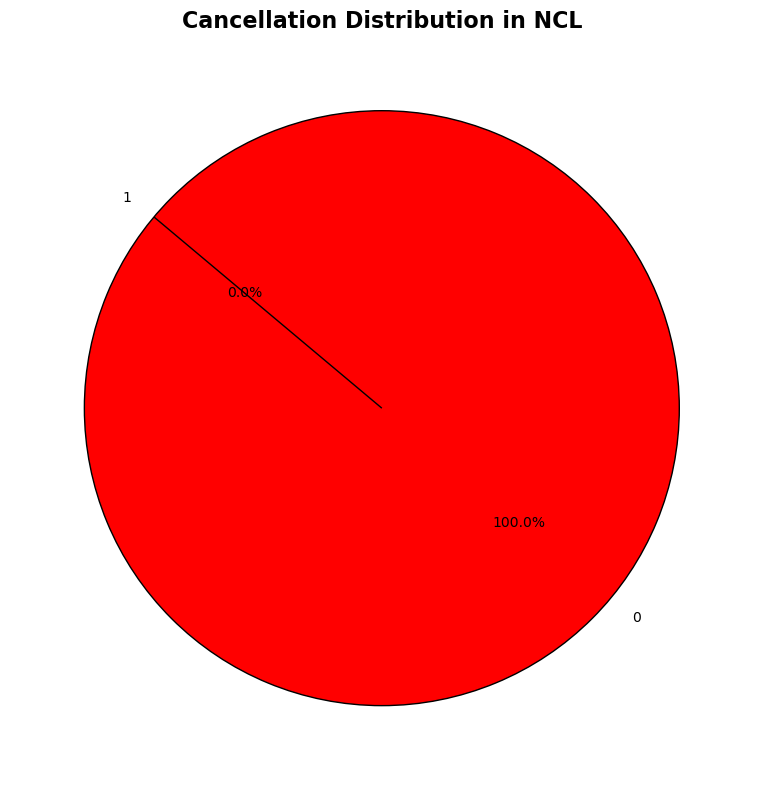

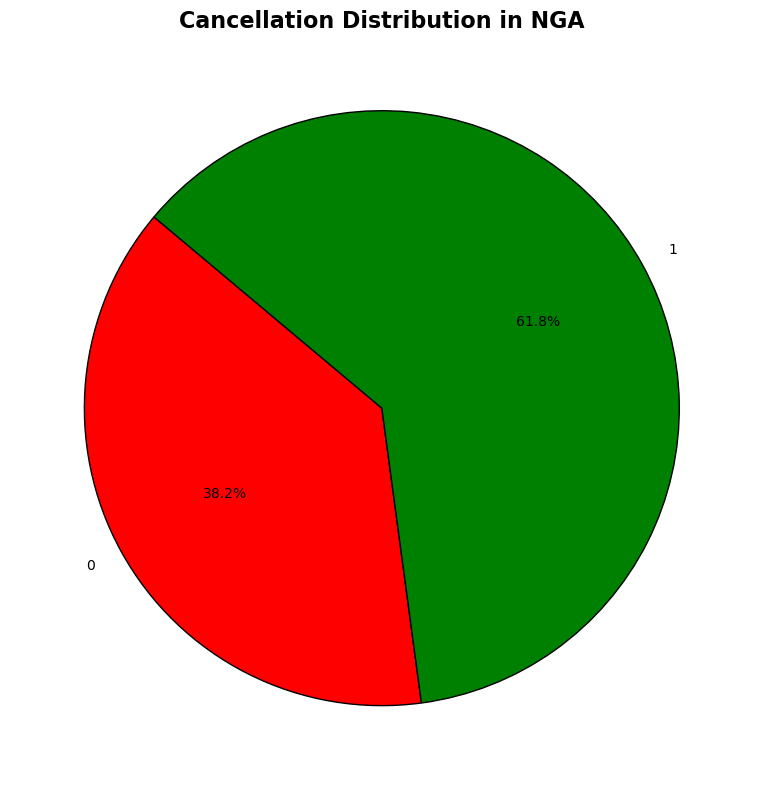

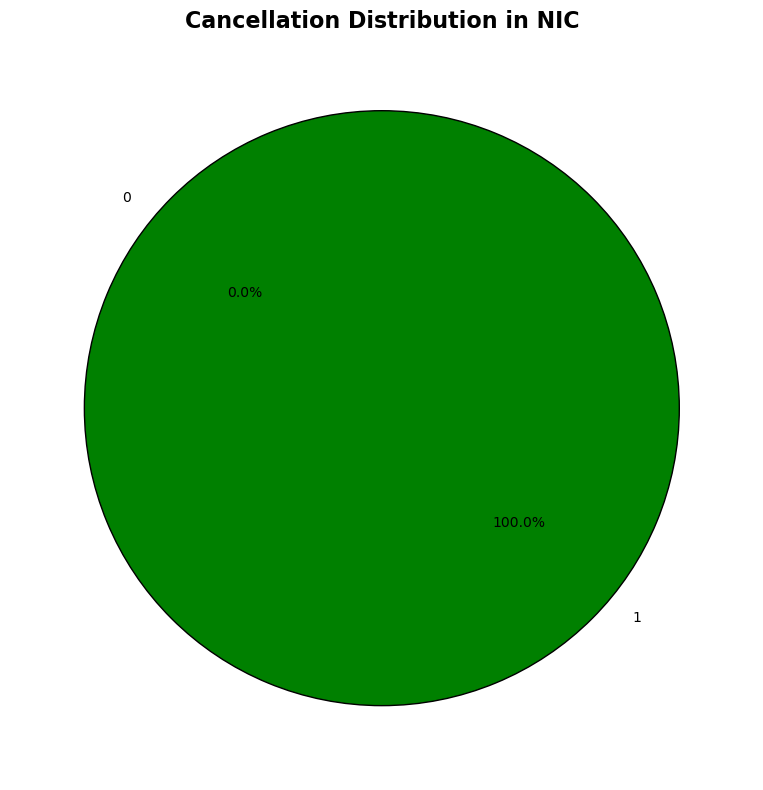

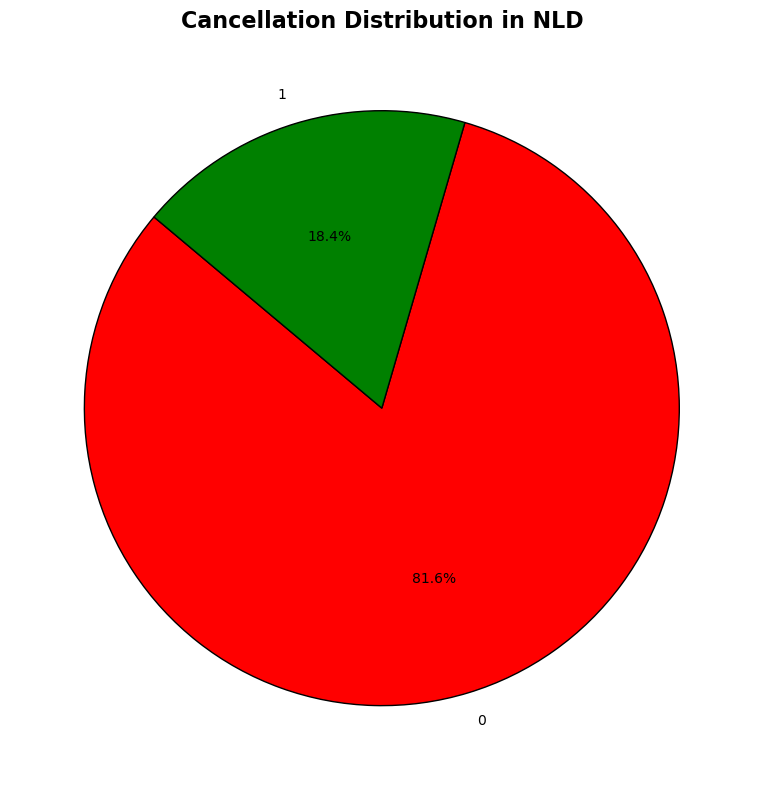

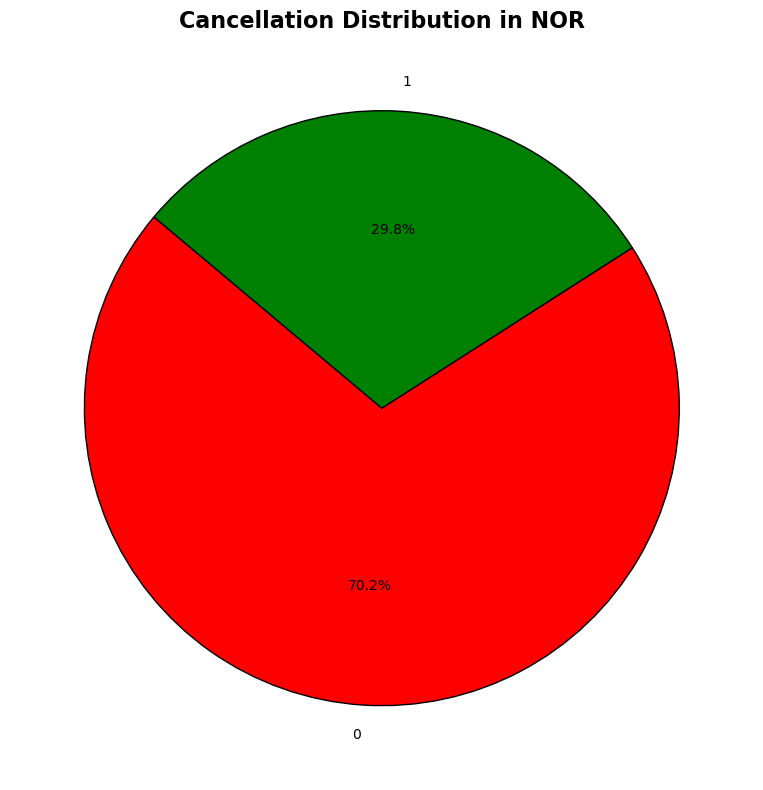

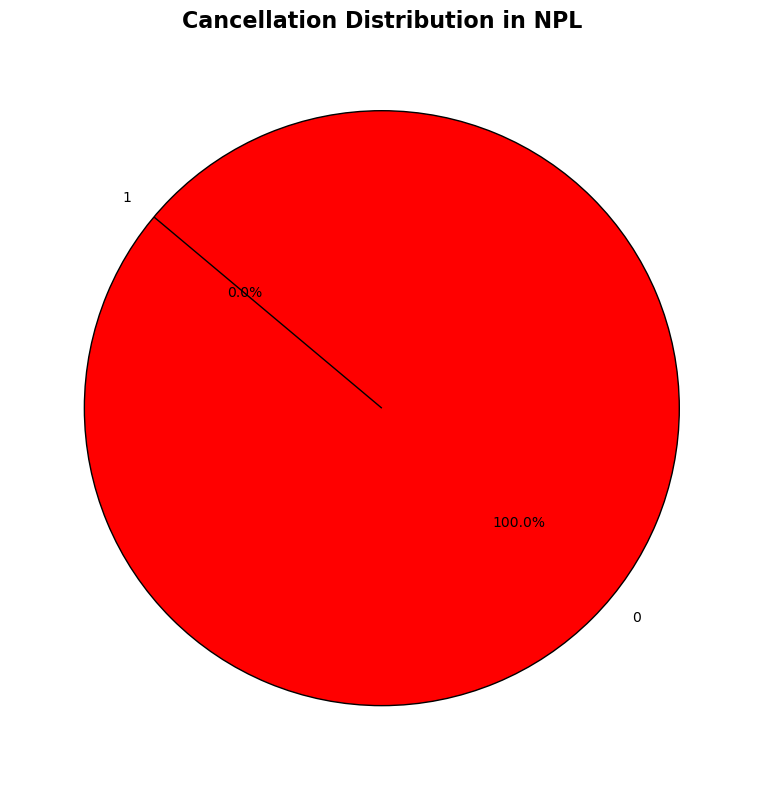

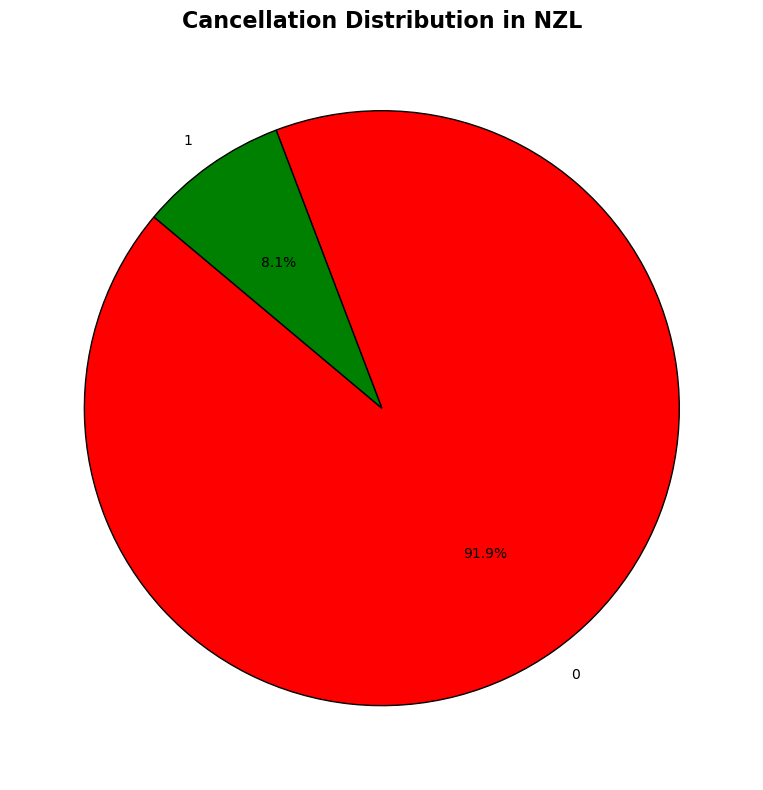

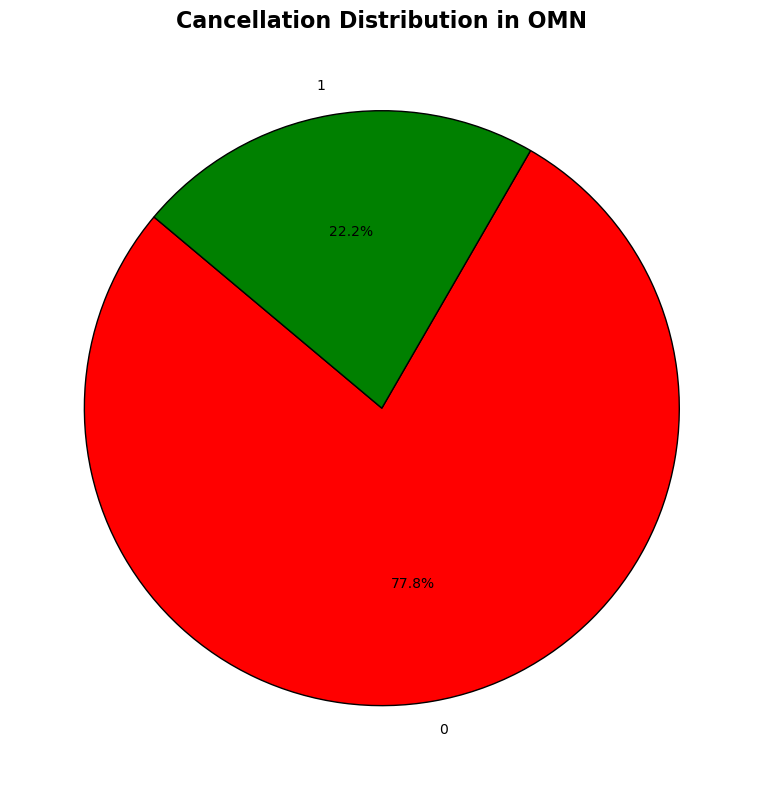

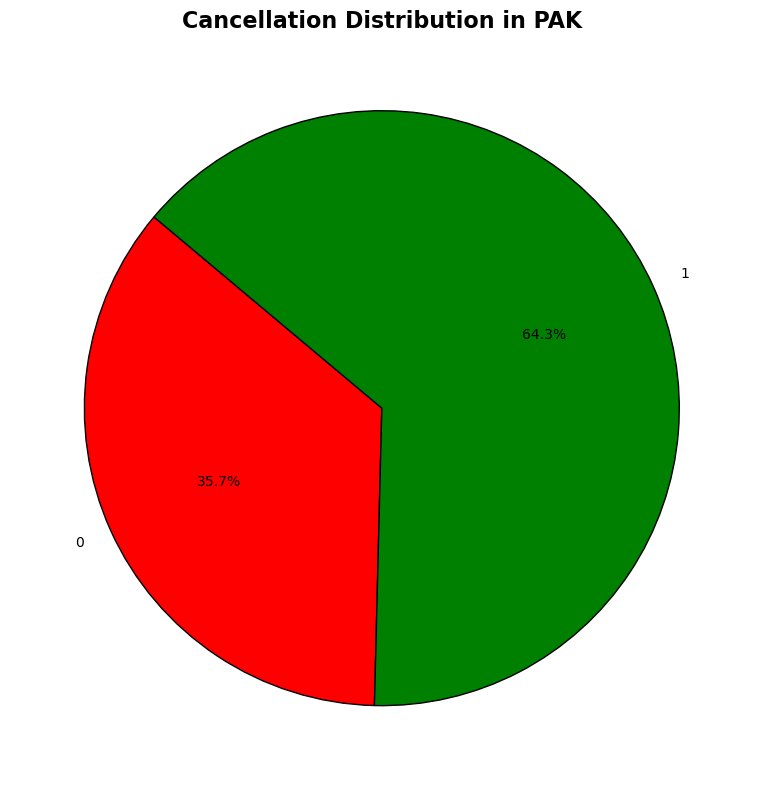

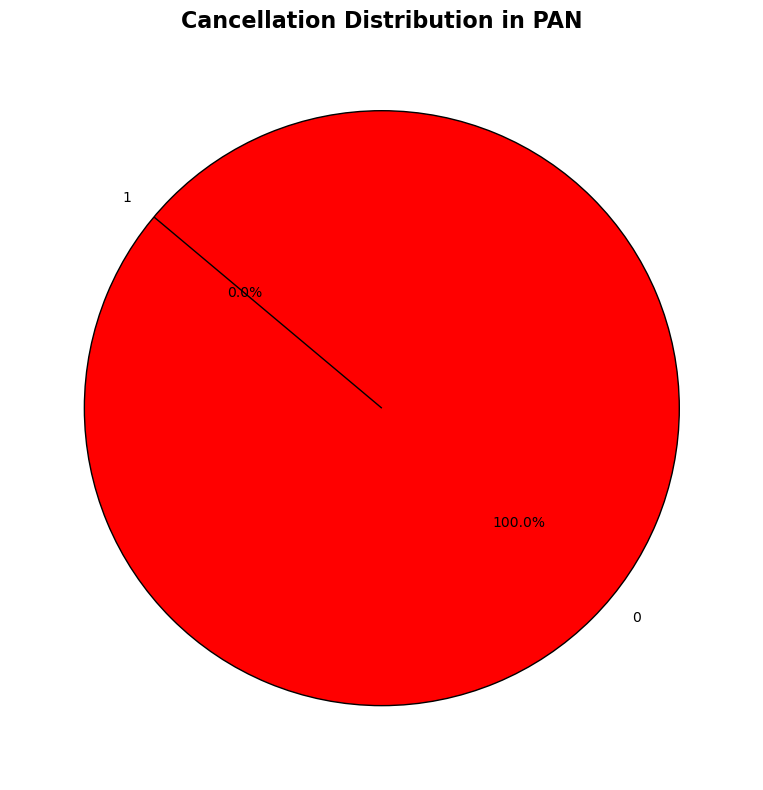

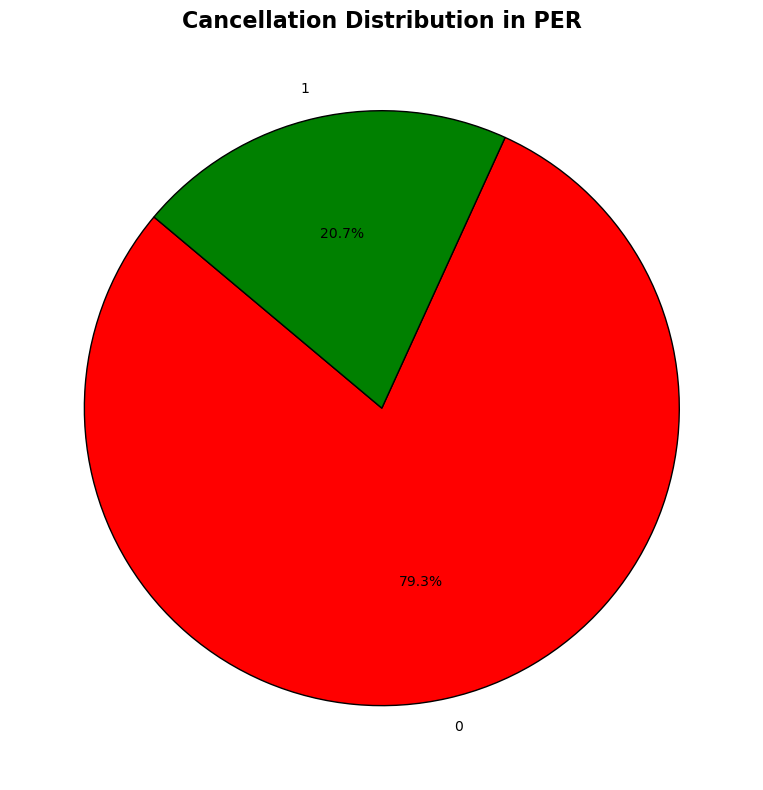

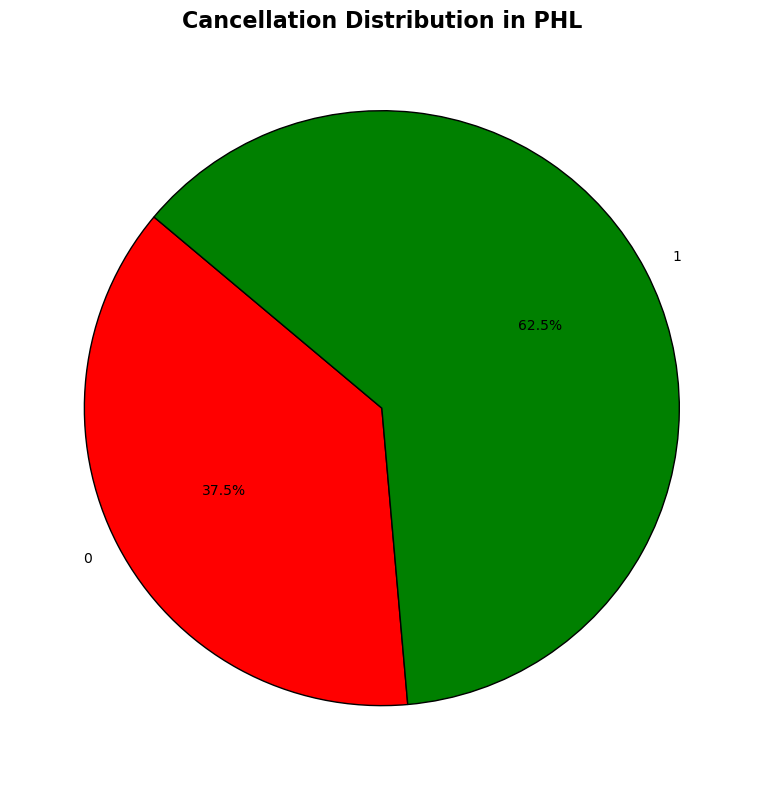

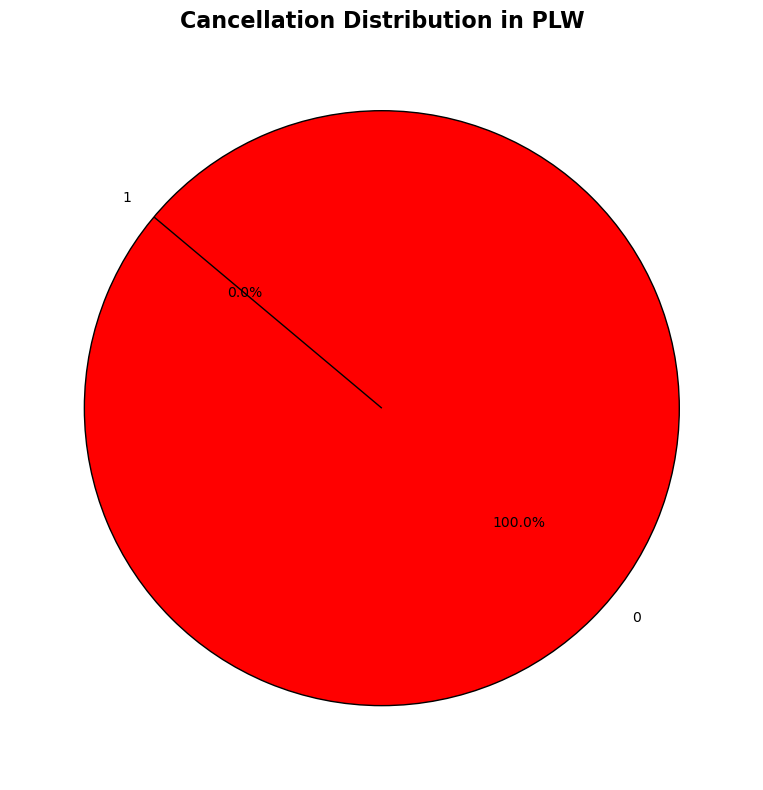

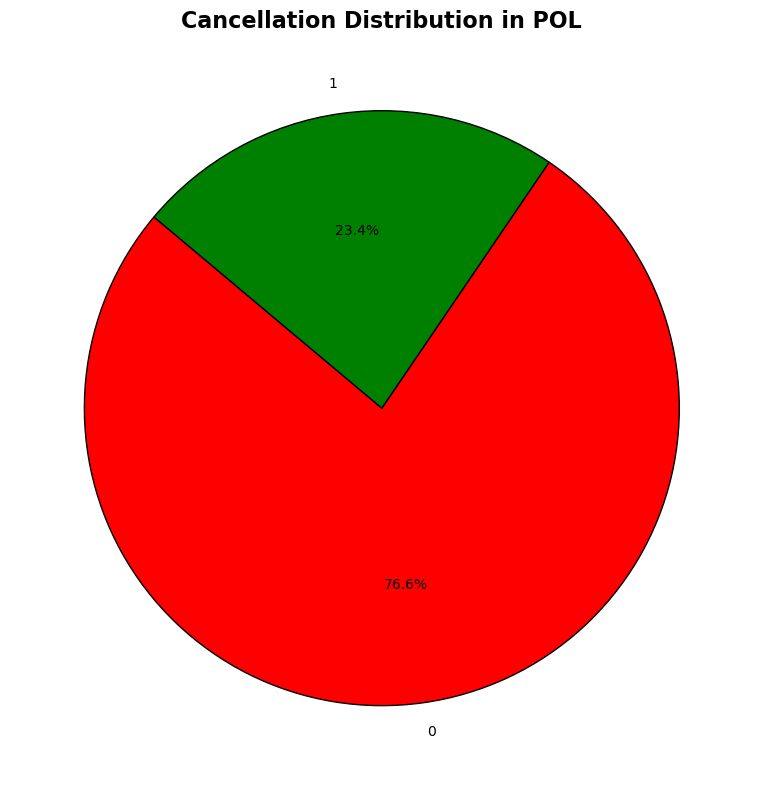

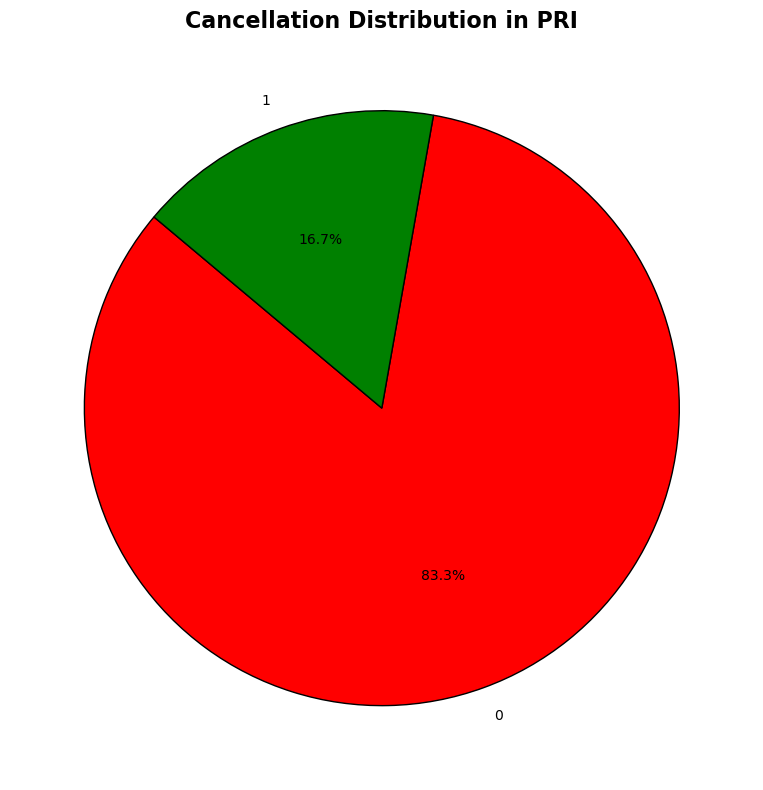

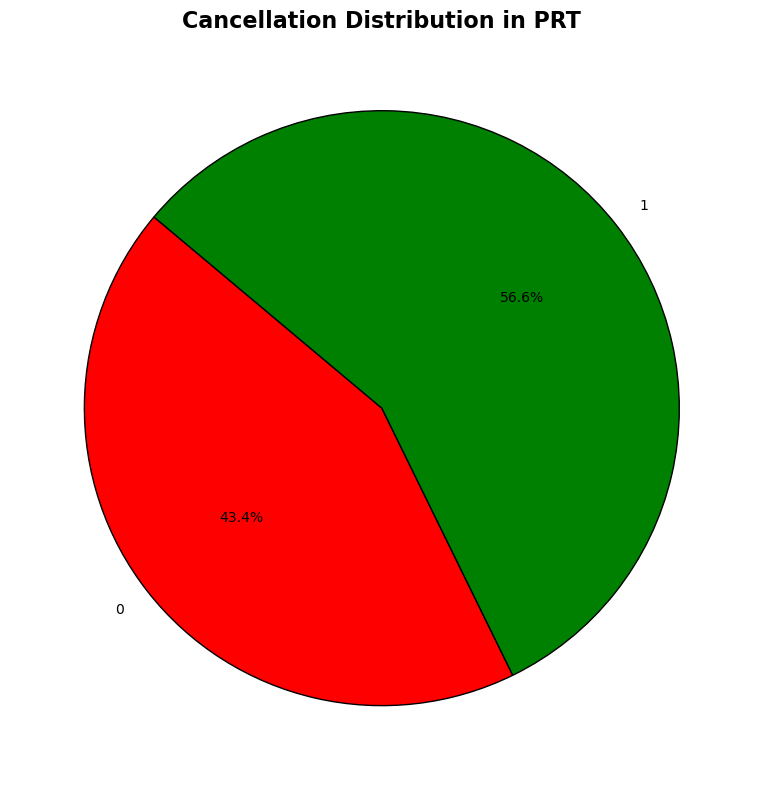

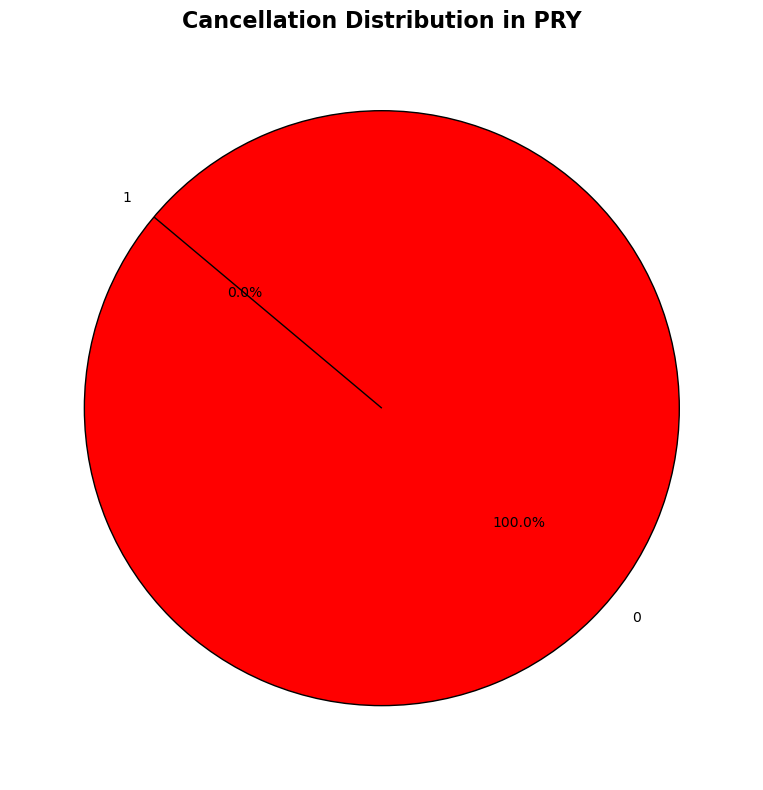

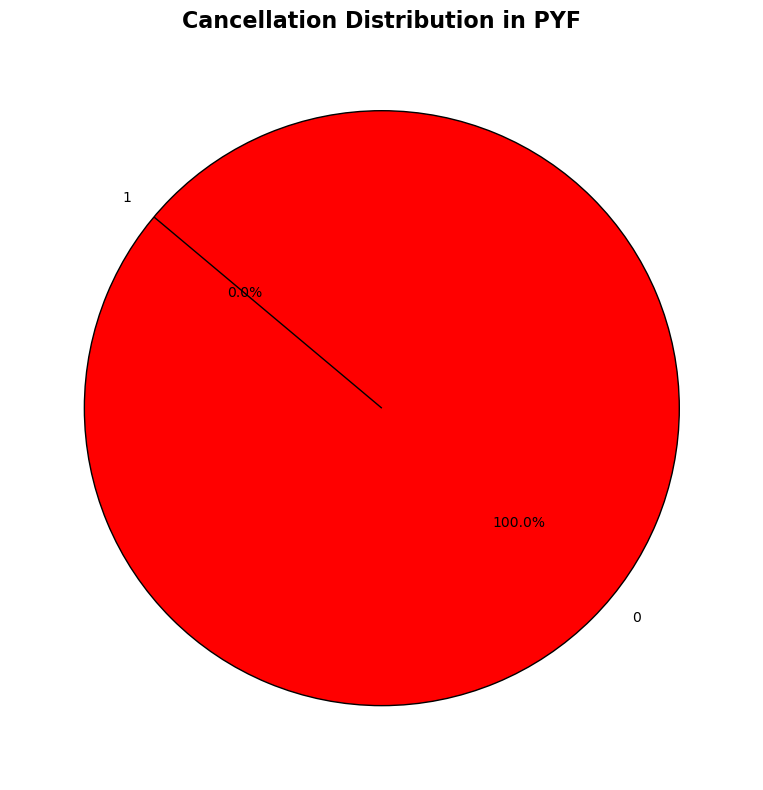

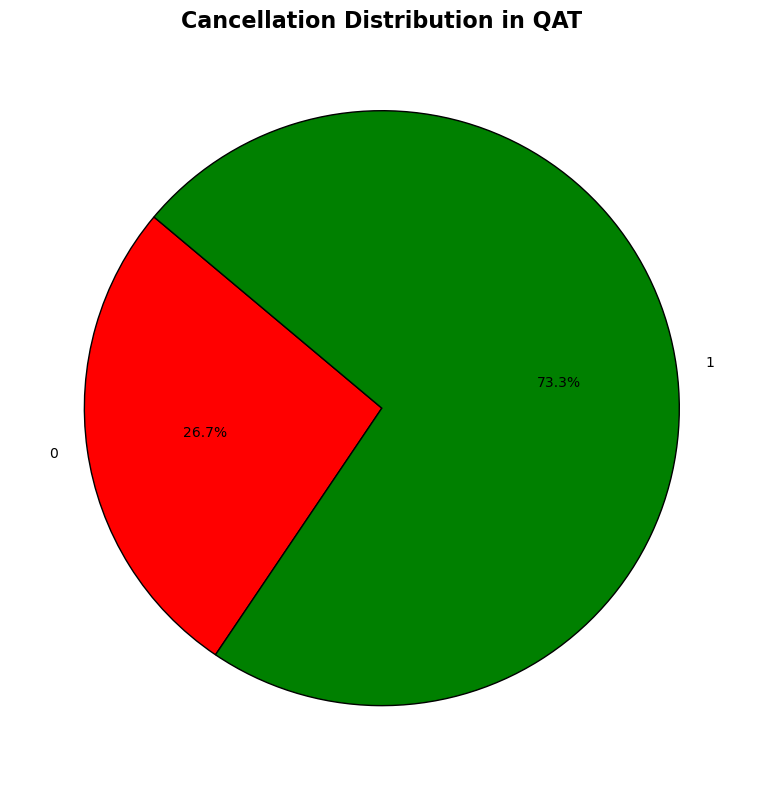

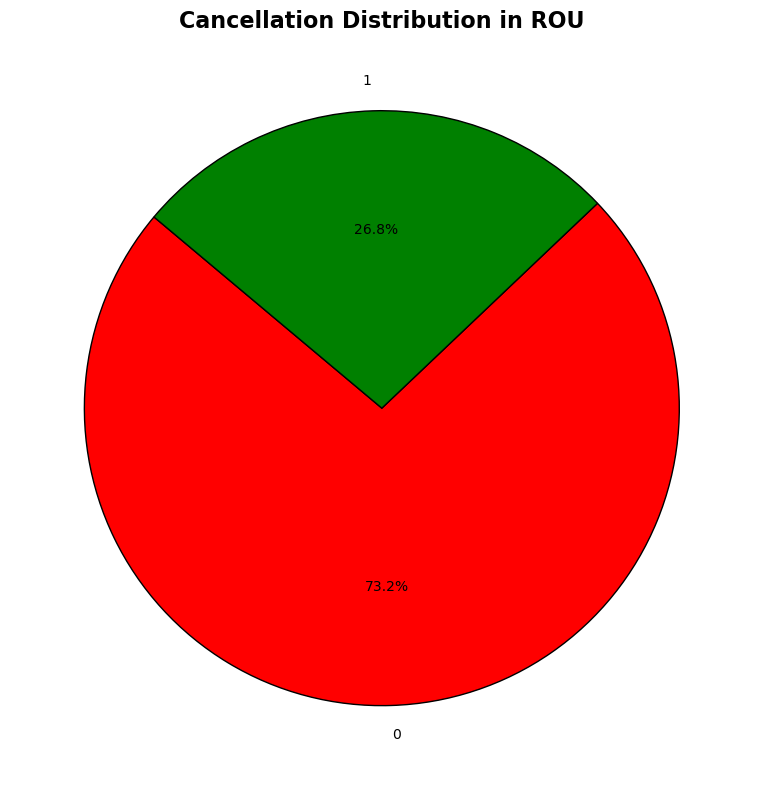

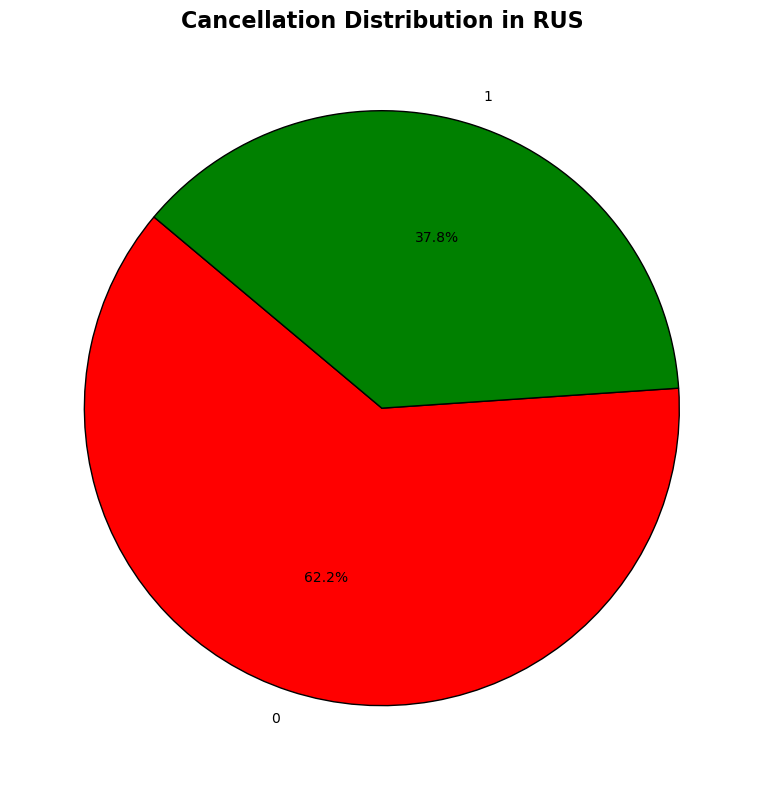

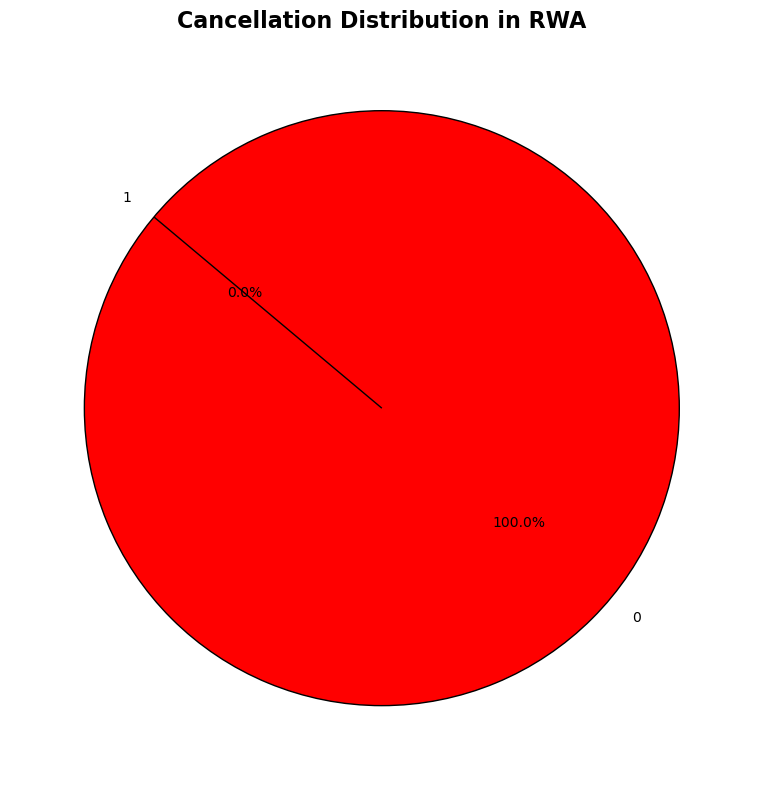

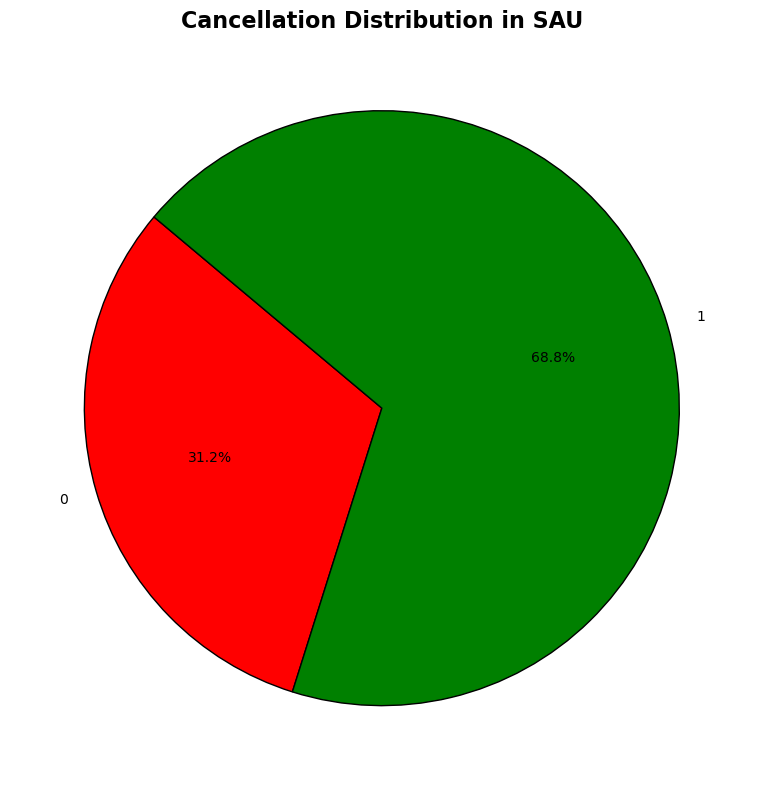

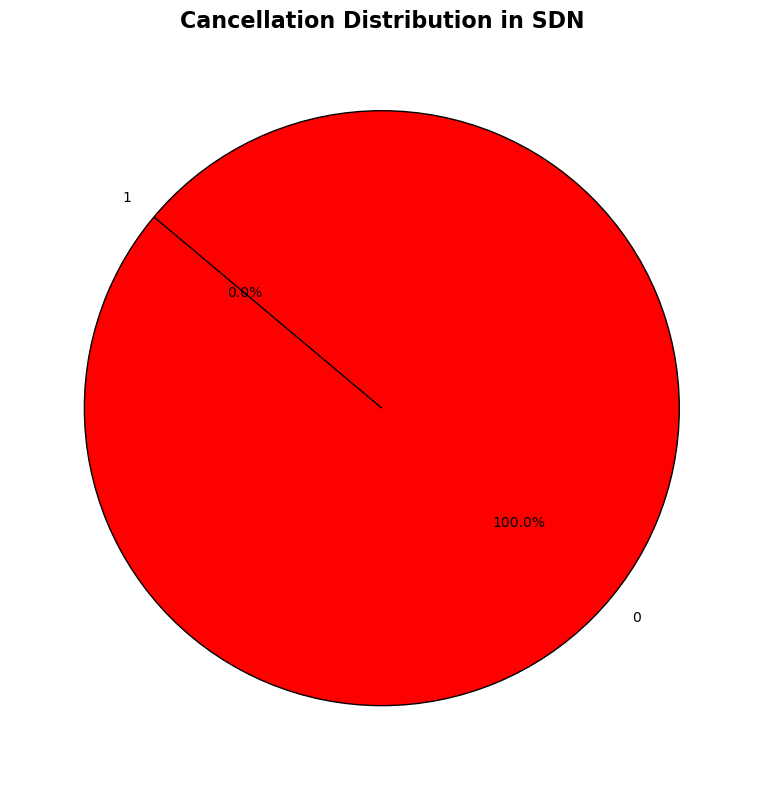

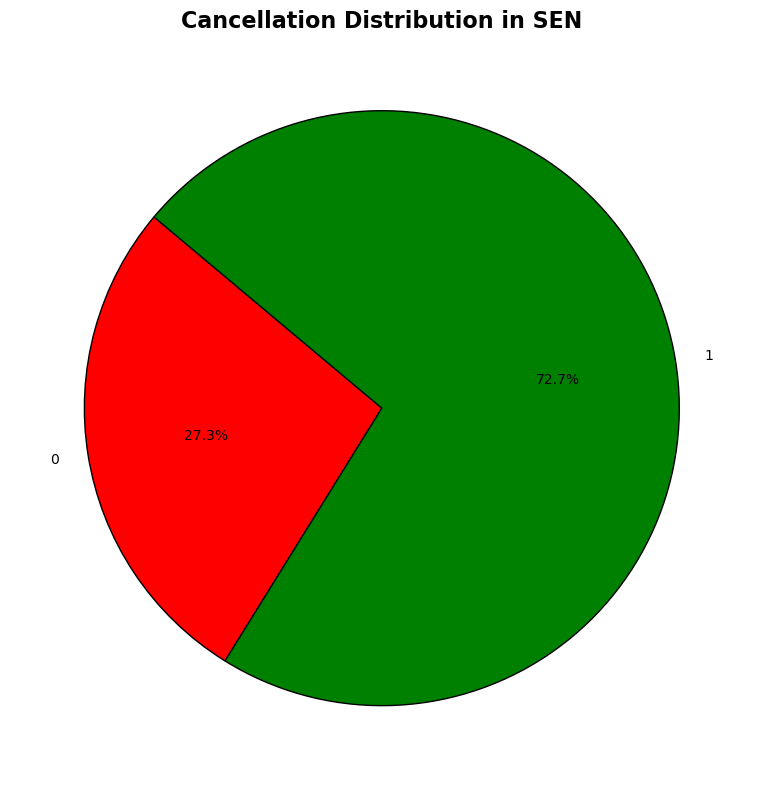

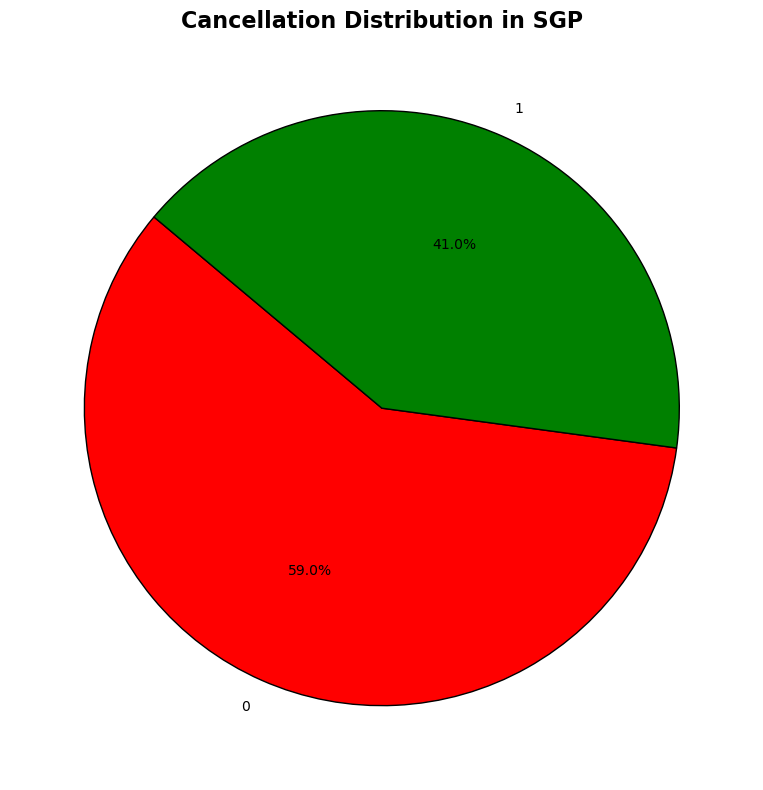

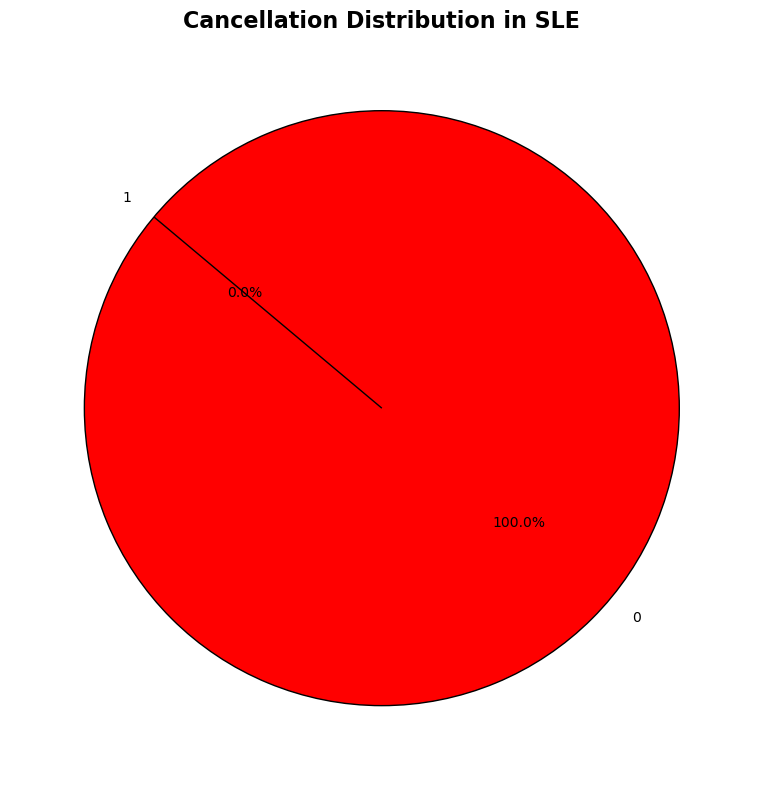

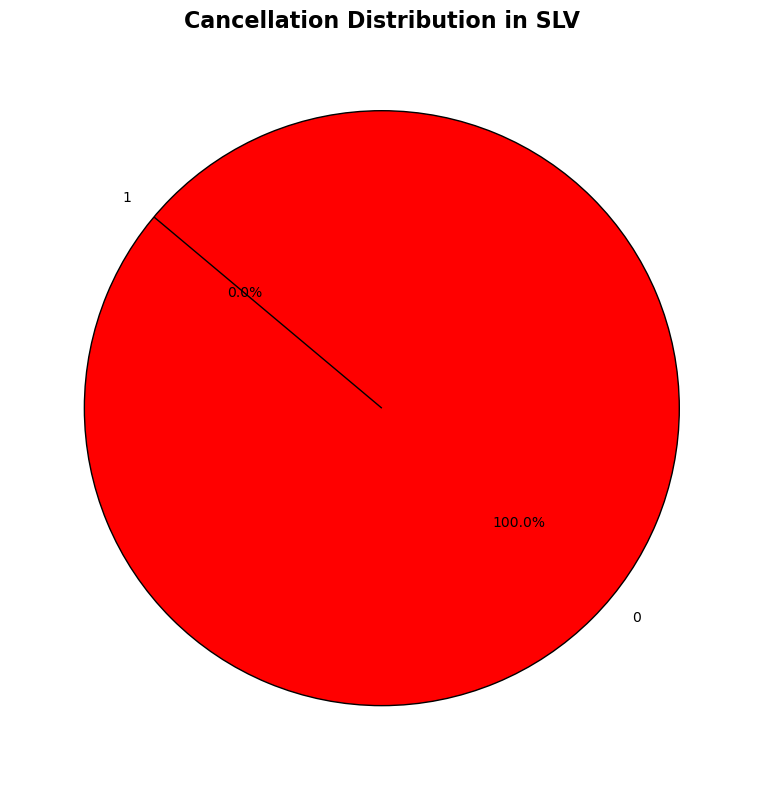

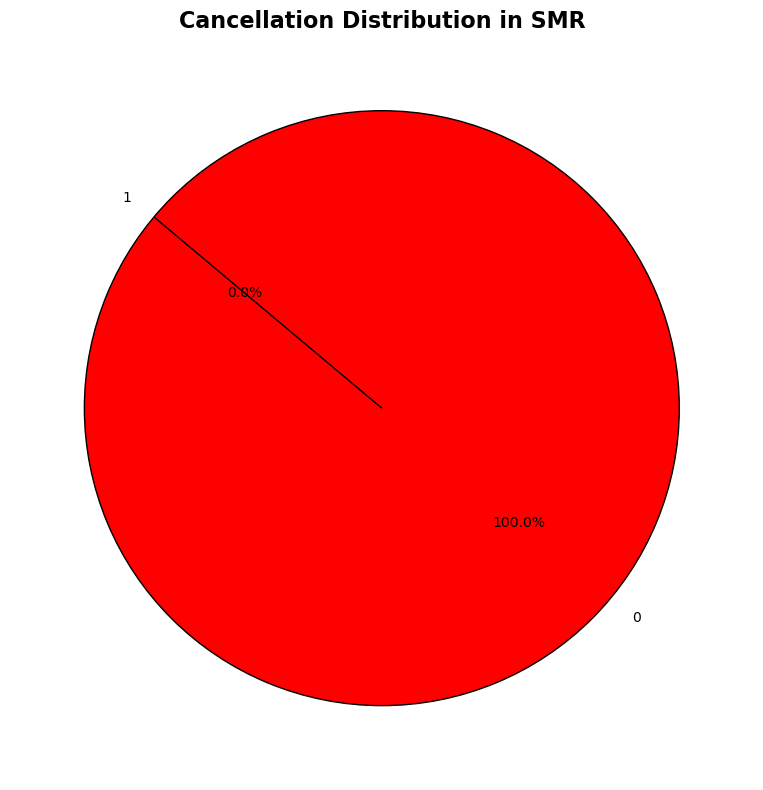

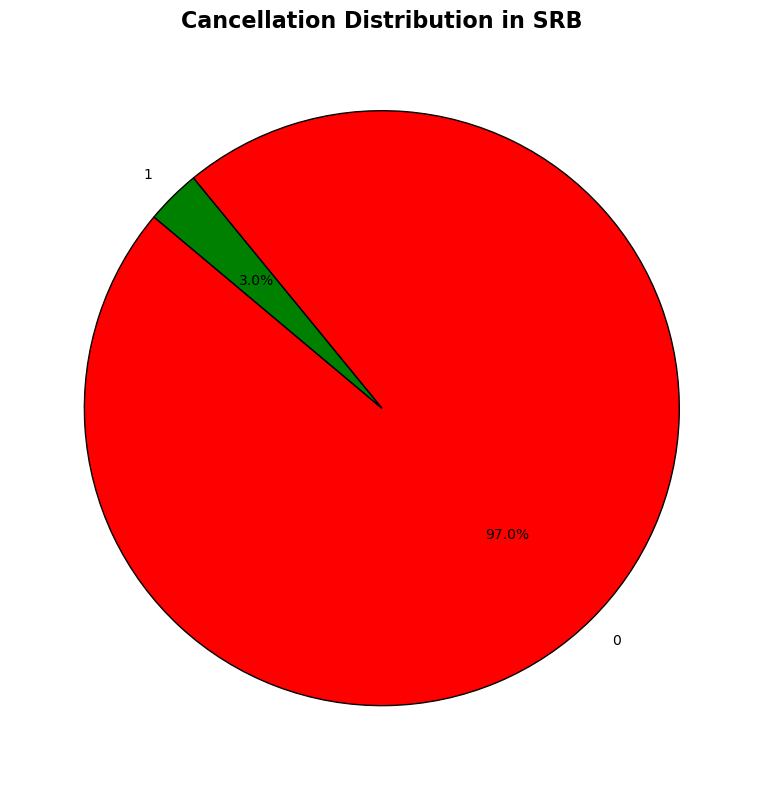

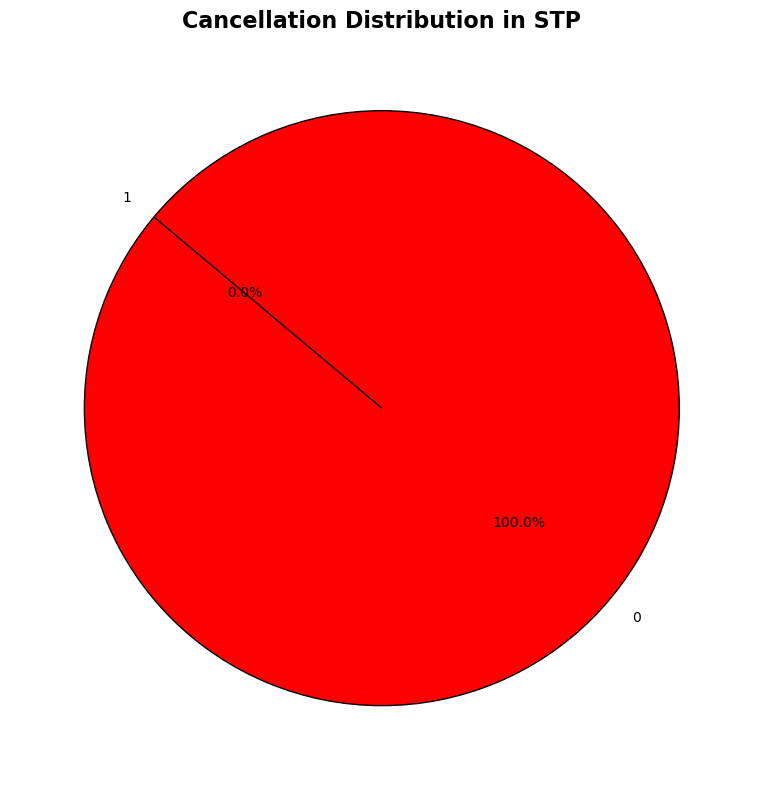

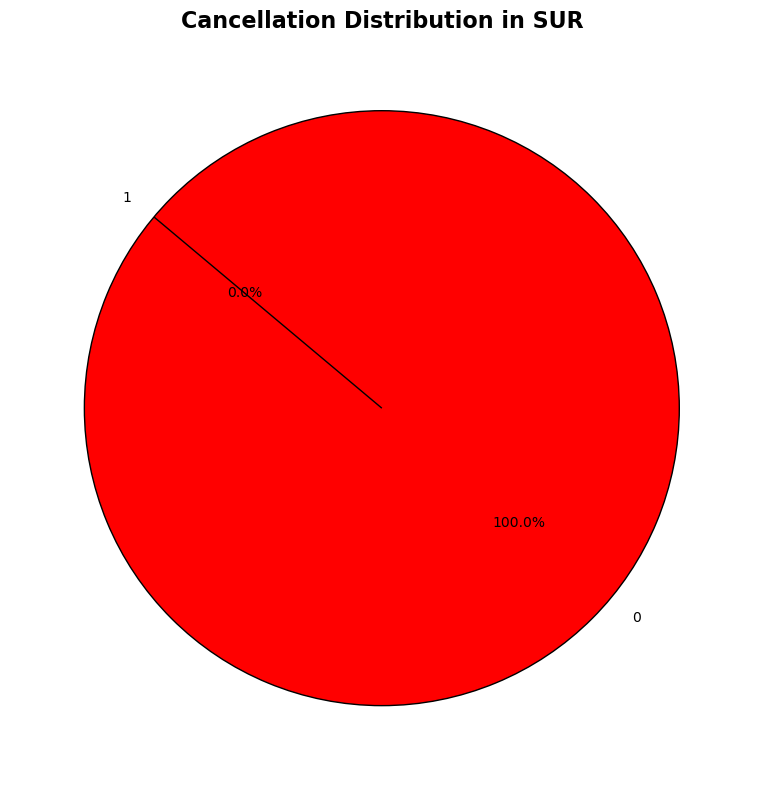

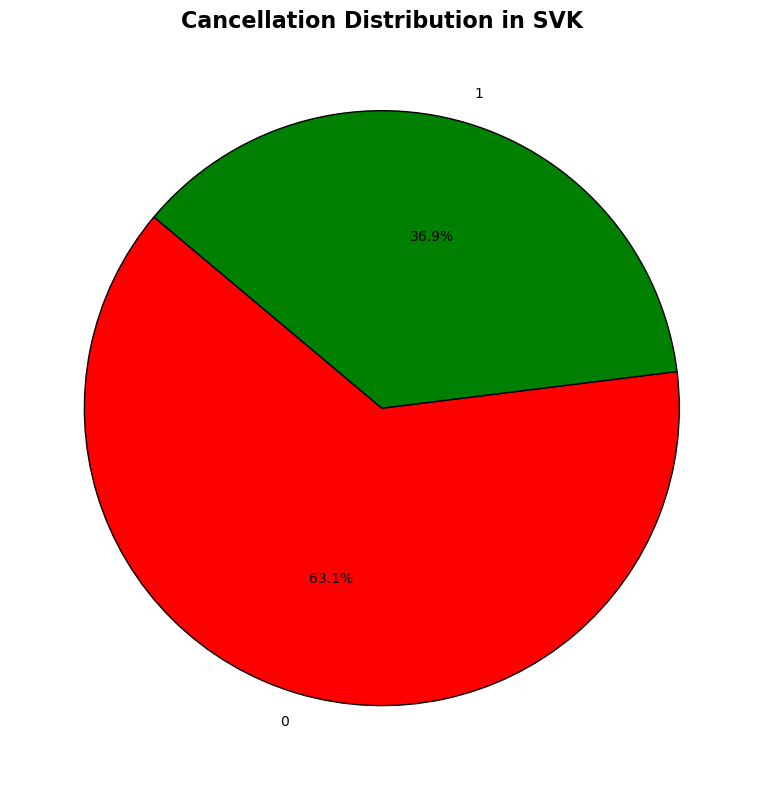

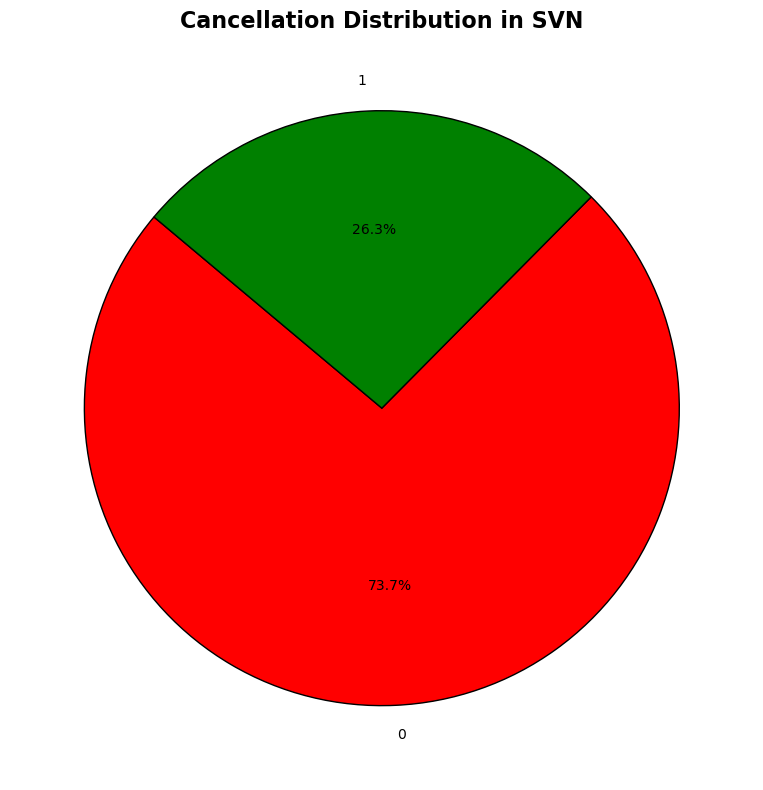

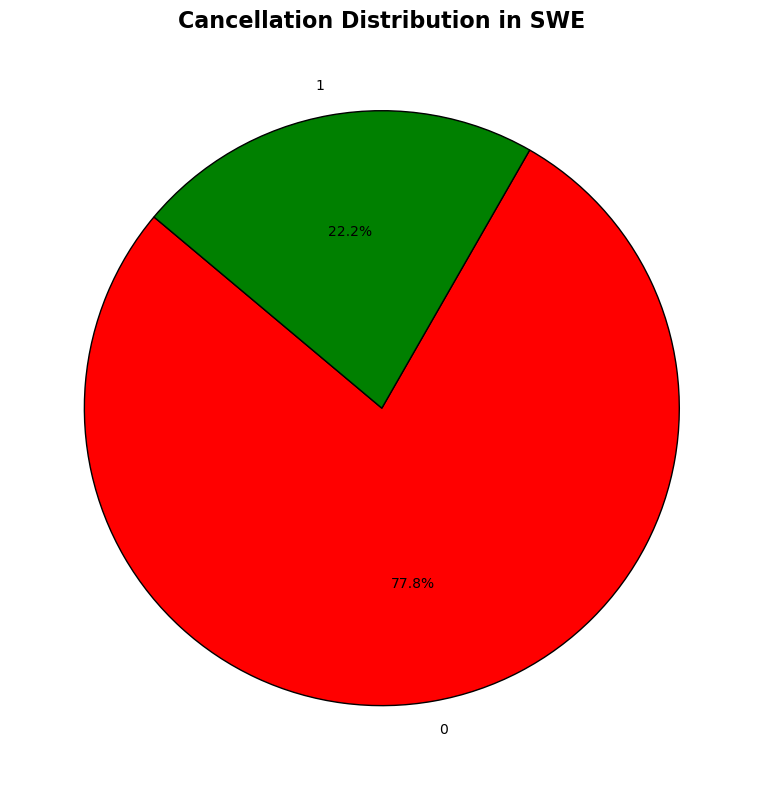

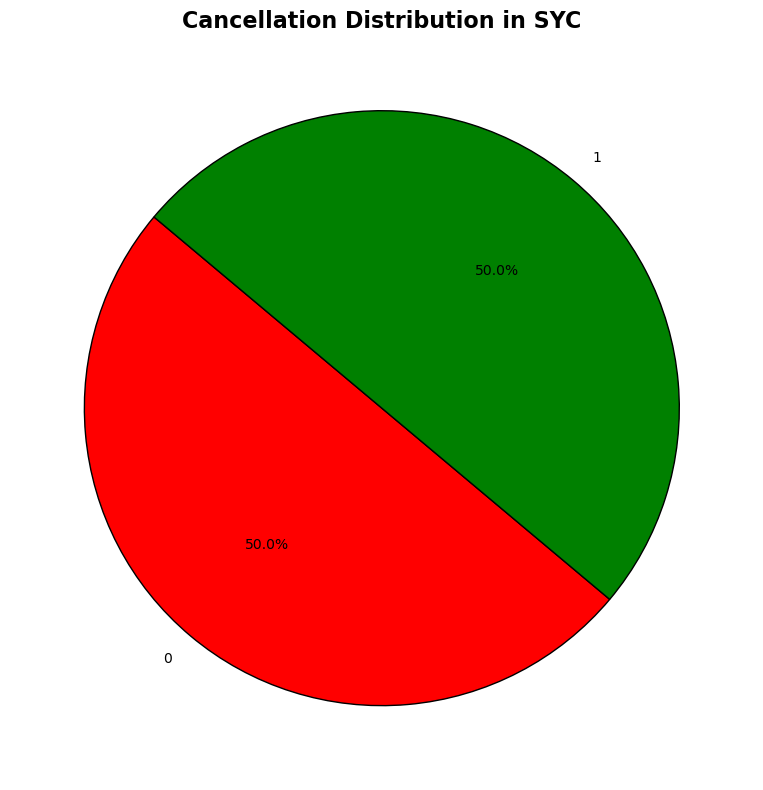

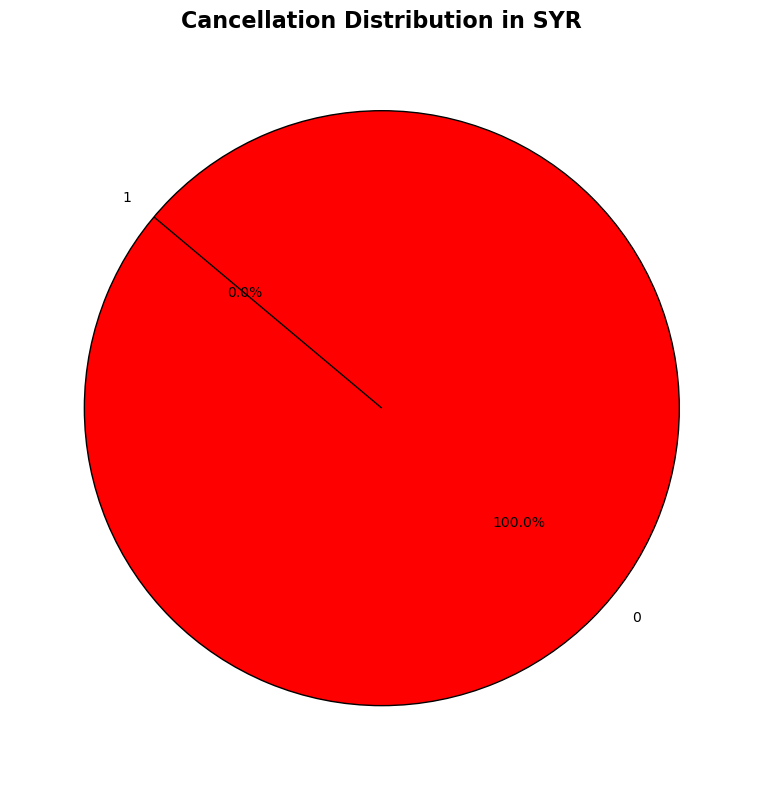

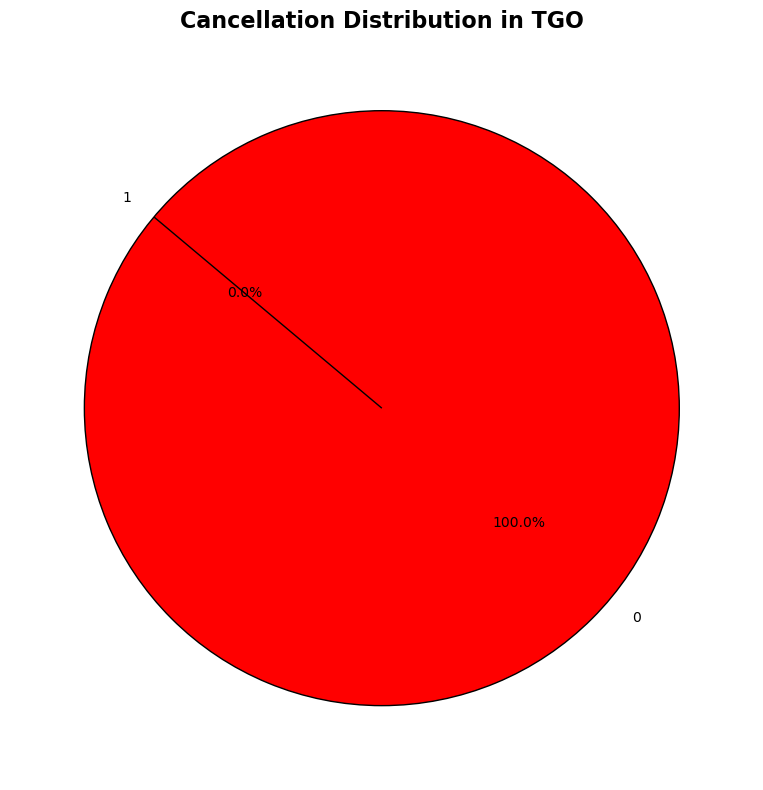

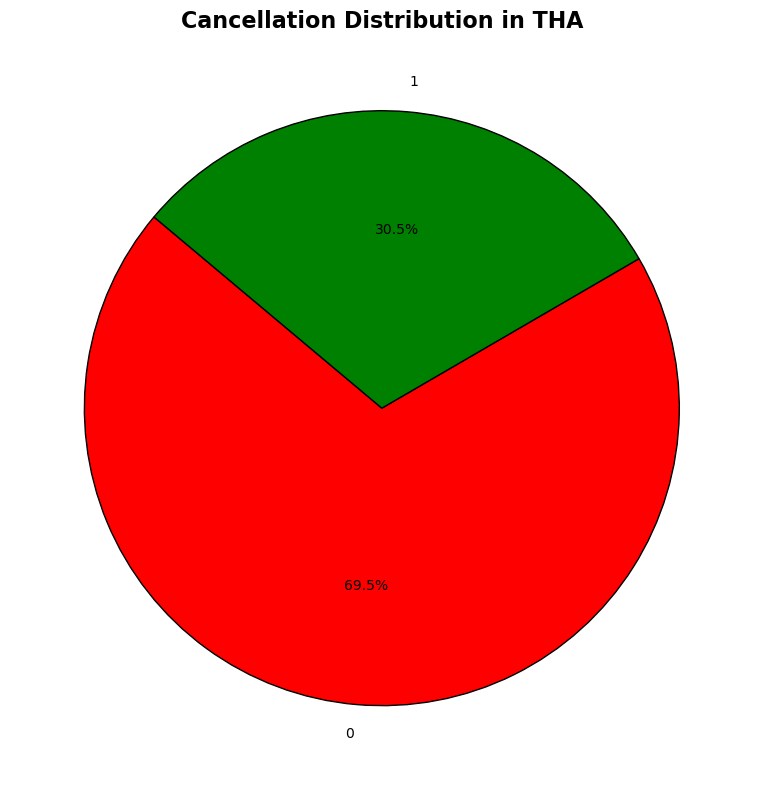

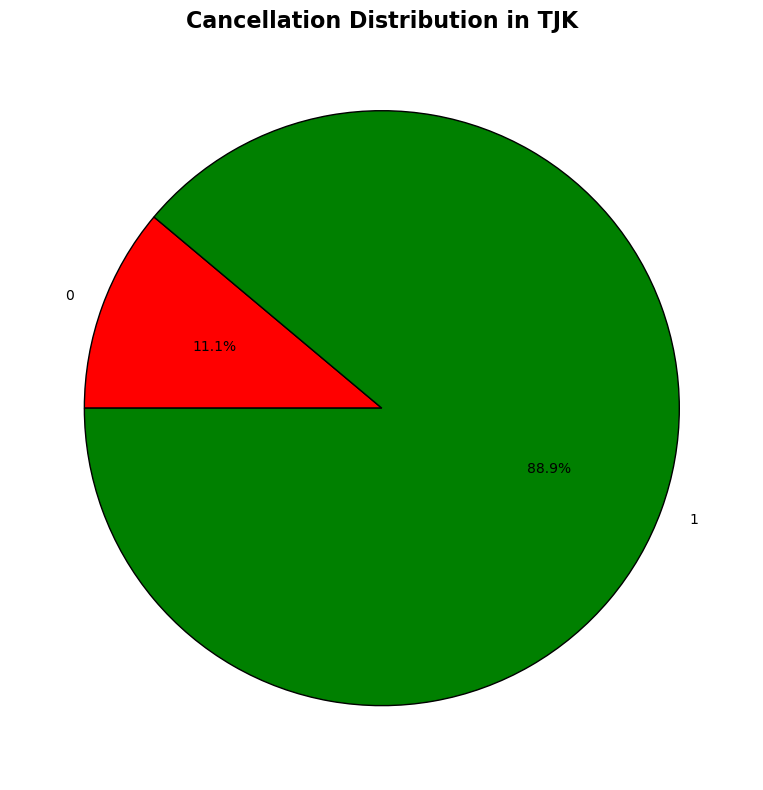

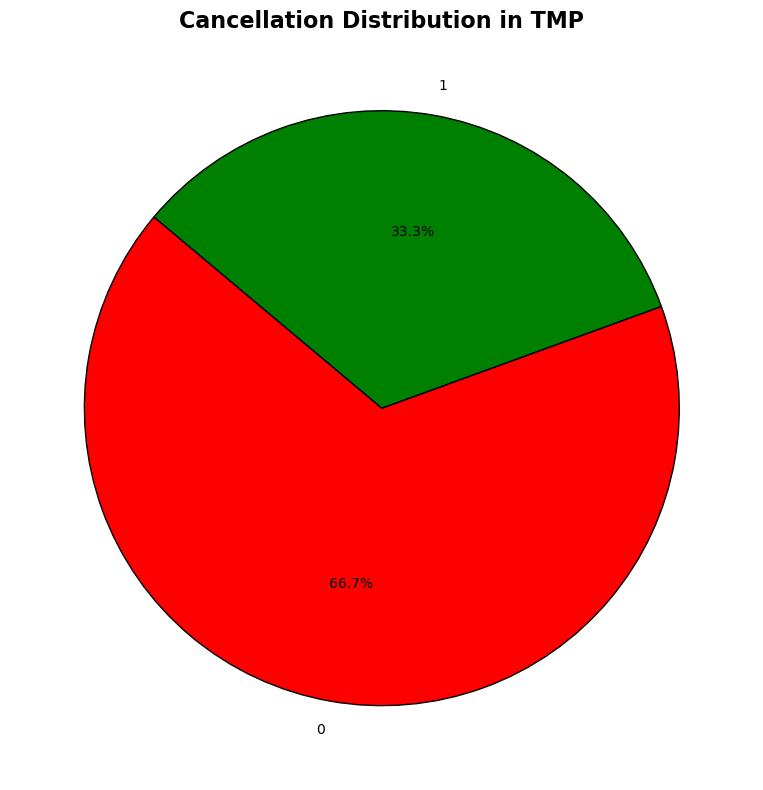

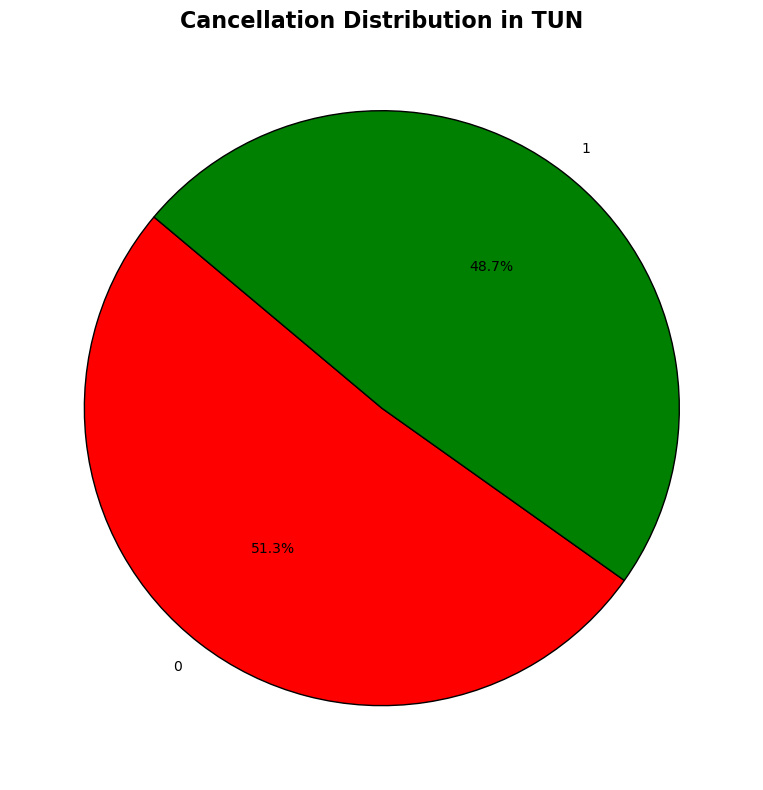

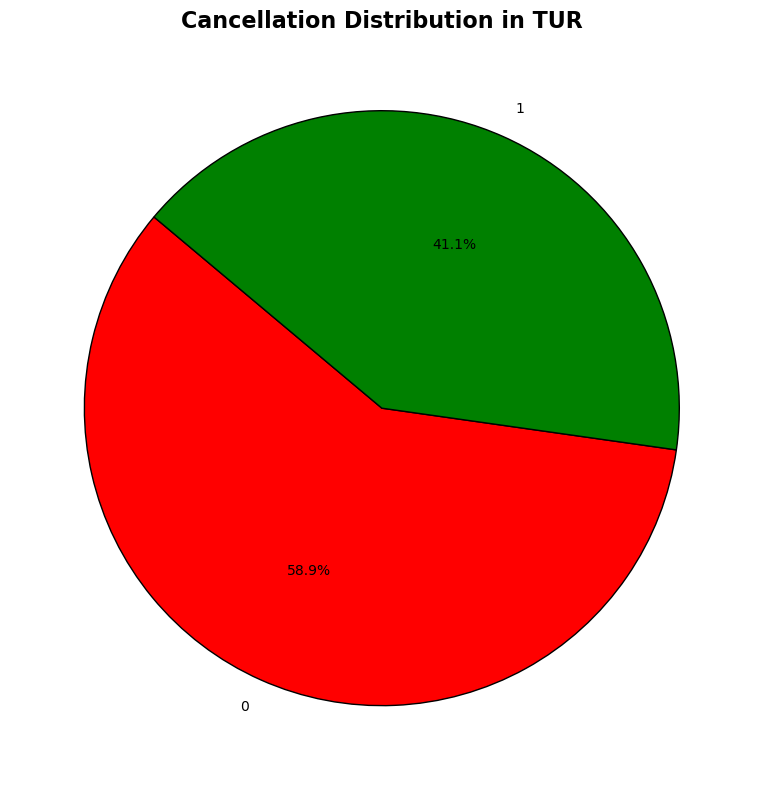

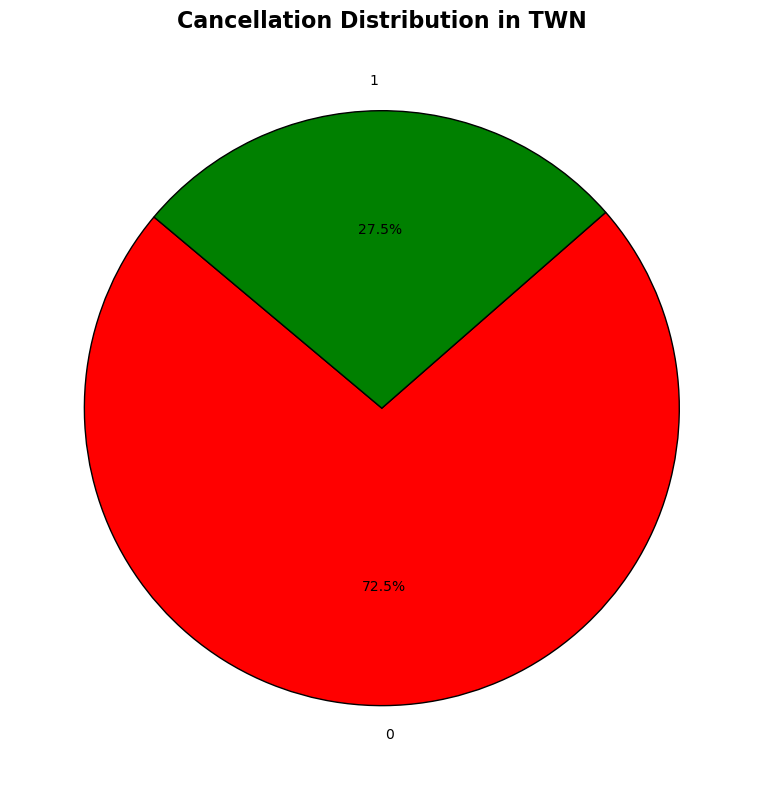

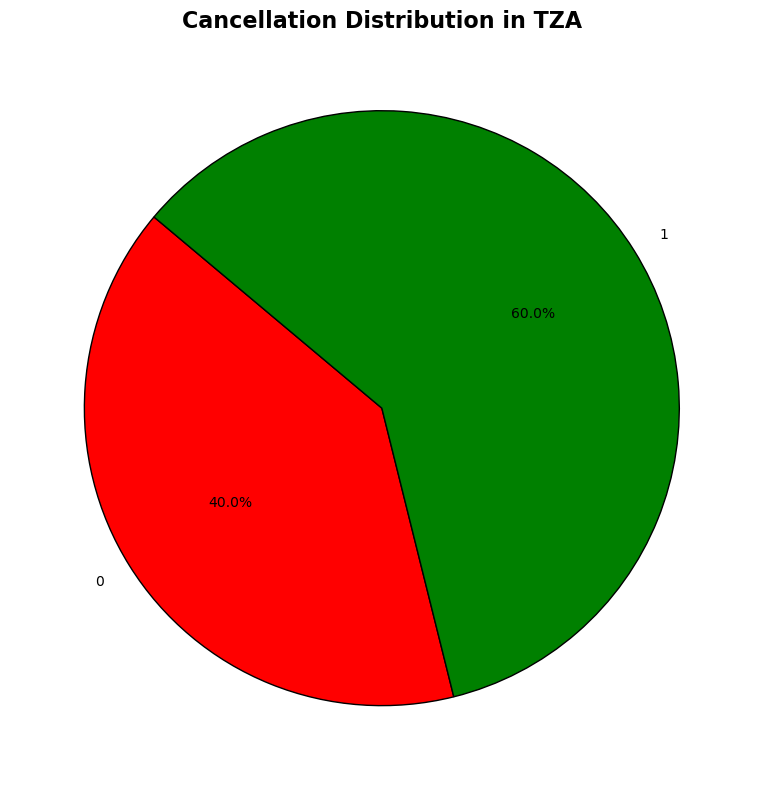

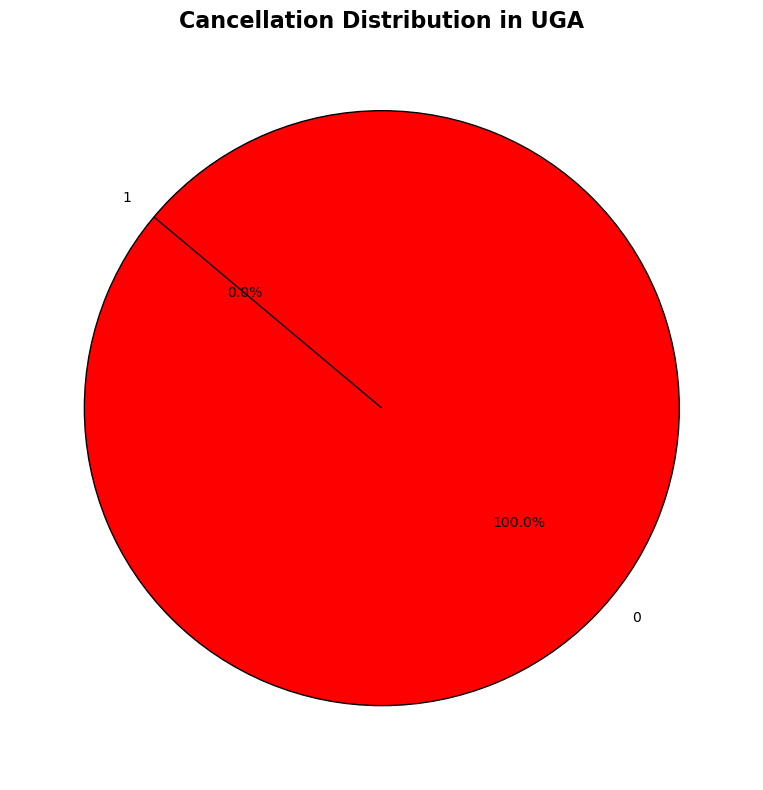

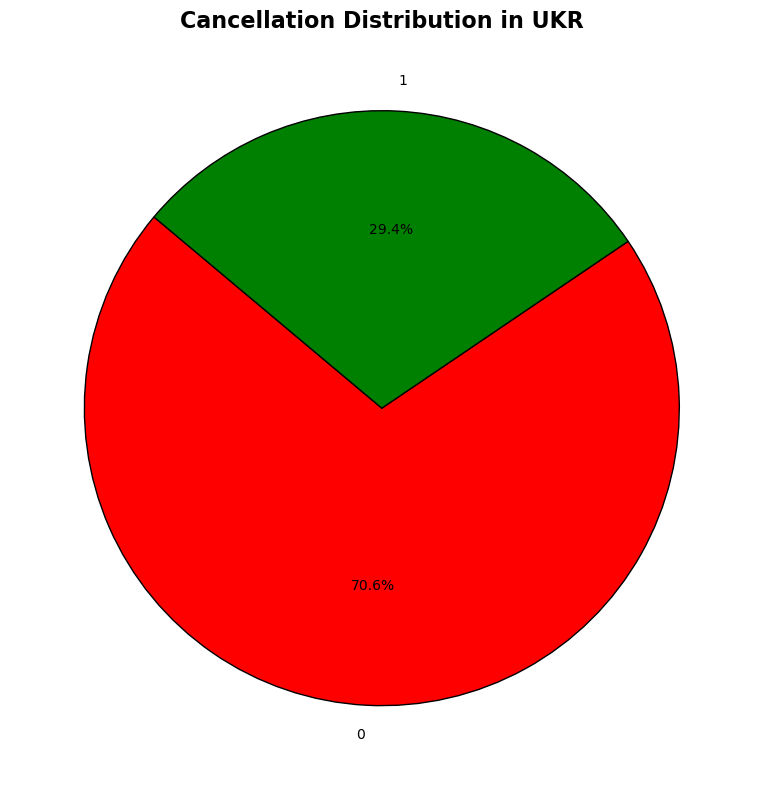

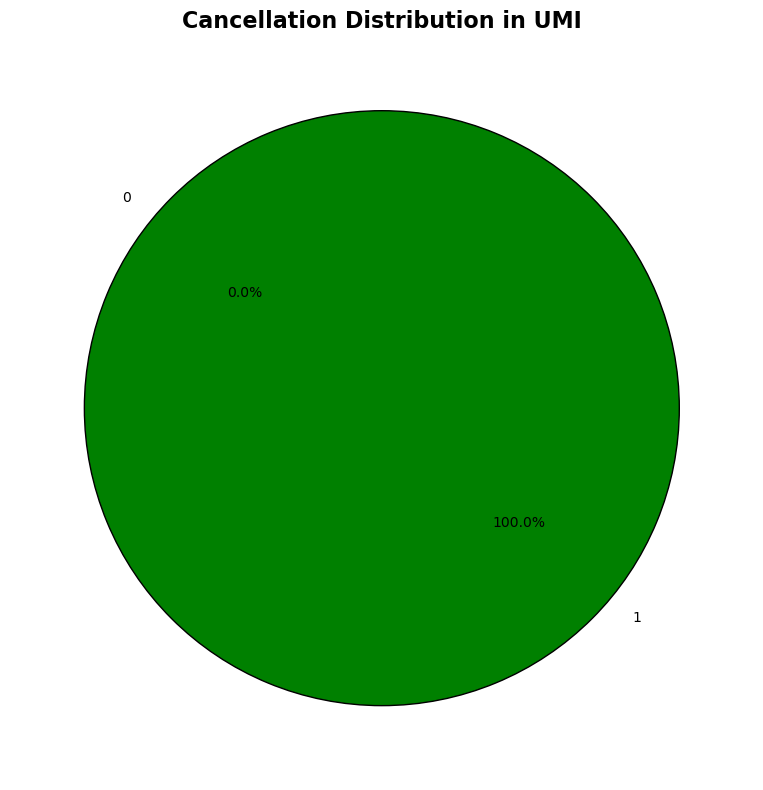

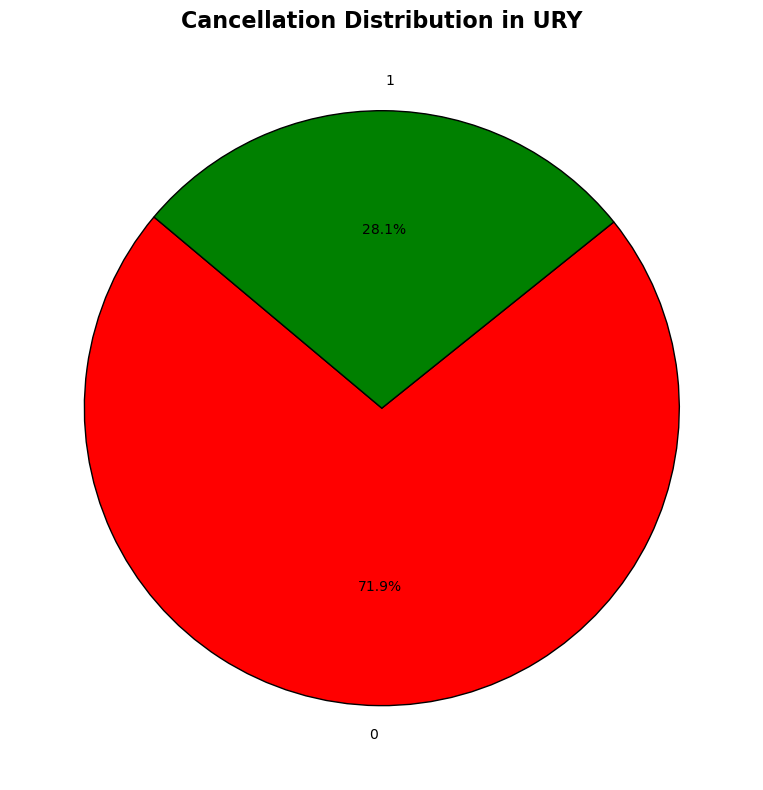

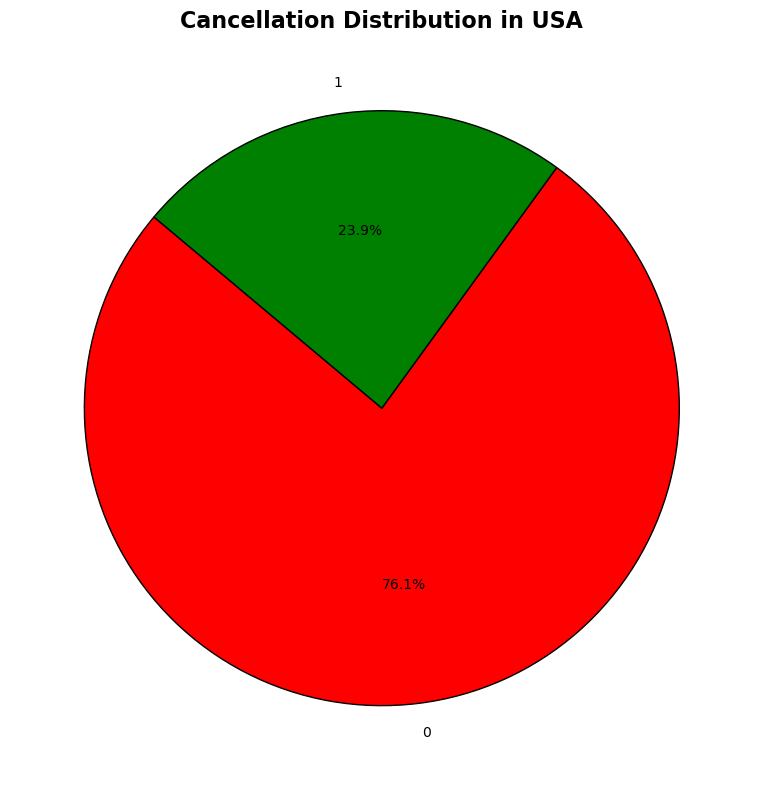

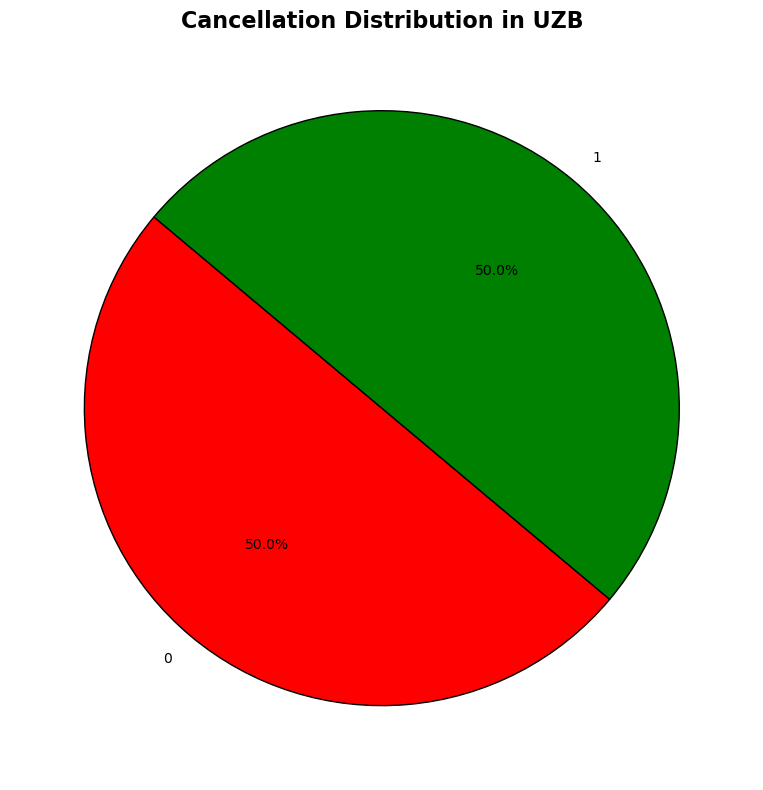

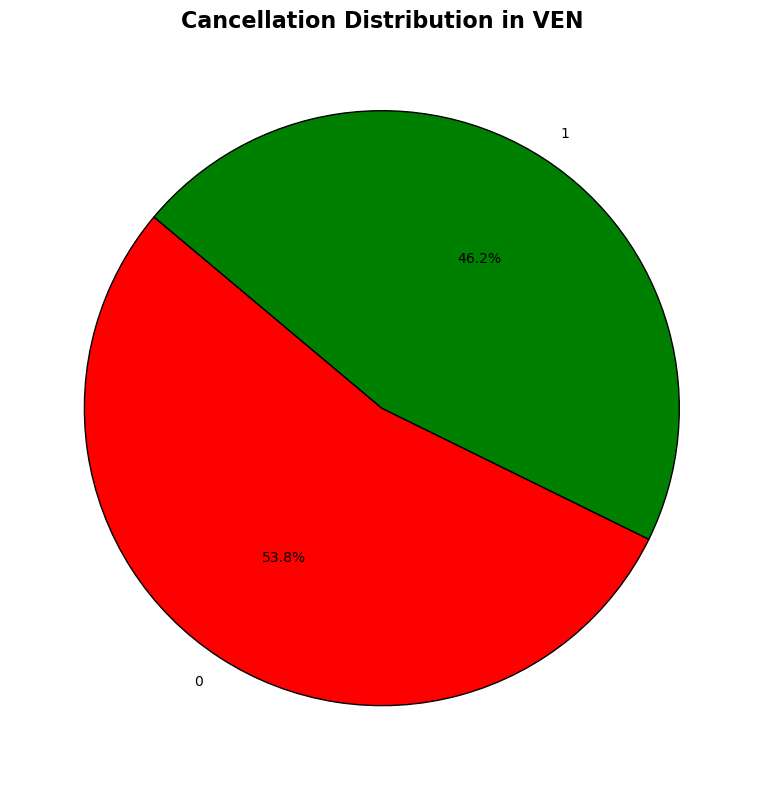

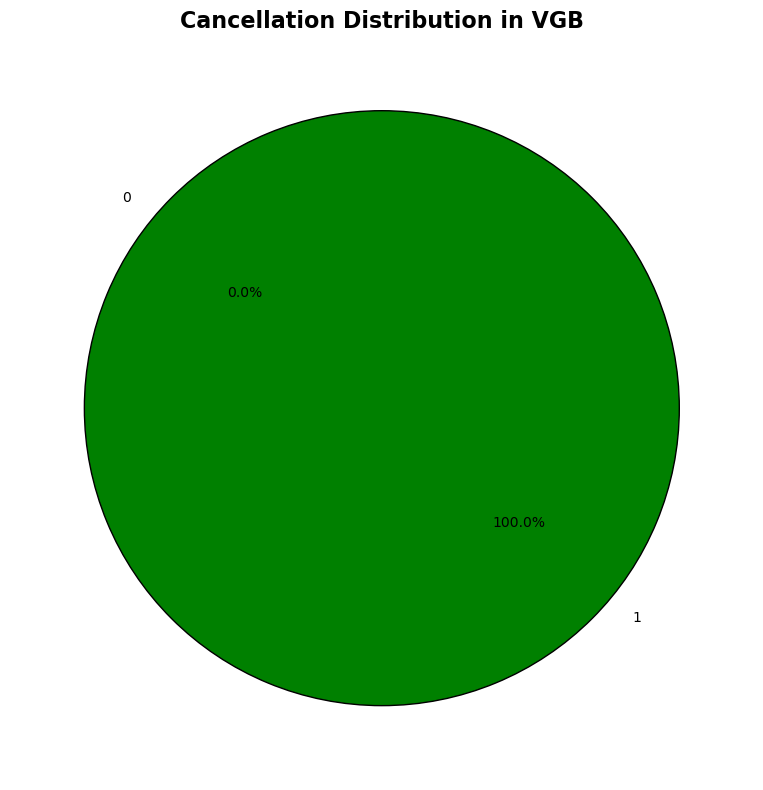

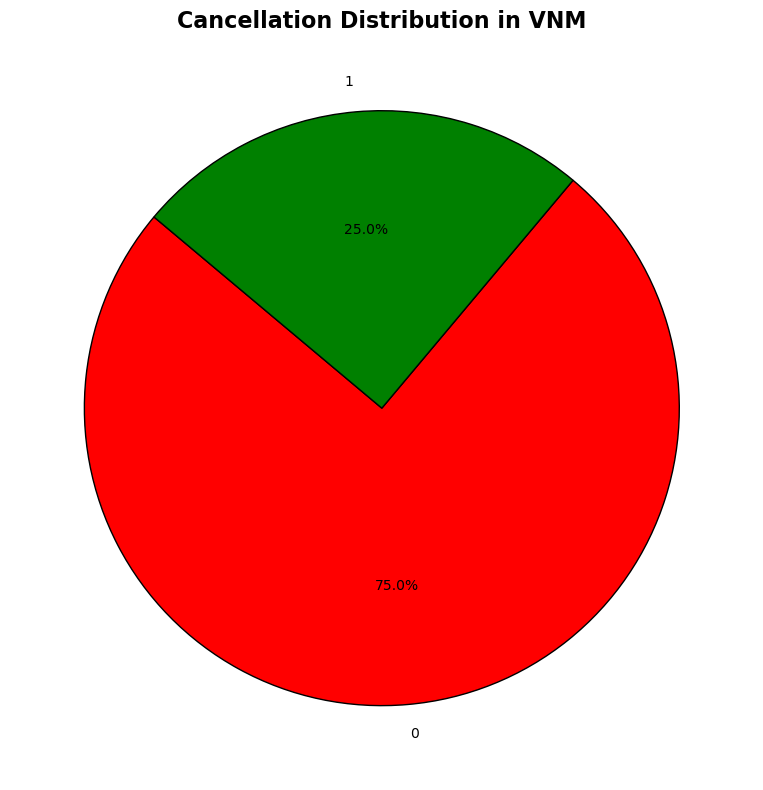

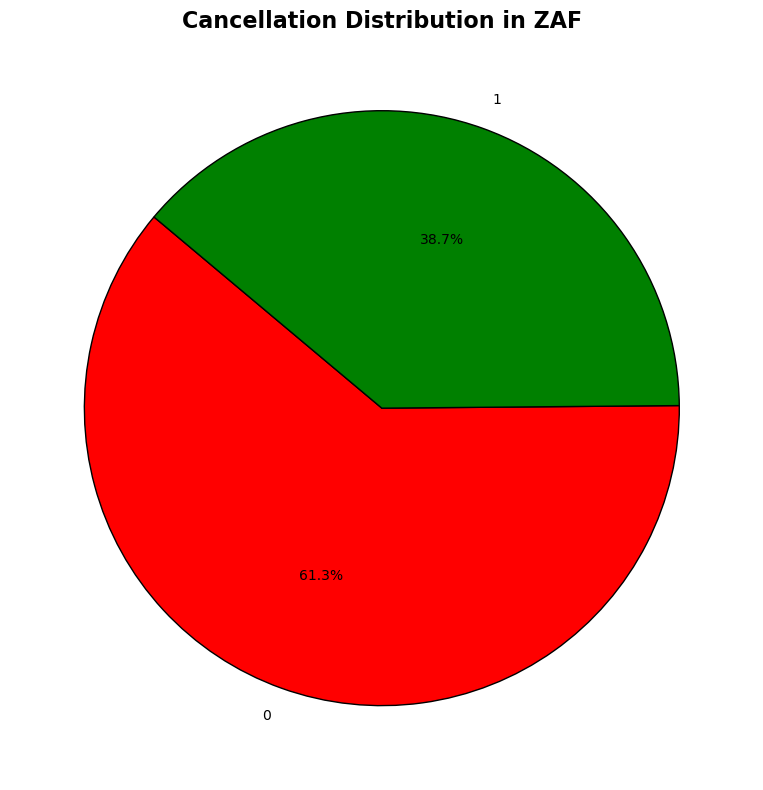

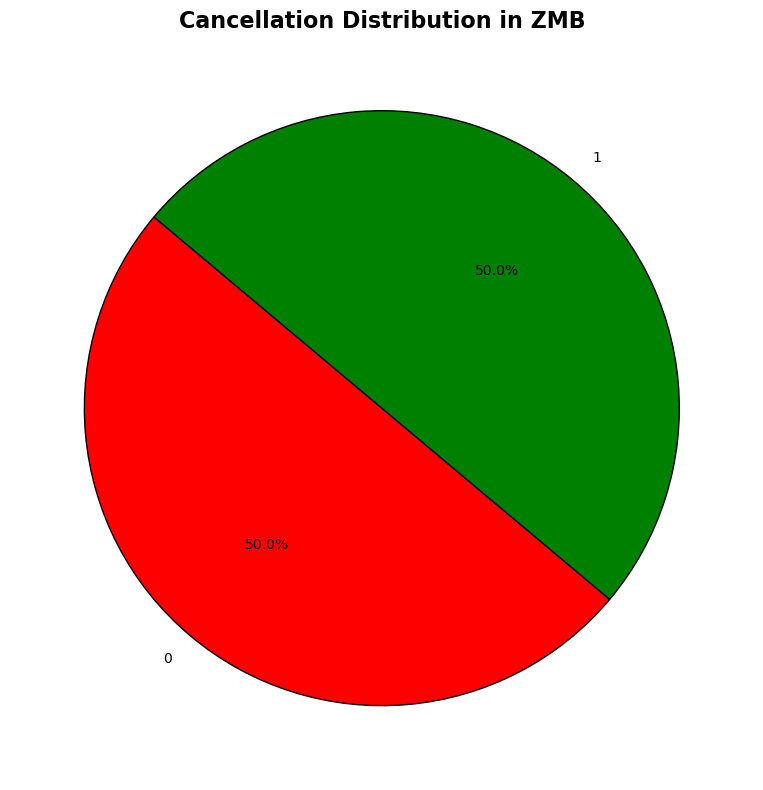

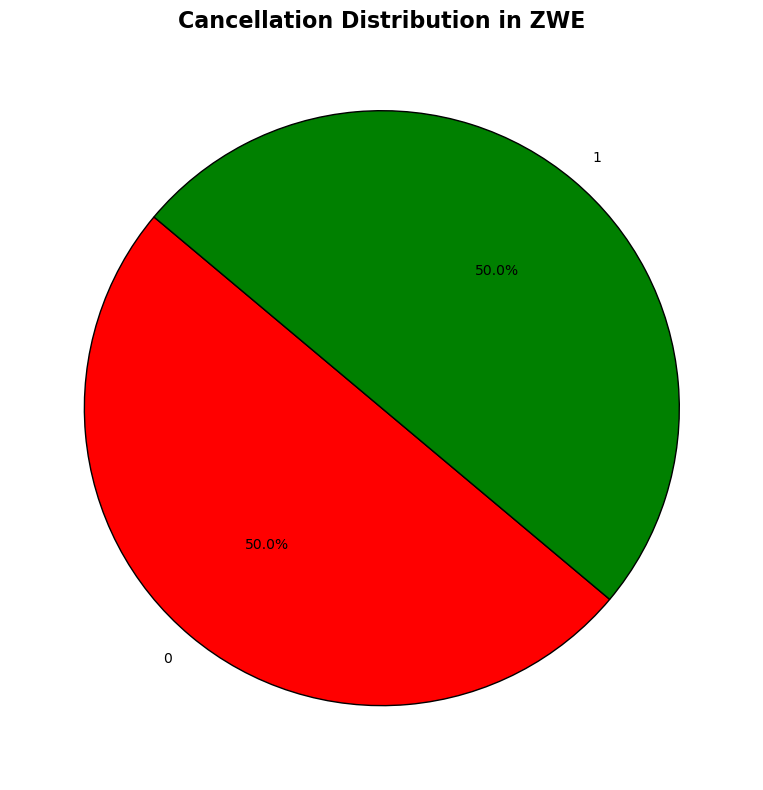

In [20]:
#Cancellations
# Group the data by 'Country' and 'Cancellation' to count cancellations per country
country_cancellations = new_hotel_data.groupby(['Country', 'Is canceled']).size().unstack(fill_value=0)

# Loop over each country and plot a pie chart
for country, data in country_cancellations.iterrows():
    # Create a new figure for each country
    plt.figure(figsize=(8, 8))
    
    # Plot the pie chart for each country
    plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=['red', 'green'],
            startangle=140, wedgeprops={'edgecolor': 'black'})
    
    # Set the title of the pie chart to the country name
    plt.title(f'Cancellation Distribution in {country}', fontsize=16, fontweight='bold')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

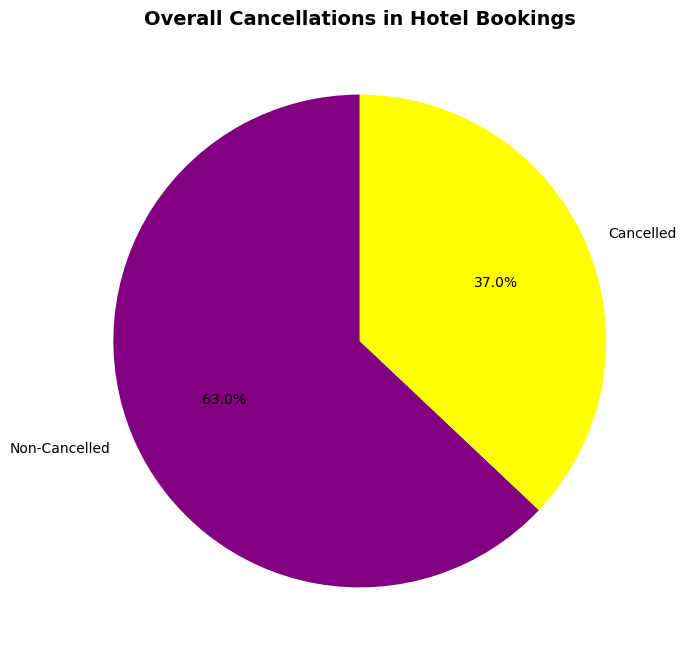

In [18]:
cancellation_counts = new_hotel_data['Is canceled'].value_counts()

# Define the labels for the pie chart (0: Non-cancelled, 1: Cancelled)
labels = ['Non-Cancelled', 'Cancelled']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['purple', 'yellow'])
plt.title('Overall Cancellations in Hotel Bookings', fontsize=14, fontweight='bold')

# Display the pie chart
plt.show()

In [ ]:
The pie chart provides a quick, visual overview of the cancellation rate within the dataset, showing the relative sizes of 
cancelled and non-cancelled bookings. This could inform operational decisions, 
such as changes to cancellation policies or better customer retention strategies.

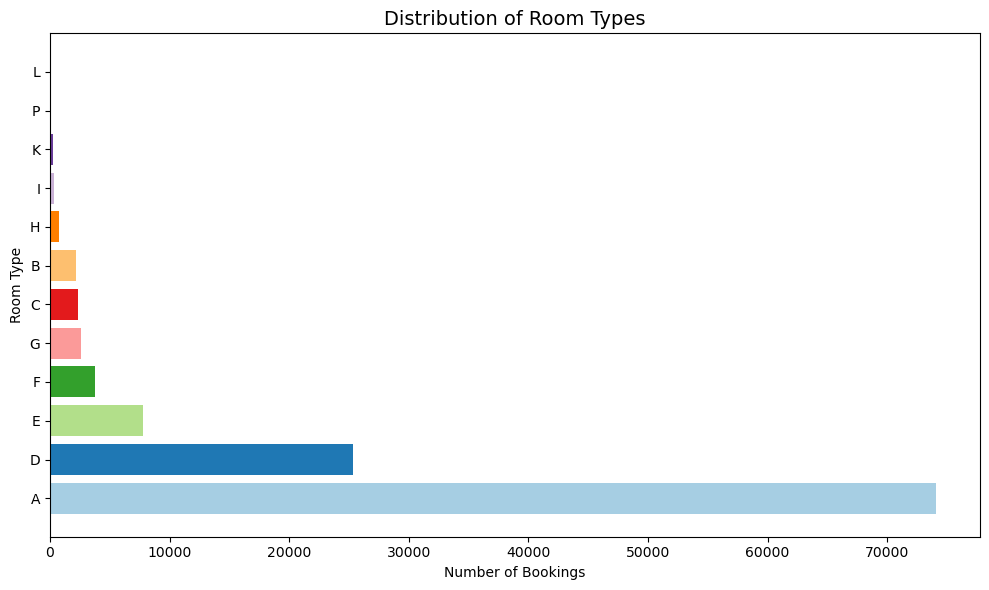

In [24]:
#Type fo Rooms
# Count the occurrences of each room type
room_type_counts = new_hotel_data['Assigned room type'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))

# Horizontal bar chart
plt.barh(room_type_counts.index, room_type_counts.values, color=plt.cm.Paired.colors[:len(room_type_counts)])

# Adding labels and title
plt.xlabel("Number of Bookings")
plt.ylabel("Room Type")
plt.title("Distribution of Room Types", fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
This chart provides an overview of how different room types compare in terms of popularity, 
and it allows the hotel to adjust its strategies to optimize room availability, marketing efforts, and pricing.